# Desarrollo de pipeline semi-automático para estudiar los condicionamientos estructurales en la divergencia secuencial de proteínas

**Autor:** CE Guisande Donadio

## Bloque de Codigo 1.

### Objetivo
* Cargar liberias
* Definir funciones 

In [1]:
#Encabezado del archivo
import os,csv
import pandas as pd
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
%matplotlib inline

def cargar_txt_en_lista(file_path):
    return_list = []
    with open(file_path,"r") as openfile:
        for lines in openfile:
            return_list.append(lines.replace("\n",""))
            
    return return_list

#Filtros de String para dataframe
#Variante para una columna

def sfilter_by_col(df_query,col_name,text,has=True):
    df_return = df_query.loc[df_query[col_name].str.contains(text)==has]
    return df_return

def sfilter_linage(df_query,text,has=True):
    df_return = df_query.loc[df_query["Linage"].str.contains(text)==has]
    return df_return


def sfilter_org(df_query,text,has=True):
    df_return = df_query.loc[df_query["Organism"].str.contains(text)==has]
    return df_return

def sfilter_by_uniprot(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return df_return


def get_pdb_list_from_df(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return_list = filter_by_uniprot(df_proteins_celular,"P04637").iloc[0]["PDB_CHAIN_LIST"]
    return return_list

def printd(text):
    display(Markdown(text))
    return

def strlen(x):
    return str(len(x))

def check_not_None(thing):
    if type(thing) != type (None):
        return True
    else:
        return False

def check_is_None(thing):
    if type(thing) == type (None):
        return True
    else:
        return False
    
def endline ():
    line = "_ _ "*22
    printd("# "+line)
    return



printd("## Informe generado por el *Bloque de Codigo 1.*")
print ("Ya puede correr el siguiente bloque")
endline()

## Informe generado por el *Bloque de Codigo 1.*

Ya puede correr el siguiente bloque


# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo 2.

### Objetivos:
* Armar un dataframe **(df_work)** con ensembles que:
  * Uniprot SWISSPROT  
  * Tengan más de 5 cadenas en PDB
  * Más de 20 homologos en SWISSPROT

## Informe generado por el Bloque de codigo 2

**Fercha del informe**: 2020-03-06

**Reading swissprot**

Dataframe size: 560459

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs
0,Q0ATK2,ACCD_MARMM,reviewed,Acetyl-coenzyme A carboxylase carboxyl transfe...,accD Mmar10_0089,Maricaulis maris (strain MCS10),311,"cellular organisms, Bacteria, Proteobacteria, ...",MTEKSNGMSWLSKITPPGMSKIFSKRDTPDNLWVKCPVSEEMVFHK...,394221
1,O40976,1A_CMVNT,reviewed,Replication protein 1a [Includes: ATP-dependen...,ORF1a,Cucumber mosaic virus (strain NT9) (CMV),993,"Viruses, Riboviria, Bromoviridae, Cucumovirus,...",MATSSFNINELVASHGDKGLLATALVDKTAHEQLEEQLQHQRRGRK...,117124
2,Q84P24,4CLL6_ARATH,reviewed,4-coumarate--CoA ligase-like 6 (EC 6.2.1.-) (4...,4CLL6 At4g19010 F13C5.180,Arabidopsis thaliana (Mouse-ear cress),566,"cellular organisms, Eukaryota, Viridiplantae, ...",MAATHLHIPPNPKTQTSHQNPPFWFSSKTGIYTSKFPSLHLPVDPN...,3702
3,P62260,1433E_RAT,reviewed,14-3-3 protein epsilon (14-3-3E) (Mitochondria...,Ywhae,Rattus norvegicus (Rat),255,"cellular organisms, Eukaryota, Opisthokonta, M...",MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,10116
4,P0CK20,A25_VACCC,reviewed,Protein A2.5,A2.5L,Vaccinia virus (strain Copenhagen) (VACV),76,"Viruses, Poxviridae, Chordopoxvirinae, Orthopo...",MSWYEKYNIVLNPPKRCSSACADNLTTILAEDGNHIRAILYSQPKK...,10249


**Reading PDBSWS**

swslist dataframe size: 47097

,UNIPROT_ID,PDB_CHAIN_LIST,pdb_chain_count
0,A0A010,"[5B00_A, 5B00_B, 5B00_C, 5B01_A, 5B01_B, 5B01_...",57
1,A0A011,"[3VK5_A, 3VK5_B, 3VKA_A, 3VKA_B, 3VKB_A, 3VKB_...",10
2,A0A585,[4MNQ_E],1
3,A0A5A3,"[4UDT_B, 4UDU_B]",2
4,A0A5B3,"[5NHT_B, 5NQK_B]",2


**Merge Sprot with SWS**

Dataframe size: 26550

,Length,Taxonomic lineage IDs,pdb_chain_count
count,26550.000000,2.655000e+04,26550.000000
mean,454.547081,1.216896e+05,10.030245
std,545.239279,1.946628e+05,30.223010
min,5.000000,1.700000e+01,1.000000
25%,188.000000,9.606000e+03,2.000000
50%,328.000000,1.009000e+04,4.000000
75%,529.000000,2.089640e+05,8.000000
max,34350.000000,2.510777e+06,1084.000000


### Resumen de informacion del conjunto de proteinas a estudiar

Viruses Dataframe size: 567

Celular Dataframe size: 10165

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bacteria dataframe size: 3694

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Archaea dataframe size: 418

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Eukaryota dataframe size: 6053

### Graficos del dataframe de trabajo( Organismos Celulares)

**Histograma de Length menores a 3000**

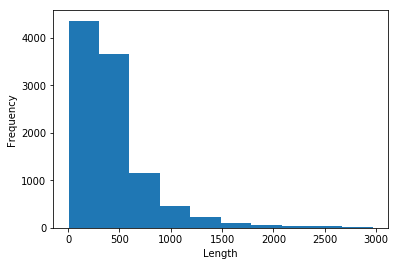

**Histograma de pdb_chain_count menores a 200**

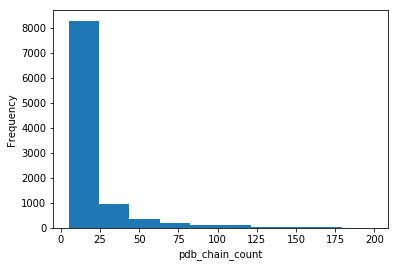

**Se guardo el archivo:** archivos_importantes/df_work_2020-03-06.tsv

Informe generado en 9.682491064071655

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [2]:
import time,datetime
# MAIN/CARGA DE DATOS
printd("## Informe generado por el Bloque de codigo 2")
printd("**Fercha del informe**: "+str(datetime.date.today()))
tiempo_inicial = time.time()

log_error = dict()
log_error["SWISPROT"] = list()
log_error["PDBSWS_PDBUNIPROT"] = list()

# paths de archivos iniciales
path_swissprot_tab =  "bases_de_datos_ref/uniprot-reviewed_20190730.tab"
path_pdbwsw_pdbchain = "bases_de_datos_ref/pdb_uniprot_chain_map.lst.2"


#CARGAR SWISSPROT
printd ("**Reading swissprot**")

df_sprot = pd.read_csv(path_swissprot_tab,sep="\t")
df_sprot.columns = ['UNIPROT_ID', 
                    'Entry_name', 
                    'Status', 
                    'Protein_names', 
                    'Gene names', 
                    'Organism', 
                    'Length', 'Linage', 
                    'Sequence', 
                    'Taxonomic lineage IDs']
printd("Dataframe size: "+strlen(df_sprot))
display(df_sprot.head(n=5))


#ESTE BLOQUE SIRVE PARA CARGAR SIFTS, 
#actualmente no esta en uso
#
"""
printd ("## Reading sitfs")
df_sifts = pd.read_csv("bases_de_datos_ref/sifts_uniprot_pdb.tsv",header=1,sep="\t")
df_sifts.columns = ["UNIPROT_ID","PDB_list_sifts"]
printd("Dataframe size: "+strlen(df_sifts))
display(df_sifts.head(n=5))

printd ("Merge sprot with sifts")
df_sprot_pdb = pd.merge(df_sprot,df_sifts,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.head(n=1))
"""

###CARGAR PDBSWS
printd ("**Reading PDBSWS**")
#Esto carga la lista manualmente por que algunos codigos uniprot no figuran.
#son listas de ancho fijo (ej: '101m A P02185')
#algunas lineas del archivo 
lst_pdbsws = []
tmp_pdbsws = cargar_txt_en_lista(path_pdbwsw_pdbchain)
for index,line in enumerate(tmp_pdbsws):
    if (line[-1] != "?") and (line[-1] != " "):
        pdb_chain_id = line[0:4].upper()+"_"+line[5] 
        tmp = [pdb_chain_id,line[0:4],line[5],line[7:]]
        lst_pdbsws.append(tmp)
    else:
        #Los errores de carga de archivos se anexan a su log
        message = "Error in line "+ str(index) + ": "+ (line) 
        log_error["PDBSWS_PDBUNIPROT"].append(message)
#Borrar vbariables
del pdb_chain_id
del tmp_pdbsws
del tmp
#Crea el dataframe usando la lista
df_pdbsws = pd.DataFrame(lst_pdbsws).dropna()
df_pdbsws.columns = ["PDB_CHAIN_ID","PDB","CHAIN","UNIPROT_ID"]
#Los agrupa por pdb
df_swslist = df_pdbsws.groupby(["UNIPROT_ID"],as_index=False).agg({'PDB_CHAIN_ID':lambda x:list(x)})
#Agrega el numero de pdbs en la lista
df_swslist["pdb_chain_count"] = df_swslist.apply({"PDB_CHAIN_ID":lambda x: len(x)})
df_swslist.columns= ["UNIPROT_ID","PDB_CHAIN_LIST" ,"pdb_chain_count"]
#Informe visible
printd ("swslist dataframe size: "+strlen(df_swslist))
display(df_swslist.head())

### MERGE: AGREGA las columnas de sws a sprot, elimina los uniprot que no tengan mapeo.
printd ("**Merge Sprot with SWS**")
df_sprot_pdb = pd.merge(df_sprot,df_swslist,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.describe())

### FILTRANDO
# De las proteinas con mas de 5 cadenas, 
# Separar los virus en una tabla aparte.
df_work = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses")==False)]
df_virus = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses"))]
printd ("### Resumen de informacion del conjunto de proteinas a estudiar")
printd ("Viruses Dataframe size: "+strlen(df_virus) )
printd ("Celular Dataframe size: "+strlen(df_work))
for taxa in ["Bacteria","Archaea","Eukaryota"]:
    printd ("&nbsp;"*6+taxa+" dataframe size: "+strlen (sfilter_linage(df_work,taxa)))

printd("### Graficos del dataframe de trabajo( Organismos Celulares)")

printd("**Histograma de Length menores a 3000**")
plot_his1 = df_work["Length"].loc[df_work["Length"]<3000].plot(kind="hist")
plot_his1.set_xlabel("Length")
plt.show()


printd("**Histograma de pdb_chain_count menores a 200**")
plot_his2 = df_work["pdb_chain_count"].loc[df_work["pdb_chain_count"]<200].plot(kind="hist")
plot_his2.set_xlabel("pdb_chain_count")
plt.show()




#Esta linea guarda el df_work en un archivo tsv
df_work_path = ("archivos_importantes/df_work_"+str(datetime.date.today())+".tsv")
df_work.to_csv(df_work_path,sep="\t")
printd ("**Se guardo el archivo:** "+ df_work_path)
printd( "Informe generado en "+str(time.time()-tiempo_inicial))
printd ("Ya puede correr el siguiente bloque.")
endline()

## Bloque de Codigo 3


### Objetivos:
* Definir funciones para:
  * correr blast sobre swiwssprot
  * correr cd-hit a 0.95
  * parsear esos resultados y cargarlos en la  *variable global* **ensemeble_data**
 

In [3]:
ensemble_data = dict()
ensemble_df = dict()

In [4]:
#Crea un diciconario para acumular los datos a usar
#crea un diccionario que contiene dataframes especificos utiles
#las llaves son los uniprot_id.

def sort_cdhitcluster(list_query):
    return sorted(list_query,key = lambda x: x[2],reverse=True)

def dibujar_histograma(df_query,col):
    plot_his1 = df_query[col].plot(kind="hist")
    plot_his1.set_xlabel(col)
    plt.show()
    return

def show_ensemble_info(query):
    printd("### Mostrando datos de la proteina de estudio")
    for entry in ensemble_data[query]:
        if "sorted" in entry:
            histo = [len(ensemble_data[query][entry][x]) for x in range(30,91,10)]
            printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(histo)+"`")
        else:
            printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(ensemble_data[query][entry])+"`")
    return

def run_blast(fasta_file):
    output_filename = fasta_file.replace("fasta/","blast_results/").replace(".fasta","_blast_results.txt")
    cmd = "blastp -query "+ fasta_file +" -db uniprot_sprot.db -evalue 1e-10 -out "+ output_filename +" -outfmt '6 qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcovs' -num_alignments 1000"
    os.system(cmd)
    return output_filename


#el imput es el fasta con los homologos, el coef tiene que ser un string.
def cdhit_stuff(filename_hsf,coef):
    outfile_cdhit =  filename_hsf.replace("fasta/homologs_sprot/","cd-hit-results-"+coef+"/").replace("_homologs_sprot.fasta","_cd-hit")
    
    #si el archivo no existe, corre el cdhit
    if not os.path.isfile(outfile_cdhit):
        cmd = "cd-hit -i " + filename_hsf + " -o " + outfile_cdhit + " -c "+coef
        os.system(cmd)
        
    outfile_cdhit = outfile_cdhit+".clstr"
    #parsea los resultados del cdhit
    clusters = dict()    
    if os.path.isfile(outfile_cdhit):
        with open(outfile_cdhit,"r") as openfile:
            for line in openfile:
                text = line.replace("\n","")
                if text[0] == ">":
                    clus_num = (text[1:])
                    clusters[clus_num] = list()
                if text[0] in [str(x) for x in range(0,10)]:
                    uniprot_id =  (text.split(">")[1][0:6])
                    rep = int ("*" in text.split(">")[1])
                    if rep == False:
                        at_percent = float(text.split("at ")[1].replace("%",""))
                    else:
                        at_percent = float("100.00")
                    clusters[clus_num].append( [uniprot_id,bool(rep),at_percent])
        for cluster_n in clusters:
            clusters[cluster_n] = sort_cdhitcluster(clusters[cluster_n])
        return outfile_cdhit,clusters
    else:
        return "N/A","N/A"

def make_fasta_from_list(query,query_list,outfilename):
    with open(outfilename,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for uniprot_id in query_list:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                    openfile.write(">"+uniprot_id)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
    return outfilename


def get_cdhit_rep(uniprot_query,coef="0.95"):
    cluster_rep_list = []
    for cluster in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"]:
        for members in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"][cluster]:
            if members[1] == True:
                uniprot_id = members[0]
                df1 = ensemble_df[uniprot_query]["blast_results"]
                if len(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"] ) != 0:
                    ident_val = max(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"])
                    cluster_rep_list.append((members[0],ident_val))
                else:
                    ident_val = 0
                    cluster_rep_list.append((members[0],ident_val))
    return cluster_rep_list    

def histo_dic_cdhit(uniprot_id,coef="0.95"):
    bins =  [30,40,50,60,70,80,90]
    histo_dict = dict()
    for n in bins:
        histo_dict[n] = list()

    for id_and_ident in sorted (get_cdhit_rep(uniprot_id,coef),key = lambda x: x[1]):
        for n in bins:
            if (id_and_ident[1] >= n) and (id_and_ident[1]) < n+10:
                histo_dict[n].append(id_and_ident)
                break
    return histo_dict



#esta es la funcion importante
def estudiar_proteina(query,show=True,force=False):
    #Check que el query sea correcto
    if not query in list(df_work["UNIPROT_ID"]):
        print ("La proteina solicitada no se encuentra en df_work.")
        return False
    
    #premite la escritura en las variables globales
    global ensemble_data
    global ensemble_df
    
    if check_not_None(ensemble_data.get(uniprot_id)):
        if force==False:
            if show==True:
                show_ensemble_info(query)
            return True
            
    #carga informacion en ensemble_data y ensemble_df
    ensemble_df[query] = dict()
    ensemble_data[query] = dict(sfilter_by_uniprot(df_work,query).iloc[0])
    #da una lista 
    ensemble_data[query]["PDB_in_df_work"] = (list(set([x[0:4] for x in ensemble_data[query]["PDB_CHAIN_LIST"]])))

    #create fasta file with query seq
    with open ("fasta/"+query+".fasta","w") as openfile:
        openfile.write (">"+query+"\n")
        openfile.write (ensemble_data[query]["Sequence"]+"\n")
    
    #BUSCAR RESULTADOS DEL BLAST, SI NO EXISTEN, CORRERLO
    blast_results_filename = "blast_results/"+query+"_blast_results.txt"
    if os.path.isfile(blast_results_filename):
        if os.path.getsize(blast_results_filename) == 0:
            if show: print ("R ",end="")
            os.system("rm "+blast_results_filename)
            ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
        else:
            ensemble_data[query]["blast_results"] = blast_results_filename
    else:
        ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
    
    
    #PARSEAR LOS RESULTADOS EL BLAST y cargarlos a ensemble data
    if os.path.getsize(ensemble_data[query]["blast_results"]) > 0:
        #leer los datos importantes del blast y colocarlos en un dataframe
        df1 = pd.read_csv(ensemble_data[query]["blast_results"],header=None,sep="\t")
        df1.columns = "qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcov".split(" ")
        df1["UNIPROT_ID"] =  df1["sseqid"].str.split("|",expand=True)[1]
        #se agregan los valores de qstart y qend
        df2 = df1[["UNIPROT_ID","pident","qcov","qstart","qend","sstart","send","gaps"]].loc[(df1["UNIPROT_ID"]!=query) & (df1["pident"]>30) & (df1["qcov"]>75) ]
        
        #esta linea elimina los resultados repetidos en el blast y se queda solo con el primer hit.
        ensemble_df[query]["blast_results"] = df2.drop_duplicates(["UNIPROT_ID"])
        del df1,df2
        #carga la infomacion de los homologos al ensemble_data
        ensemble_data[query]["homologs_sprot"] = list(set(list(ensemble_df[query]["blast_results"]["UNIPROT_ID"])))
        ensemble_data[query]["homologs_in_df_work"] = list(set(df_work["UNIPROT_ID"]) & set(ensemble_data[query]["homologs_sprot"]))
    else:
        ensemble_data[query]["homologs_sprot"] = []
        if show: printd("## Alerta, blast_results still 0 "+query)    

        return False
    
    ####### SI tiene menos de 20 homologos NO SIGUE.
    if len( ensemble_data[query]["homologs_sprot"])< 20:
        return False
    
    #CREAR FASTA DE HOMOLOGOS
    filename_hsf = "fasta/homologs_sprot/"+query+"_homologs_sprot.fasta"
    if os.path.isfile(filename_hsf):
        ensemble_data[query]["homologos_sprot_fasta"] = filename_hsf
    else:
        with open(filename_hsf,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for homolog in ensemble_data[query]["homologs_sprot"]:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog]["Sequence"].iloc[0]
                    openfile.write(">"+homolog)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
            ensemble_data[uniprot_id]["homologos_sprot_fasta"] = filename_hsf
    
    #corre el cdhit si el archivo de salida no existe. 
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.95")
    ensemble_data[query]["cd-hit-results-0.95"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.95_parsed"] = cdhit_parsed
    ensemble_data[query]["cd-hit-sorted-0.95"] = histo_dic_cdhit(query,"0.95")
    
    #Estas lineas hacian el codigo extremadamente lento de decide hacerlo on-demand
    #ensemble_data[query]["cd-hit-results-0.95_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.95")],"fasta/cdhit-0.95/"+query+"_cdhit-0.95.fasta")
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.80")
    ensemble_data[query]["cd-hit-results-0.80"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.80_parsed"] = cdhit_parsed
    ensemble_data[query]["cd-hit-sorted-0.80"] = histo_dic_cdhit(query,"0.80")
    
    
    #ensemble_data[query]["cd-hit-results-0.80_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.80")],"fasta/cdhit-0.80/"+query+"_cdhit-0.80.fasta")
    
    #muestra los resutaldos hasta el momento
    if show:
        show_ensemble_info(query)
    return True

printd ("## Informe generado por el Bloque de codigo 3")
print (" ")
#Checkquer estructura de carpetas
folder_list = ["ent_files",
               "fasta",
               "blast",
               "pdb_chains",
               "cd-hit-results-0.95",
               "cd-hit-results-0.80",
               "tree"]

printd ("Verificando la estructura de carpetas.")
for folder in folder_list:
    if not os.path.isdir(folder):
        print ("* Creating folder "+ folder)
        os.mkdir(folder)
printd("Ya puede correr el siguiente bloque.")
endline()

## Informe generado por el Bloque de codigo 3

Verificando la estructura de carpetas.

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo 4

### Objetivos:
* Correr **estudiar_proteina(`uniprot_id`)** sobre df_work
* guardar en `list_under_20` aquellas proteinas que no tienen más de 20 homologos sprot.
* Guardar `ensemble_data` en un archivo csv

In [5]:
import ast
# Esta ejecuta la funcion estudiar_protina sobre la lista del df_work
# Solo son aceptadas aquellas que tengan <20 homologos sprot

#Solo funciona si es la unica funcio que imprime a lo largo de todo el loop sobre i
def print_progreso(i,total):
    percent = int(index/how_many*10000)/100
    print ("Completed:",index,"of",how_many,"| " + str(percent) +"%  ",end="\r")
    return

printd ("### Informe generado por Bloque de Codigo 4")

ed_filename = "archivos_importantes/ensemble_data_201911011659.csv"

#Si existe la version declarada arriba, lee los datos de ahi"
if os.path.isfile(ed_filename):
    printd ("El archivo existe")
    printd ("Cargando: `"+ed_filename+"`")
    df_reload = pd.read_csv(ed_filename)

    printd ("Ensemble data tiene: "+str(len(df_reload))+" lineas.")
    display(df_reload.head(n=2))

    #mete el df_relad en ensemble_data
    for index,uniprot_id  in enumerate(df_reload["UNIPROT_ID"]):
        print (index+1,"of",4060,end="\r")
        ensemble_data[uniprot_id] = dict()
        literal_list = ["PDB_CHAIN_LIST",  
               "PDB_in_df_work",
               "homologs_sprot",
               "homologs_in_df_work",
               "cd-hit-results-0.95_parsed",
               "cd-hit-sorted-0.95",
               "cd-hit-results-0.80_parsed",
               "cd-hit-sorted-0.80"]
        
        for labels in df_reload:
            if labels in literal_list:
                x = ast.literal_eval((df_reload.loc[(df_reload["UNIPROT_ID"]==uniprot_id)][labels].iat[0]))
            else:
                x = df_reload.loc[(df_reload["UNIPROT_ID"]==uniprot_id)][labels].iat[0]
            ensemble_data[uniprot_id][labels] = x
    
    #recalcula la list_under_20 
    list_under_20 = []
    for uniprot_id in list(df_work["UNIPROT_ID"]):
        if not uniprot_id in list(df_reload["UNIPROT_ID"]):
            list_under_20.append(uniprot_id)
    printd ("list_under_20: "+strlen(list_under_20)+" lineas.")
else:
    list_of_under_20  = []
    how_many = len(list(df_work["UNIPROT_ID"]))
    for index,uniprot_id in enumerate(list(df_work["UNIPROT_ID"])):
        run_ok =estudiar_proteina(uniprot_id,False)

        #Indicador de progreso
        if index % 25 == 0:
            print_progreso(index,how_many)
        if run_ok == False:
            list_of_under_20.append(uniprot_id)
            del ensemble_data[uniprot_id]
            #print (uniprot_id + " have been removed under 20 homolog rule")
        else:
            pass
            #print (uniprot_id + " acepted in ensemble_data")

    print ("Completed : 100%.")
    printd ("**Removed under 20 homolog rule:** ")
    printd ("`"+str(list_of_under_20[0:10])+"...`")
    printd ("**list_of_under_20:** ")
    printd ("`"+str(len(list_of_under_20))+"`")

    printd ("**Acepted in enseble data** `"+ str(list(ensemble_data)[0:10])+ "...`")
    printd ("**ensemble_data:** `"+str(len(list(ensemble_data)))+"`")

    timestamp = str(datetime.datetime.now()).replace("-","").replace(":","").replace(" ","")[0:12]
    ed_filename = "archivos_importantes/ensemble_data_" + timestamp +".csv"

    printd ("Guardando  "+ed_filename)
    df_new = pd.DataFrame.from_dict(ensemble_data,orient="index")
    df_new.head()
    df_new.to_csv(ed_filename,header=True,index=False)
    del df_new

printd("Ya puede correr el siguiente bloque.")
endline()


### Informe generado por Bloque de Codigo 4

El archivo existe

Cargando: `archivos_importantes/ensemble_data_201911011659.csv`

Ensemble data tiene: 4640 lineas.

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,...,blast_results,homologs_sprot,homologs_in_df_work,homologos_sprot_fasta,cd-hit-results-0.95,cd-hit-results-0.95_parsed,cd-hit-sorted-0.95,cd-hit-results-0.80,cd-hit-results-0.80_parsed,cd-hit-sorted-0.80
0,A0QSL8,RPOA_MYCS2,reviewed,DNA-directed RNA polymerase subunit alpha (RNA...,rpoA MSMEG_1524 MSMEI_1488,Mycobacterium smegmatis (strain ATCC 700084 / ...,350,"cellular organisms, Bacteria, Terrabacteria gr...",MLISQRPTLSEETVAENRSRFVIEPLEPGFGYTLGNSLRRTLLSSI...,246196,...,blast_results/A0QSL8_blast_results.txt,"['Q8CX32', 'Q8A4A2', 'B5ZZ57', 'P92429', 'Q81V...","['P0A7Z4', 'Q9Z9H6', 'P9WGZ1', 'P0A7Z6', 'A7ZS...",fasta/homologs_sprot/A0QSL8_homologs_sprot.fasta,cd-hit-results-0.95/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('Q7YJU6', 30.068), ('Q0ZIY7', 30.068), ...",cd-hit-results-0.80/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('A6H5L3', 30.435), ('Q14FC5', 30.508000..."
1,A0R066,ILVE_MYCS2,reviewed,Branched-chain-amino-acid aminotransferase (BC...,ilvE MSMEG_4276 MSMEI_4176,Mycobacterium smegmatis (strain ATCC 700084 / ...,368,"cellular organisms, Bacteria, Terrabacteria gr...",MNSGPLEFTVSANTNPATDAVRESILANPGFGKYYTDHMVSIDYTV...,246196,...,blast_results/A0R066_blast_results.txt,"['O32954', 'P54690', 'A9UZ24', 'K7QKH1', 'P242...","['P0AB80', 'O15382', 'P54687']",fasta/homologs_sprot/A0R066_homologs_sprot.fasta,cd-hit-results-0.95/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ...",cd-hit-results-0.80/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ..."


list_under_20: 5525 lineas.

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codidgo 5

### Objetivos
* Hacer un resumen de los datos ya calculados.

In [6]:
import math

#Get the total size of a folder.
def get_size(start_path = '.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

#convierte un valor entero en bytes a human 
def bytes2human(size):
    unit = ["","k","M","G","T","P","E","Z"]
    if size > 0:
        order = int(math.log(size,1024))
        if order > (len(unit)-1):
            order = (len(unit)-1)
        size_h = str(int(size/(1024**order)))+"\t"+unit[order]+"b"
    else:
        size_h = "0\t b"
    return size_h


folder_list = ["archivos_importantes",
               "bases_de_datos_ref",
               "fasta",
               "blast_results",
               "cd-hit-results-0.95",
               "cd-hit-results-0.80",
               "tree",
               "ent_files",
               "pdb_chains"]
printd ("## Informe generado por bloque de Codigo 5")
print ("Timestamp: ",str(datetime.datetime.now()))
print ("")

for folder in folder_list:
    if os.path.isdir(folder):
        size =  bytes2human(get_size(folder))
        print (size,folder,sep="\t")
    else:
        print (folder +" is not a folder")    

print ("")

               


endline()

## Informe generado por bloque de Codigo 5

Timestamp:  2020-03-10 22:40:32.490513

629	Mb	archivos_importantes
667	Mb	bases_de_datos_ref
391	Mb	fasta
209	Mb	blast_results
225	Mb	cd-hit-results-0.95
165	Mb	cd-hit-results-0.80
186	Mb	tree
13	Gb	ent_files
187	Mb	pdb_chains



# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo E1

### Objetivos
* define la fucuncion `seleccionar_para_alinear`
* la aplica sobre los resultados de `ensemble_data[uniprot_id]["cd-hit-sorted-0.95"]` si:
  * antes de seleccionar tiene más de 80 homologos en total
  * la cantidad de bins vacios es menor a 3
  * despues de agregar los homologos de df_work, tiene al menos 70 homologos
* Guarda los resultados en `caped25`

## Informe generado por Bloque de Codigo E1

`caped25_notA_notB` 2996

`caped25_condA_notB `504

`caped25_condA_condB` 1140

,uniprot_id,pdb_chains,len_ali,histogram
0,A0QSL8,8,97,"[25, 25, 17, 2, 13, 6, 2]"
1,A0R3D3,5,76,"[25, 25, 11, 4, 4, 4, 0]"
2,A3M692,124,82,"[0, 25, 25, 25, 0, 1, 0]"
3,A5U4M0,18,74,"[25, 25, 14, 1, 4, 3, 0]"
4,A5U8S7,5,87,"[25, 25, 25, 3, 2, 3, 0]"


**Histograma de pdb_chains <200**

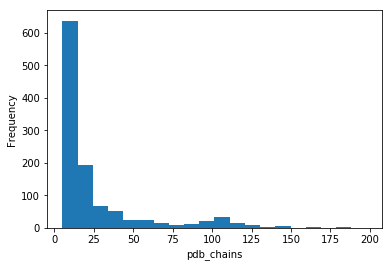

**Histograma de pdb_chains >200**

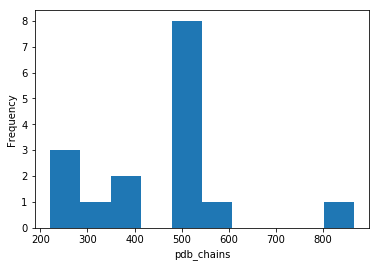

**Histograma de len_ali**

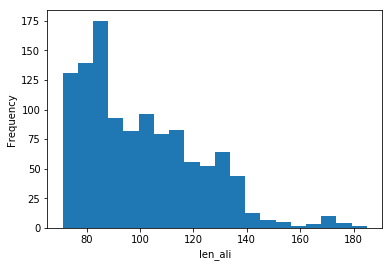

la lista `choped25` se guardo en un `archivos_importantes/choped25.csv`

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [7]:
#histodict_tuple: diccionario de cohortes, con lista de tuplas ordenadas by [1] (Uniprot_id,%ident)
#homologos_dfwork: una lista con los 
def seleccionar_para_alinear(histodic_tuple,homologos_dfwork,cutoff=25):
    para_alinear = dict()
    for x in range(30,91,10):
        cantidad = len(histodic_tuple[x])
        #basicamente, como cada cohorte esta ordenada por porcentaje de identidad
        # cuando hay muchos trata de cubrir todo el intervalo
        # saltando de a "k" en la iteracion.
        if cantidad > cutoff:
            seleccionados_i = []
            k = cantidad//cutoff 
            if k==0:
                k=1 #el minimo es i
            for i in range(0,cantidad,k):
                seleccionados_i.append (histodic_tuple[x][i][0])

                #para no pasarse, corta si se supera el cutoff
                if len(seleccionados_i) >= cutoff:
                    break
        else:
            #si son menos, los mandamos todos por las dudas
            seleccionados_i =  [x[0] for x in histodic_tuple[x]]

        para_alinear[x] = seleccionados_i

    histo_selec = [len(para_alinear[x]) for x in range (30,91,10)]

    #aca hay que agregar, si no estan los homologos que estan en df_work
    # si bien algunos sean descartados por los filtros, es necesario que esten
    # en los alineamientos para compararlos

    seleccionados_full = []
    for x in range (30,91,10):
        for homolgos in para_alinear[x]:
            seleccionados_full.append(homolgos)
    for ids in homologos_dfwork:
        if not ids in seleccionados_full:
            seleccionados_full.append(ids)
    
    return seleccionados_full,histo_selec


#### FIN DEL AREA DE DEFINICON DE FUNCIONES

printd("## Informe generado por Bloque de Codigo E1")


df1 = pd.DataFrame()

#para ser incluidos, deben tener + de 80 al final
count = 0
caped25_notA = []
caped25_condA_condB = []
caped25_condA_notB = []
to_dataframe = []
for uniprot_id in list(ensemble_data):
    #arma un historgrama de los cluster de ch-hit
    histo = [len(ensemble_data[uniprot_id]["cd-hit-sorted-0.95"][x]) for x in range(30,91,10)]

    #condicion A
    if (sum (histo) > 80 ) and (histo.count(0)<=3):
        cdhit95_histodic = ensemble_data[uniprot_id]["cd-hit-sorted-0.95"]
        homologos_dfwork = ensemble_data[uniprot_id]["homologs_in_df_work"]
        pdb_chains = str(ensemble_data[uniprot_id]["pdb_chain_count"])
        
        
        
        #Aca se usa la funcion para seleccionar las secuencias que van al alineamiento
        seleccionados_full,histo_selec =  seleccionar_para_alinear(cdhit95_histodic,homologos_dfwork,25)
        #condicion_B
        if len(seleccionados_full) > 70:
            # print (uniprot_id,"cdhit",histo,sum(histo),"-","-","-",sep="\t")
            to_dataframe.append ([uniprot_id,int(pdb_chains),len(seleccionados_full),histo_selec]) 
            ensemble_data[uniprot_id]["seleccionados_full"]= seleccionados_full
            count +=1
            caped25_condA_condB.append(uniprot_id)
        else:
            caped25_condA_notB.append(uniprot_id)
    else:
        caped25_notA.append(uniprot_id)

printd ("`caped25_notA_notB` "+strlen(caped25_notA))
printd ("`caped25_condA_notB `"+strlen(caped25_condA_notB))
printd ("`caped25_condA_condB` "+strlen(caped25_condA_condB))
df1 = pd.DataFrame(to_dataframe,columns=["uniprot_id","pdb_chains","len_ali","histogram"])
display(df1.head())

printd("**Histograma de pdb_chains <200**")
plot_his3 = df1["pdb_chains"].loc[df1["pdb_chains"]<200].plot(kind="hist",bins=20)
plot_his3.set_xlabel("pdb_chains")
plt.show()


printd("**Histograma de pdb_chains >200**")
plot_his4 = df1["pdb_chains"].loc[df1["pdb_chains"]>200].plot(kind="hist",bins=10)
plot_his4.set_xlabel("pdb_chains")
plt.show()


printd("**Histograma de len_ali**")
plot_his5 = df1["len_ali"].plot(kind="hist",bins=20)
plot_his5.set_xlabel("len_ali")
plt.show()

printd("la lista `choped25` se guardo en un `archivos_importantes/choped25.csv`")
df1.to_csv("archivos_importantes/choped25.csv",header=True)

printd("Ya puede correr el siguiente bloque.")
endline()

## Bloque de Codigo E2

### Objetivo
* Sobre la lista `caped25_condA_condB`
  * Alinear 
  * Convertir a phy
  * Hacer arbol

In [8]:
# para hacer el archivo fasta 
def make_fasta_from_list(query,query_list,outfilepath):
    #Chequer que el representante este antes de agregarlo
    if not query in query_list:
        query_list = [query]+list(set(query_list))
    with open(outfilepath,"w") as openfile:
        for uniprot_id in query_list:
            #Si la secuencia esta en el dataframe de sprot
            if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                openfile.write(">"+uniprot_id)
                openfile.write("\n")
                openfile.write(seq)
                openfile.write("\n")
def fasta2phy(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    os.system(clustal_cmd)
    return


#ingresa fasta, sale philp
def alig_fasta(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -align -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    #print (clustal_cmd)
    os.system(clustal_cmd)
    return

def hacer_arbol(uniprot_id,phy_file,code=""):
    os.chdir(path+"/tree")
    os.system( 'echo "XXXXX\nY" > config'.replace("XXXXX","../"+phy_file) )
    os.system( 'phylip protdist < config') 
    os.system( 'mv outfile XXXXX_protdist_WWWWW'.replace("XXXXX",uniprot_id).replace("WWWWW",code) )
    os.system( 'echo "XXXXX_protdist_WWWWW\nJ\n99\nY" >config'.replace("XXXXX",uniprot_id).replace("WWWWW",code) ) 
    os.system( 'phylip neighbor <config')
    os.system("rm config")
    os.system("mv outfile "+uniprot_id+"_"+code+".outfile")
    os.system("mv outtree "+uniprot_id+"_"+code+".tree")
    os.chdir(path)
    return

printd ("## Informe del bloque de codigo E2")
path = "/home/emanuel/Documents/trabajo_actual/MegaScript/"
caped25 = caped25_condA_condB
for index,uniprot_id in enumerate(caped25):
    fasta_file = "fasta/caped25/"+uniprot_id+"_caped25.fasta"
    ali_phy = "alignments/"+uniprot_id+"_caped25.phy"
    out_tree = uniprot_id+"_caped25.tree"
    
    print (uniprot_id,index,"of",len(caped25),"1) FASTA",end="\r")
    
    if not os.path.isfile(fasta_file):
        make_fasta_from_list(uniprot_id, 
                         ensemble_data[uniprot_id]["seleccionados_full"],
                         path+fasta_file)
    
    
    print (uniprot_id,index,"of",len(caped25),"2) ALING",end="\r")
    if not os.path.isfile(ali_phy):
        alig_fasta(fasta_file,ali_phy)
        
    
    print (uniprot_id,index,"of",len(caped25),"3) TREE ",end="\r")
    if not os.path.isfile("tree/"+out_tree):
        hacer_arbol(uniprot_id,ali_phy,"caped25")
                          
    ensemble_data[uniprot_id]["caped25"] = [fasta_file,ali_phy,"tree/"+out_tree]
    
printd ("Ya puede correr el proximo bloque de codigo")
endline()

## Informe del bloque de codigo E2

Ya puede correr el proximo bloque de codigo

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo E3

### Objetivo
* Define la funcion choper que permite recortar un alineamiento fasta segun 

In [128]:
from Bio import SeqIO
#hay que darle un fasta alineado, y el nombre de la referencia en el fasta.
#la secuencia de referencia quedara arriba de todo
def choper(ali_filepath, ref,outfile,formato="fasta"):
    ali_homolog = {}
    for record in SeqIO.parse(ali_filepath,formato):
        ali_homolog[record.id] = list(record.seq) #se guarda como lista para poder borrar elementos
    ref_seq = ali_homolog[ref]
    
    #Genera una lista donde se guardan los index que deberian ser borrados
    index_for_removal = []
    for index,aa in enumerate(ref_seq):
        if aa == "-":
            index_for_removal.append(index)
    
    # Como la lista esta en orden creciente, se invierte para ir borrando de atras para adelante
    # y no cambiar el largo de las listas durante la iteracion
    index_for_removal.sort(reverse=True)

    for i in index_for_removal:
        for ids in ali_homolog:
            del ali_homolog[ids][i]
       
    #Esto es para asegurarse que la referencia quede arriba de todo
    ali_choped = {}
    ali_choped[ref] = ali_homolog[ref]
    del ali_homolog[ref]
    ali_choped.update(ali_homolog)
    
    #Esto guarda el archivo con las secuencias chopeadas
    with open(outfile,"w") as savefile:
        for ids in ali_choped:
            seq = ""
            for aa in ali_choped[ids]:
                seq += aa
                ali_choped[ids]=seq
            savefile.write(">"+ids+"\n"+ali_choped[ids]+"\n")
    return ali_choped

printd("## Informe generado por el bloque de codigo E3")

for index,uniprot_id in enumerate(caped25):
    ali_phy = ensemble_data[uniprot_id]["caped25"][1]
    outfile =  "choped/"+uniprot_id+"_ali-caped25-choped.fasta"
    print (index,"of",len(caped25),"   ",end="\r")
    if not os.path.isfile(outfile):
        choper(ali_phy,uniprot_id,outfile,"phylip")
    if not outfile in ensemble_data[uniprot_id]["caped25"]:
        ensemble_data[uniprot_id]["caped25"].append(outfile)
        
printd("Hemos terminiado por hoy")
endline()

## Informe generado por el bloque de codigo E3

Hemos terminiado por hoy

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

# Experimental code, and random filters to data

Este sector esta para experimentar codigos previos a su implementacion y analizar datos en tiempo real.

In [9]:
uniprot_to_download_pdb = list()
for index,uniprot_id in enumerate(caped25_condA_condB):
    pdb_list = ensemble_data[uniprot_id]["PDB_in_df_work"]
    pdb_count = ensemble_data[uniprot_id]["pdb_chain_count"]
    file_list = ensemble_data[uniprot_id]["caped25"]
    uniprot_to_download_pdb.append ((uniprot_id,len(pdb_list),pdb_count))
    """
    print (index,uniprot_id,sep="\t")
    print ("","pdb_list",pdb_count,sep="\t")
    for file in file_list:
        print ("","",file,sep="\t")
    print ("")
    """

In [18]:
uniprot_to_download_pdb

[('A0QSL8', 3, 8),
 ('A0R3D3', 5, 5),
 ('A3M692', 11, 124),
 ('A5U4M0', 12, 18),
 ('A5U8S7', 5, 5),
 ('A6QF76', 1, 14),
 ('A6V1E4', 3, 18),
 ('A7ZSI4', 9, 30),
 ('A7ZSW5', 3, 9),
 ('A7ZUK1', 3, 6),
 ('A7ZUK2', 6, 9),
 ('A8A5E6', 3, 6),
 ('A9NDG0', 1, 5),
 ('A9WCM4', 3, 6),
 ('B1MDL6', 8, 24),
 ('B2I1J3', 2, 12),
 ('B2S5B9', 2, 8),
 ('B4EC22', 3, 9),
 ('B4RJH7', 1, 6),
 ('B4RMG0', 1, 16),
 ('B5BDB5', 1, 60),
 ('B5XYG3', 3, 18),
 ('B5Z9W9', 1, 8),
 ('B6JLE2', 2, 5),
 ('B7LA29', 2, 8),
 ('B7MFQ9', 2, 8),
 ('B7MGF2', 3, 9),
 ('B7MGF4', 3, 9),
 ('B7MJ81', 5, 22),
 ('B7MLA1', 3, 12),
 ('B7UHB4', 1, 8),
 ('B7V2S6', 1, 6),
 ('B8DIL5', 2, 8),
 ('B8ZUN3', 1, 5),
 ('D2YW39', 2, 7),
 ('G3I8R9', 5, 6),
 ('O08989', 7, 8),
 ('O14556', 4, 8),
 ('O14818', 21, 39),
 ('O15264', 8, 9),
 ('O16305', 2, 9),
 ('O25928', 4, 14),
 ('O26010', 2, 7),
 ('O29132', 2, 8),
 ('O29760', 2, 14),
 ('O31408', 2, 9),
 ('O31662', 2, 6),
 ('O31675', 1, 6),
 ('O31796', 2, 8),
 ('O34153', 8, 20),
 ('O42187', 4, 14),
 ('O54438'

In [19]:
mini_list = []
for index,items in enumerate(sorted(uniprot_to_download_pdb,key = lambda x: x[1])[0:]):
    #print (index,items)
    mini_list.append(items[0])

In [21]:
len(mini_list)

1140

In [13]:
"""
import urllib
import urllib.request 
import json
from urllib.request import urlopen
import pprint

def map_mobi_db(uniprot_query):
    try:
        url = "http://mobidb.bio.unipd.it/ws/"+uniprot_query+"/consensus"
        
        request = urllib.request.urlopen(url).read()
        data = json.loads(request.decode('utf-8'))
        return data["mobidb_consensus"]["disorder"]["full"][0]["regions"]
    except:
        return 0

count_no = 0
count_yes = 0
for uniprot_id in mini_list:
    mobidb_map = (map_mobi_db(uniprot_id))
    if mobidb_map == 0:
        count_no +=1
        #print (uniprot_id)
    else:
        count_yes +=1   
        
"""

Yes:  1039
No  : 101


In [208]:
with open("archivos_importantes/lista_pipeline_caped25.txt","w") as openfile:
    for uniprot_id in mini_list:
        openfile.write(uniprot_id+"\n")

In [22]:

path = "/home/emanuel/Documents/trabajo_actual/MegaScript"
verbose = True

def bajar_estructura(pdb_id):
    os.chdir(path+"/ent_files/")
    filename ="pdb"+pdb_id.lower()+".ent"
    url = "ftp://ftp.wwpdb.org/pub/pdb/data/structures/divided/pdb/"+pdb_id.lower()[1:3]+"/pdb"+pdb_id.lower()+".ent.gz"
    
    #Verifica que el archivo no exista antes de intentar bajarlo.
    if not os.path.isfile(filename):
        #os.system("wget ftp://ftp.wwpdb.org/pub/pdb/data/structures/all/pdb/pdb"+pdb_id.lower()+".ent.gz")
        wget_code = os.system("wget "+url)
        #Si el archivo no existe en el servidor, fue declarado obsoleto.
        #Da codigo de error 2048
        if wget_code == 2048:
            os.chdir(path)
            return ("OBSOLETE")
        #Uncompress
        os.system("gunzip pdb"+pdb_id.lower()+".ent.gz")
    else:
        if verbose: print ("\t","File "+filename+" already exists")
    os.chdir(path)
    return filename


#Esto parsea la lista de pdbs que fueron declarados obsoletosd
obsolete_dict = dict()
do_not_download = list()
with  open("archivos_importantes/obsolete.dat","r") as openfile:
    for lines in openfile:
        original = lines.replace("\n","")[20:24]
        new = lines.replace("\n","")[29:33]
        do_not_download.append(original)
        if new == "":
            obsolete_dict[original] = None
        else:
            obsolete_dict[original] = new

pdb_para_descargar = list()
for index,uniprot_id in enumerate(mini_list):
    print (index,uniprot_id)
    for pdb_id in ensemble_data[uniprot_id]["PDB_in_df_work"]:
        if not pdb_id in do_not_download:
            if not pdb_id in pdb_para_descargar:
                pdb_para_descargar.append(pdb_id)

pdb_para_descargar

0 A6QF76
1 A9NDG0
2 B4RJH7
3 B4RMG0
4 B5BDB5
5 B5Z9W9
6 B7UHB4
7 B7V2S6
8 B8ZUN3
9 O31675
10 O81235
11 P00318
12 P06539
13 P06633
14 P0A6T1
15 P0A763
16 P0A9B7
17 P0ABB4
18 P0CS12
19 P0CS13
20 P11488
21 P19669
22 P24301
23 P27997
24 P31057
25 P34760
26 P39207
27 P42980
28 P43877
29 P43890
30 P46926
31 P47895
32 P48247
33 P52174
34 P54375
35 P60706
36 P60752
37 P61493
38 P63261
39 P63788
40 P64373
41 P66038
42 P68767
43 P9WHK5
44 P9WIL3
45 P9WIL7
46 P9WQ01
47 Q04JH4
48 Q07661
49 Q15822
50 Q1CT76
51 Q2FZ20
52 Q2SWY6
53 Q2SWY7
54 Q2SYZ1
55 Q2YSF8
56 Q45601
57 Q45Z29
58 Q58634
59 Q59Z17
60 Q5H2R3
61 Q5HGK0
62 Q5L3Y1
63 Q5NF56
64 Q5SIL5
65 Q60177
66 Q63F05
67 Q7NGR7
68 Q7P0E6
69 Q81LV7
70 Q81WK5
71 Q830Y9
72 Q83DJ2
73 Q83LS2
74 Q88P88
75 Q8CST1
76 Q8D8W6
77 Q8Y5X1
78 Q9DF33
79 Q9HTN2
80 Q9HW02
81 Q9HXY7
82 Q9I6D1
83 Q9JZ38
84 Q9P996
85 Q9WYB1
86 Q9WYD1
87 Q9WZK0
88 Q9Z462
89 B2I1J3
90 B2S5B9
91 B6JLE2
92 B7LA29
93 B7MFQ9
94 B8DIL5
95 D2YW39
96 O16305
97 O26010
98 O29132
99 O29760
100 O31408

892 P60174
893 P62157
894 P67775
895 Q00534
896 Q15418
897 P0A790
898 P62617
899 Q72HR3
900 Q72I04
901 Q72I07
902 Q72I11
903 Q72I14
904 Q72I15
905 Q72I16
906 Q72I19
907 Q72I20
908 Q72I33
909 Q72JR0
910 Q72L76
911 Q9X0C6
912 O54438
913 O60218
914 P00962
915 P01631
916 P0A6L2
917 P0A7A9
918 P17846
919 Q9JZ55
920 P00178
921 P0A6D3
922 P23946
923 P62238
924 P62653
925 P62654
926 P62656
927 P62657
928 P62660
929 P62663
930 P62664
931 P62665
932 P62668
933 Q2HJ86
934 Q818Z9
935 O14818
936 P00924
937 P25787
938 P28066
939 P47205
940 P60615
941 P61941
942 P62195
943 P62655
944 Q75I93
945 P00459
946 P00669
947 P07097
948 P14900
949 P63096
950 P9WNS1
951 Q5SIY4
952 P00338
953 P02588
954 P0A7D4
955 P0A7J3
956 P62623
957 Q9RSS7
958 P00558
959 P0A6I6
960 P0ABP8
961 P0CE48
962 P22887
963 P33038
964 P61824
965 P60472
966 P62491
967 Q72I09
968 P05091
969 P0A6K3
970 Q9RSJ5
971 Q9RSL2
972 Q9RSL3
973 Q9RXJ0
974 Q9RXJ2
975 Q9RXJ9
976 P00004
977 P01009
978 Q9RSW7
979 Q9RXJ1
980 P0DP31
981 P47811
982 Q9RXK0

['6DKF',
 '3Q7H',
 '5TW7',
 '5V6D',
 '3MK3',
 '6AY1',
 '5Z38',
 '5TS2',
 '4J07',
 '3BL5',
 '4C7U',
 '1B33',
 '4H0M',
 '6EZM',
 '3NBU',
 '2HUR',
 '2XF8',
 '3OAA',
 '2AAZ',
 '3RBQ',
 '3R8R',
 '1LEP',
 '5NV3',
 '1M3U',
 '3SBC',
 '1U8W',
 '6F2C',
 '1UQR',
 '2A1F',
 '1NE7',
 '5FHZ',
 '5I92',
 '1BHN',
 '2RCV',
 '3J0S',
 '3B5W',
 '1WNR',
 '5JLH',
 '1Y7O',
 '2AE8',
 '3NQ4',
 '1GYT',
 '3NWY',
 '2C45',
 '1OY0',
 '2AP9',
 '5IBX',
 '1PKU',
 '5FJV',
 '2ZL2',
 '5XEX',
 '4EQY',
 '4H4G',
 '3VAV',
 '5DL1',
 '1TO0',
 '1P7O',
 '3H4P',
 '3KIP',
 '5H4V',
 '4DXE',
 '4WXY',
 '3OUG',
 '2UYG',
 '2GTC',
 '3GD5',
 '2A7W',
 '4MWA',
 '3TY6',
 '6C8Q',
 '1Y2I',
 '6CN1',
 '5YJJ',
 '5IZN',
 '4UQF',
 '1M8T',
 '2BUF',
 '5VVW',
 '1U1Z',
 '5X6F',
 '5DKP',
 '1J2Q',
 '2IIR',
 '1VPX',
 '1VLH',
 '1IOK',
 '5D8D',
 '5DMX',
 '4ZG5',
 '5H9G',
 '5H9H',
 '5JI3',
 '5JI2',
 '5TWJ',
 '5TWK',
 '3VR1',
 '3VQT',
 '3GPR',
 '5THP',
 '1OOJ',
 '5H7D',
 '3NV7',
 '3OTW',
 '1VI5',
 '1VI6',
 '1J2P',
 '1B4A',
 '1B4B',
 '2YRF',
 '2YVK',
 '3AHU',
 

In [37]:
pdb_info = dict()

In [ ]:
from Bio.PDB import PDBIO,PPBuilder,PDBParser
def split_by_chain_and_model(pdb_id):
    if not os.path.isdir("pdb_chains/"+pdb_id.upper()):
            os.mkdir("pdb_chains/"+pdb_id.upper())
    io = PDBIO()
    actual_pdbfile = PDBParser().get_structure(pdb_id,"ent_files/pdb"+pdb_id.lower()+".ent")
    splited_files = list()
    for model in actual_pdbfile:
        for chain in model:
            outfilename = pdb_id.upper() + "-" + str(model.get_id()+1) +  "_" + str(chain.get_id()) + ".pdb"
            outpath = "pdb_chains/"+pdb_id.upper()+"/"+outfilename
            splited_files.append(outpath)
            if not os.path.isfile(outpath):
                io.set_structure(chain)
                io.save(outpath)
            else:
                print ("already exist.")
            #seq = PPBuilder().build_peptides(chain)[0].get_sequence()
            #seq_dict[outfilename] = seq
    return splited_files

#Le das un archivo y le el EXPDTA u NUMMDL
def read_expdata(path_to_pdbfile):
    with open(path_to_pdbfile,"r") as openfile:
        expdata = ""
        nummodel = 1
        for row in openfile:
            if "EXPDTA" in row:
                expdata +=  (row[9:-1].strip())
                if "X-RAY" in expdata:
                    break
                else:
                    continue
            elif "NUMMDL" in row:
                nummodel = int((row[9:-1].strip()))
                break
            elif "REMARK" in row:
                break
            elif "ATOM" in row:
                break
    return expdata,nummodel

print ("inicio del loop)")
print (len(pdb_para_descargar))
for index,pdb_id in enumerate(pdb_para_descargar):
    pdb_info[pdb_id] = list(read_expdata("ent_files/pdb"+pdb_id.lower()+".ent"))
    pdb_info[pdb_id].append(split_by_chain_and_model(pdb_id))
    if index%10==0:
        print (index,pdb_id,pdb_info[pdb_id])

inicio del loop)
12375
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
0 6DKF ['ELECTRON MICROSCOPY', 1, ['pdb_chains/6DKF/6DKF-1_B.pdb', 'pdb_chains/6DKF/6DKF-1_D.pdb', 'pdb_chains/6DKF/6DKF-1_C.pdb', 'pdb_chains/6DKF/6DKF-1_A.pdb', 'pdb_chains/6DKF/6DKF-1_E.pdb', 'pdb_chains/6DKF/6DKF-1_F.pdb', 'pdb_chains/6DKF/6DKF-1_G.pdb', 'pdb_chains/6DKF/6DKF-1_I.pdb', 'pdb_chains/6DKF/6DKF-1_K.pdb', 'pdb_chains/6DKF/6DKF-1_J.pdb', 'pdb_chains/6DKF/6DKF-1_H.pdb', 'pdb_chains/6DKF/6DKF-1_L.pdb', 'pdb_chains/6DKF/6DKF-1_M.pdb', 'pdb_chains/6DKF/6DKF-1_N.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22524.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22546.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22569.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22592.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 22601.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 22611.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 46963.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 46964.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 46965.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 46967.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 46968.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 47115.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38839.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38860.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 38877.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 38898.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 38915.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 38932.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 69119.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 69129.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 69134.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 69139.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 69144.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 69149.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already ex

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17158.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17169.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17196.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17211.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17227.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 17239.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11993.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12005.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12017.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12029.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12051.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12063.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27334.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27335.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27336.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27337.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27338.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 27339.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
10 4C7U ['X-RAY DIFFRACTION', 1, ['pdb_chains/4C7U/4C7U-1_A.pdb', 'pdb_chains/4C7U/4C7U-1_B.pdb', 'pdb_chains/4C7U/4C7U-1_C.pdb', 'pdb_chains/4C7U/4C7U-1_D.pdb', 'pdb_chains/4C7U/4C7U-1_E.pdb', 'pdb_chains/4C7U/4C7U-1_F.pdb', 'pdb_chains/4C7U/4C7U-1_G.pdb', 'pdb_chains/4C7U/4C7U-1_H.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31297.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31340.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31426.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31469.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 31555.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 31598.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain U is discontinuous at line 40796.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40826.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40856.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40886.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 40916.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40931.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27098.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27099.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27679.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28322.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28844.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 29353.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41968.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 42017.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 42022.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 42071.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 42076.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 42125.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 203155.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 203219.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 203283.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 203347.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 203408.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 203413.
  PDBConstructionWarning)
/usr/lib/python3/dist-

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41085.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41140.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 41195.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 41250.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 41305.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 41360.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 123337.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 123490.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 162183.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 162238.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 162293.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 162348.
  PDBConstructionWarning)
/usr/lib/python3/dist-

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already ex

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 64166.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 64177.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 64188.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 64193.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 64198.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 64209.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
20 3R8R ['X-RAY DIFFRACTION', 1, ['pdb_chains/3R8R/3R8R-1_A.pdb', 'pdb_chains/3R8R/3R8R-1_B.pdb', 'pdb_chains/3R8R/3R8R-1_C.pdb', 'pdb_chains/3R8R/3R8R-1_D.pdb', 'pdb_chains/3R8R/3R8R-1_E.pdb', 'pdb_chains/3R8R/3R8R-1_F.pdb', 'pdb_chains/3R8R/3R8R-1_G.pdb', 'pdb_chains/3R8R/3R8R-1_H.pdb', 'pdb_chains/3R8R/3R8R-1_I.pdb', 'pdb_chains/3R8R/3R8R-1_J.pdb', 'pdb_chains/3R8R/3R8R-1_V.pdb', 'pdb_chains/3R8R/3R8R-1_K.pdb', 'pdb_chains/3R8R/3R8R-1_L.pdb', 'pdb_chains/3R8R/3R8R-1_M.pdb', 'pdb_chains/3R8R/3R8R-1_N.pdb', 'pdb_chains/3R8R/3R8R-1_W.pdb', 'pdb_chains/3R8R/3R8R-1_P.pdb', 'pdb_chains/3R8R/3R8R-1_R.pdb', 'pdb_chains/3R8R/3R8R-1_T.pdb', 'pdb_chains/3R8R/3R8R-1_U.pdb']]
already exist.
already ex

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38946.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38968.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 38990.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 39012.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 39034.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 39056.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 23020.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 23302.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 23664.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 23940.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 24230.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16562.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7465.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7486.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7509.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7525.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7546.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7569.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11437.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11591.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11736.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11865.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12032.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 12188.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31241.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31307.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31373.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31439.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 31505.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 31549.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
30 5FHZ ['X-RAY DIFFRACTION', 1, ['pdb_chains/5FHZ/5FHZ-1_A.pdb', 'pdb_chains/5FHZ/5FHZ-1_B.pdb', 'pdb_chains/5FHZ/5FHZ-1_C.pdb', 'pdb_chains/5FHZ/5FHZ-1_D.pdb', 'pdb_chains/5FHZ/5FHZ-1_E.pdb', 'pdb_chains/5FHZ/5FHZ-1_F.pdb', 'pdb_chains/5FHZ/5FHZ-1_G.pdb', 'pdb_chains/5FHZ/5FHZ-1_H.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40396.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40406.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40410.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 40424.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40432.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 40436.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30848.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 30876.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 30904.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 30932.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 30960.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11267.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34662.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34667.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34672.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34682.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 34692.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 34697.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
40 3NQ4 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3NQ4/3NQ4-1_A.pdb', 'pdb_chains/3NQ4/3NQ4-1_B.pdb', 'pdb_chains/3NQ4/3NQ4-1_C.pdb', 'pdb_chains/3NQ4/3NQ4-1_D.pdb', 'pdb_chains/3NQ4/3NQ4-1_E.pdb', 'pdb_chains/3NQ4/3NQ4-1_F.pdb', 'pdb_chains/3NQ4/3NQ4-1_G.pdb', 'pdb_chains/3NQ4/3NQ4-1_H.pdb', 'pdb_chains/3NQ4/3NQ4-1_I.pdb', 'pdb_chains/3NQ4/3NQ4-1_J.pdb', 'pdb_chains/3NQ4/3NQ4-1_K.pdb', 'pdb_chains/3NQ4/3NQ4-1_L.pdb', 'pdb_chains/3NQ4/3NQ4-1_M.pdb', 'pdb_chains/3NQ4/3NQ4-1_N.pdb', 'pdb_chains/3NQ4/3NQ4-1_O.pdb', 'pdb_chains/3NQ4/3NQ4-1_P.pdb', 'pdb

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 48245.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 48251.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 48258.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 48264.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 48270.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 48276.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21662.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 21726.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 21790.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21854.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21919.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21975.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14104.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14106.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14107.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14141.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14165.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14178.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32425.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32426.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 32428.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 32432.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 32433.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 32434.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19311.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19325.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19339.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19353.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19367.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25325.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25356.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25387.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 25418.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 25449.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 25480.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
50 5XEX ['X-RAY DIFFRACTION', 1, ['pdb_chains/5XEX/5XEX-1_A.pdb', 'pdb_chains/5XEX/5XEX-1_B.pdb', 'pdb_chains/5XEX/5XEX-1_C.pdb', 'pdb_chains/5XEX/5XEX-1_D.pdb', 'pdb_chains/5XEX/5XEX-1_E.pdb', 'pdb_chains/5XEX/5XEX-1_F.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19882.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19893.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19897.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19915.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19926.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 19942.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38998.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 39002.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 39006.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 39010.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 39014.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 39018.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 42327.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 42379.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 42431.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 42483.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 42535.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 42587.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 56338.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 56356.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 56361.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 56366.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 56379.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 56384.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20104.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20111.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20118.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 20125.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20132.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20164.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
60 4DXE ['X-RAY DIFFRACTION', 1, ['pdb_chains/4DXE/4DXE-1_A.pdb', 'pdb_chains/4DXE/4DXE-1_B.pdb', 'pdb_chains/4DXE/4DXE-1_C.pdb', 'pdb_chains/4DXE/4DXE-1_D.pdb', 'pdb_chains/4DXE/4DXE-1_E.pdb', 'pdb_chains/4DXE/4DXE-1_F.pdb', 'pdb_chains/4DXE/4DXE-1_H.pdb', 'pdb_chains/4DXE/4DXE-1_L.pdb', 'pdb_chains/4DXE/4DXE-1_K.pdb', 'pdb_chains/4DXE/4DXE-1_G.pdb', 'pdb_chains/4DXE/4DXE-1_J.pdb', 'pdb_chains/4DXE/4DXE-1_I.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15899.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15907.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15908.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 15915.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 15922.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 15929.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14109.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14126.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14163.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14197.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14205.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14228.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33499.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33505.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33513.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33526.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 33536.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 33546.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34704.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34748.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34792.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34836.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 34871.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 34907.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
70 1Y2I ['X-RAY DIFFRACTION', 1, ['pdb_chains/1Y2I/1Y2I-1_A.pdb', 'pdb_chains/1Y2I/1Y2I-1_B.pdb', 'pdb_chains/1Y2I/1Y2I-1_C.pdb', 'pdb_chains/1Y2I/1Y2I-1_D.pdb', 'pdb_chains/1Y2I/1Y2I-1_E.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 52546.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 52602.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 52657.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 52713.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 52768.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 52823.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12848.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12853.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12863.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12868.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12873.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 12878.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6259.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6292.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6301.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6318.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6343.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6344.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 37359.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 37367.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 37375.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 37383.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 37407.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 37415.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15971.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15981.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 15999.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16009.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16010.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16018.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 45848.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 45849.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 45850.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 45851.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 45852.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 45853.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
80 5DKP ['X-RAY DIFFRACTION', 1, ['pdb_chains/5DKP/5DKP-1_A.pdb', 'pdb_chains/5DKP/5DKP-1_B.pdb', 'pdb_chains/5DKP/5DKP-1_C.pdb', 'pdb_chains/5DKP/5DKP-1_D.pdb'

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 25335.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32786.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32789.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 32793.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 32800.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 32804.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34428.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34434.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34440.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34446.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 34452.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 34458.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13599.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13632.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13662.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13691.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13727.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 13764.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
90 5H9H ['X-RAY DIFFRACTION', 1, ['pdb_chains/5H9H/5H9H-1_A.pdb', 'pdb_chains/5H9H/5H9H-1_B.pdb', 'pdb_chains/5H9H/5H9H-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15970.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 16026.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1580.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1602.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2187.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2196.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23070.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23071.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23072.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 23073.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 23112.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10886.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33809.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33845.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33881.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33917.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32526.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32554.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 43882.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 43890.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 43891.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 43911.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 43924.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 43935.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 76387.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 76391.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 76395.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 76399.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 76403.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 76407.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
100 5H7D ['X-RAY DIFFRACTION', 1, ['pdb_chains/5H7D/5H7D-1_A.pdb', 'pdb_chains/5H7D/5H7D-1_B.pdb', 'pdb_chains/5H7D/5H7D-1_E.pdb', 'pdb_chains/5H7D/5H7D-1_F.pdb', 'pdb_chains/5H7D/5H7D-1_C.pdb', 'pdb_chains/5H7D/5H7D-1_D.pdb', 'pdb_chains/5H7D/5H7D-1_G.pdb', 'pdb_chains/5H7D/5H7D-1_H.pdb', 'pdb_chains/5H7D/5H7D-1_I.pdb', 'pdb_chains/5H7D/5H7D-1_J.pdb', 'pdb_chains/5H7D/5H7D-1_K.pdb', 'pdb_chains/5H7D/5H7D-1_L.pdb', 'pdb_chains/5H7D/5H7D-1_M.pdb', 'pdb_chains/5H7D/5H7D-1_N.pdb', 'pdb_chains/5H7D/5H7D-1_O.pdb', 'pdb_chains/5H7D/5H7D-1_P.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6766.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6849.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6940.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7022.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6911.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6914.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7482.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7569.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7689.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7763.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7872.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7986.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
110 3AHU ['X-RAY DIFFRACTION', 1, ['pdb_chains/3AHU/3AHU-1_A.pdb', 'pdb_chains/3AHU/3AHU-1_B.pdb', 'pdb_chains/3AHU/3AHU-1_C.pdb', 'pdb_chains/3AHU/3AHU-1_X.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4084.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4114.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4132.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4143.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 4161.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 4183.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5579.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5643.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20946.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20996.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21046.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21096.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 10745.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 10768.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 10796.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 4 is discontinuous at line 10823.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 5608.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 5652.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

already exist.
already exist.
120 4GPD ['X-RAY DIFFRACTION', 1, ['pdb_chains/4GPD/4GPD-1_1.pdb', 'pdb_chains/4GPD/4GPD-1_2.pdb', 'pdb_chains/4GPD/4GPD-1_3.pdb', 'pdb_chains/4GPD/4GPD-1_4.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 21493.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 21537.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 21581.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 21635.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21685.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21729.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7488.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7533.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7578.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7623.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7668.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7713.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20029.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20047.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20065.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20083.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20101.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20262.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
130 3ULK ['X-RAY DIFFRACTION', 1, ['pdb_chains/3ULK/3ULK-1_A.pdb', 'pdb_chains/3ULK/3ULK-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15253.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15273.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15278.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15283.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15298.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15483.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5076.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5081.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5086.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5091.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5096.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 5101.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
140 1YG8 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1YG8/1YG8-1_A.pdb', 'pdb_chains/1YG8/1YG8-1_B.pdb', 'pdb_chains/1YG8/1YG8-1_C.pdb', 'pdb_chains/1YG8/1YG8-1_D.pdb', 'pdb_chains/1YG8/1YG8-1_E.pdb', 'pdb_chains/1YG8/1YG8-1_F.pdb', 'pdb_chains/1YG8/1YG8-1_G.pdb', 'pdb_chains/1YG8/1YG8-1_H.pdb', 'pdb_chains/1YG8/1YG8-1_I.pdb', 'pdb_chains/1YG8/1YG8-1_J.pdb', 'pdb_chains/1YG8/1YG8-1_K.pdb', 'pdb_chains/1YG8/1YG8-1_L.pdb', 'pdb_chains/1YG8/1YG8-1_M.pdb', 'pdb_chains/1YG8/1YG8-1_N.pdb', 'pdb_chains/1YG8/1YG8-1_O.pdb', 'pdb_chains/1YG8/1YG8-1_P.pdb', 'pdb_chains/1YG8/1YG8-1_Q.pdb', '

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21622.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21630.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21638.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21646.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 21654.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 21662.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27187.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27219.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27251.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27283.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27315.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 27347.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 44194.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 44204.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 44209.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 44214.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 44219.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 44224.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5551.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5627.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5703.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5844.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4218.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4296.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
150 1RRE ['X-RAY DIFFRACTION', 1, ['pdb_chains/1RRE/1RRE-1_A.pdb', 'pdb_chains/1RRE/1RRE-1_B.pdb', 'pdb_chains/1RRE/1RRE-1_C.pdb', 'pdb_chains/1RRE/1RRE-1_D.pdb', 'pdb_chains/1RRE/1RRE-1_E.pdb', 'pdb_chains/1RRE/1RRE-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8921.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8926.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8931.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8936.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8941.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8946.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14062.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14108.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14158.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14196.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14238.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14285.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
160 4O63 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4O63/4O63-1_P.pdb', 'pdb_chains/4O63/4O63-1_Q.pdb', 'pdb_chains/4O63/4O63-1_R.pdb', 'pdb_chains/4O63/4O63-1_O.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 10694.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 10738.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 10782.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 10826.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 10870.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 11014.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 36236.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 36262.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 36288.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 36314.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 36340.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 36366.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11838.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11848.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11863.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11873.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11883.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 11888.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8319.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8320.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8321.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8322.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6552.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6554.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
170 1BJJ ['X-RAY DIFFRACTION', 1, ['pdb_chains/1BJJ/1BJJ-1_A.pdb', 'pdb_chains/1BJJ/1BJJ-1_B.pdb', 'pdb_chains/1BJJ/1BJJ-1_C.pdb', 'pdb_chains/1BJJ/1BJJ-1_D.pdb', 'pdb_chains/1BJJ/1BJJ-1_E.pdb', 'pdb_chains/1BJJ/1BJJ-1_F.pdb']]
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15794.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15828.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15865.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15899.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9743.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9768.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 45182.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 45195.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 45205.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 45214.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 45224.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 45233.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3306.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3330.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3360.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3401.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6749.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6779.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
180 1AIP ['X-RAY DIFFRACTION', 1, ['pdb_chains/1AIP/1AIP-1_A.pdb', 'pdb_chains/1AIP/1AIP-1_B.pdb', 'pdb_chains/1AIP/1AIP-1_C.pdb', 'pdb_chains/1AIP/1AIP-1_D.pdb', 'pdb_chains/1AIP/1AIP-1_E.pdb', 'pdb_chains/1AIP/1AIP-1_F.pdb', 'pdb_chains/1AIP/1AIP-1_G.pdb', 'pdb_chains/1AIP/1AIP-1_H.pdb']]
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18403.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18405.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18406.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18410.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 18413.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 18417.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38869.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38881.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 38883.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 38887.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 38889.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 38893.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5064.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5084.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5104.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5136.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9772.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9824.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13023.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13052.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13081.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13110.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13139.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13526.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
190 1D2E ['X-RAY DIFFRACTION', 1, ['pdb_chains/1D2E/1D2E-1_A.pdb', 'pdb_chains/1D2E/1D2E-1_B.pdb', 'pdb_chains/1D2E/1D2E-1_C.pdb', 'pdb_chains/1D2E/1D2E-1_D.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15800.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15805.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 15810.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 15815.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15820.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15846.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3942.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3980.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4018.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4183.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15960.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16074.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16003.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16047.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16091.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16135.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16179.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16284.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 26416.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8126.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8127.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8129.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8131.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8150.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bi

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
200 2AZ3 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2AZ3/2AZ3-1_A.pdb', 'pdb_chains/2AZ3/2AZ3-1_B.pdb', 'pdb_chains/2AZ3/2AZ3-1_C.pdb', 'pdb_chains/2AZ3/2AZ3-1_D.pdb', 'pdb_chains/2AZ3/2AZ3-1_E.pdb', 'pdb_chains/2AZ3/2AZ3-1_F.pdb', 'pdb_chains/2AZ3/2AZ3-1_G.pdb', 'pdb_chains/2AZ3/2AZ3-1_H.pdb', 'pdb_chains/2AZ3/2AZ3-1_I.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34560.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34572.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34578.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34591.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 34598.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 34610.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34242.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34273.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34274.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 34305.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 34336.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 34337.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11799.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11800.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11802.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11803.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11890.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11989.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3201.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3206.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3215.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3229.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3234.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3270.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
210 1W29 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1W29/1W29-1_A.pdb', 'pdb_chains/1W29/1W29-1_B.pdb', 'pdb_chains/1W29/1W29-1_C.pdb', 'pdb_chains/1W29/1W29-1_D.pdb', 'pdb_chains/1W29/1W29-1_E.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16698.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16726.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16754.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16782.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16810.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3103.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3136.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3169.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3357.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15083.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15122.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13752.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 13828.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13832.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 15000.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15263.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15338.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10757.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10897.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10984.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11161.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10852.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10860.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
220 2G4O ['X-RAY DIFFRACTION', 1, ['pdb_chains/2G4O/2G4O-1_A.pdb', 'pdb_chains/2G4O/2G4O-1_B.pdb', 'pdb_chains/2G4O/2G4O-1_C.pdb', 'pdb_chains/2G4O/2G4O-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 84105.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 84106.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 84107.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 84108.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 84109.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 84111.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 83903.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 83908.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 83913.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 83915.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 83916.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 83919.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4263.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4273.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7822.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7844.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7866.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7888.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7889.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7890.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 56863.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 56899.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 56935.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 56971.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 57007.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 57043.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 57553.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 57588.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 57623.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 57658.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 57693.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 57728.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
230 3E76 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3E76/3E76-1_A.pdb', 'pdb_chains/3E76/3E76-1_B.pdb', 'pdb_chains/3E76/3E76-1_C.pdb', 'pdb_chains/3E76/3E76-1_D.pdb', 'pdb_chains/3E76/3E76-1_E.pdb', 'pdb_chains/3E76/3E76-1_F.pdb', 'pdb_chains/3E76/3E76-1_G.pdb', 'pdb_chains/3E76/3E76-1_H.pdb', 'pdb_chains/3E76/3E76-1_I.pdb', 'pdb_chains/3E76/3E76-1_J.pdb', 'pdb_chains/3E76/3E76-1_K.pdb', 'pdb_chains/3E76/3E76-1_L.pdb', 'pdb_chains/3E76/3E76-1_M.pdb', 'pdb_chains/3E76/3E76-1_N.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14645.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14672.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14699.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14726.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14753.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14780.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11890.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12082.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12183.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12265.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12356.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12431.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
240 4WJ4 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4WJ4/4WJ4-1_A.pdb', 'pdb_chains/4WJ4/4WJ4-1_B.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6710.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6147.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6170.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6192.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6215.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6237.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17259.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17308.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17347.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17386.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17435.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17517.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6429.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6440.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6447.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6485.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6497.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6544.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
250 2YYU ['X-RAY DIFFRACTION', 1, ['pdb_chains/2YYU/2YYU-1_A.pdb', 'pdb_chains/2YYU/2YYU-1_B.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3942.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3963.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3984.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4063.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7260.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7353.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3171.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3172.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3173.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3208.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25407.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25423.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
260 4LMR ['X-RAY DIFFRACTION', 1, ['pdb_chains/4LMR/4LMR-1_A.pdb', 'pdb_chains/4LMR/4LMR-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10402.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10490.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21094.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21098.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21102.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21104.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15639.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15657.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15675.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15692.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15910.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16269.
  PDBConstructionWarning)


already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29926.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29983.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 30024.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 30061.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 30098.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30147.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 35760.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 35762.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 35764.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 35765.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 35767.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 35769.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5471.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11506.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11578.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11632.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11705.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11521.
  PDBConstructionWarning)
/usr/lib/python3/dist-package

already exist.
already exist.
already exist.
already exist.
already exist.
270 4ANF ['X-RAY DIFFRACTION', 1, ['pdb_chains/4ANF/4ANF-1_A.pdb', 'pdb_chains/4ANF/4ANF-1_B.pdb', 'pdb_chains/4ANF/4ANF-1_C.pdb', 'pdb_chains/4ANF/4ANF-1_D.pdb']]
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4645.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4751.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8902.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8922.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8942.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8962.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23816.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23912.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24008.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24104.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24200.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24206.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22179.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22300.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22421.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22542.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22663.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22761.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
280 4JB1 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4JB1/4JB1-1_A.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10530.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10724.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10856.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10990.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13584.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13592.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18297.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18397.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18481.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18557.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18665.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18968.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 53357.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 53468.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 53478.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 53541.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 53599.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 53662.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14867.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14870.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14898.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14901.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14904.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15098.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
290 3TI2 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3TI2/3TI2-1_A.pdb', 'pdb_chains/3TI2/3TI2-1_B.pdb', 'pdb_chains/3TI2/3TI2-1_C.pdb', 'pdb_chains/3TI2/3TI2-1_D.pdb']]
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17602.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17614.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17626.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17638.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17650.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17683.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41229.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41231.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 41233.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 41235.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 41237.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 41239.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8820.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8824.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8834.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8843.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8846.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8855.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28530.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28565.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 28618.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 28653.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28654.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28657.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28795.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28830.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 28883.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 28918.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28920.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28922.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
300 5TW1 ['X-RAY DIFFRACTION', 1, ['pdb_chains/5TW1/5TW1-1_J.pdb', 'pdb_chains/5TW1/5TW1-1_A.pdb', 'pdb_chains/5TW1/5TW1-1_B.pdb', 'pdb_chains/5TW1/5TW1-1_C.pdb', 'pdb_chains/5TW1/5TW1-1_D.pdb', 'pdb_chains/5TW1/5TW1-1_E.pdb', 'pdb_chains/5TW1/5TW1-1_F.pdb', 'pdb_chains/5TW1/5TW1-1_O.pdb', 'pdb_chains/5TW1/5TW1-1_P.pdb', 'pdb_chains/5TW1/5TW1-1_T.pdb', 'pdb_chains/5TW1/5TW1-1_G.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28547.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28552.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 28579.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28599.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28602.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12584.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12570.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12575.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12708.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12879.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12953.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13105.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20558.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20724.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20813.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20973.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21062.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21509.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 114870.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 114908.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 114460.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 114527.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 115216.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 115217.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 115251.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 115252.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11067.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11096.
  PDBConstructionWarning)
/usr/lib/python3/dist-pa

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
310 4YFK ['X-RAY DIFFRACTION', 1, ['pdb_chains/4YFK/4YFK-1_A.pdb', 'pdb_chains/4YFK/4YFK-1_B.pdb', 'pdb_chains/4YFK/4YFK-1_C.pdb', 'pdb_chains/4YFK/4YFK-1_D.pdb', 'pdb_chains/4YFK/4YFK-1_E.pdb', 'pdb_chains/4YFK/4YFK-1_F.pdb', 'pdb_chains/4YFK/4YFK-1_G.pdb', 'pdb_chains/4YFK/4YFK-1_H.pdb', 'pdb_chains/4YFK/4YFK-1_I.pdb', 'pdb_chains/4YFK/4YFK-1_J.pdb', 'pdb_chains/4YFK/4YFK-1_K.pdb', 'pdb_chains/4YFK/4YFK-1_L.pdb']]
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12364.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12393.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12422.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12599.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7003.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7015.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4333.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4347.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4361.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4380.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4474.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4611.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 22235.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 22302.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 22415.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 22568.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21351.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/Atom.py:98: PDBConstructionWarning: Could not assign element 'UNK' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarni

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
320 4GI7 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4GI7/4GI7-1_A.pdb', 'pdb_chains/4GI7/4GI7-1_C.pdb', 'pdb_chains/4GI7/4GI7-1_B.pdb', 'pdb_chains/4GI7/4GI7-1_D.pdb', 'pdb_chains/4GI7/4GI7-1_E.pdb', 'pdb_chains/4GI7/4GI7-1_F.pdb', 'pdb_chains/4GI7/4GI7-1_G.pdb', 'pdb_chains/4GI7/4GI7-1_H.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10775.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10883.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10991.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11387.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28504.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28535.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28566.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28597.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28611.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28642.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28657.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28688.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28719.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 28750.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34114.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34170.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34226.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34282.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34113.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34169.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34225.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34281.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7969.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8012.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
330 2ZR3 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2ZR3/2ZR3-1_A.pdb', 'pdb_chains/2ZR3/2ZR3-1_B.pdb']]
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11687.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11779.
  PDBConstructionWarning)


already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11862.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11894.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3873.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3924.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3965.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4088.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12483.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12488.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12498.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12503.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 12508.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12513.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 65753.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 65762.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 65771.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 65780.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 65789.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 65798.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 30460.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 41636.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 50268.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 61920.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 66002.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 66010.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 65902.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 65931.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 65960.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 65989.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 66018.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 66047.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
340 3H0L ['X-RAY DIFFRACTION', 1, ['pdb_chains/3H0L/3H0L-1_A.pdb', 'pdb_chains/3H0L/3H0L-1_B.pdb', 'pdb_chains/3H0L/3H0L-1_C.pdb', 'pdb_chains/3H0L/3H0L-1_D.pdb', 'pdb_chains/3H0L/3H0L-1_E.pdb', 'pdb_chains/3H0L/3H0L-1_F.pdb', 'pdb_chains/3H0L/3H0L-1_G.pdb', 'pdb_chains/3H0L/3H0L-1_H.pdb', 'pdb_chains/3H0L/3H0L-1_I.pdb', 'pdb_chains/3H0L/3H0L-1_J.pdb', 'pdb_chains/3H0L/3H0L-1_K.pdb', 'pdb_chains/3H0L/3H0L-1_L.pdb', 'pdb_chains/3H0L/3H0L-1_M.pdb', 'pdb_chains/3H0L/3H0L-1_N.pdb', 'pdb_chains/3H0L/3H0L-1_O.pdb', 'pdb_chains/3H0L/3H0L-1_P.pdb', 'pdb_chains/3H0L/3H0L-1_Q.pdb', 'pdb_chains/3H0L/3H0L-1_R.pdb', 'pdb_chains/3H0L/3H0L-1_S.pdb

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23722.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23751.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23780.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23809.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 23838.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 23867.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10054.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10108.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10162.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10236.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10310.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10357.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4231.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 4240.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4249.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4265.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 4299.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 4306.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
350 2PGH ['X-RAY DIFFRACTION', 1, ['pdb_chains/2PGH/2PGH-1_A.pdb', 'pdb_chains/2PGH/2PGH-1_B.pdb', 'pdb_chains/2PGH/2PGH-1_C.pdb', 'pdb_chains/2PGH/2PGH-1_D.pdb']]
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38565.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38655.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 38745.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 38905.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 38995.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 39085.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9659.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9702.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9745.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9788.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9831.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 9874.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9750.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9786.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9825.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4930.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4973.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5016.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
360 1FNG ['X-RAY DIFFRACTION', 1, ['pdb_chains/1FNG/1FNG-1_A.pdb', 'pdb_chains/1FNG/1FNG-1_B.pdb', 'pdb_chains/1FNG/1FNG-1_C.pdb', 'pdb_chains/1FNG/1FNG-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13856.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13898.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13912.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13954.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13968.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14010.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24439.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24455.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24471.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24487.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24503.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 24519.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8465.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8495.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8534.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8570.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8639.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8684.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
370 4ADV ['ELECTRON MICROSCOPY', 1, ['pdb_chains/4ADV/4ADV-1_A.pdb', 'pdb_chains/4ADV/4ADV-1_B.pdb', 'pdb_chains/4ADV/4ADV-1_C.pdb', 'pdb_chains/4ADV/4ADV-1_D.pdb', 'pdb_chains/4ADV/4ADV-1_E.pdb', 'pdb_chains/4ADV/4ADV-1_F.pdb', 'pdb_chains/4ADV/4ADV-1_G.pdb', 'pdb_chains/4ADV/4ADV-1_H.pdb', 'pdb_chains/4ADV/4ADV-1_I.pdb', 'pdb_chains/4ADV/4ADV-1_J.pdb', 'pdb_chains/4ADV/4ADV-1_K.pdb', 'pdb_chains/4ADV/4ADV-1_L.pdb', 'pdb_chains/4ADV/4ADV-1_M.pdb', 'pdb_chains/4ADV/4ADV-1_N.pdb', 'pdb_

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7120.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7259.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7358.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41474.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 41507.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 41540.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21801.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21833.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21865.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22297.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14268.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14276.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7211.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7212.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7213.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7214.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7215.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7216.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
380 1EIX ['X-RAY DIFFRACTION', 1, ['pdb_chains/1EIX/1EIX-1_A.pdb', 'pdb_chains/1EIX/1EIX-1_B.pdb', 'pdb_chains/1EIX/1EIX-1_C.pdb', 'pdb_chains/1EIX/1EIX-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7596.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7618.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7640.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7662.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7684.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7774.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7729.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7955.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8170.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6578.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6626.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6585.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 8522.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Z is discontinuous at line 8543.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 16639.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 16655.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Z is discontinuous at line 16666.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 16682.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
390 1BU6 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1BU6/1BU6-1_O.pdb', 'pdb_chains/1BU6/1BU6-1_Y.pdb', 'pdb_chains/1BU6/1BU6-1_Z.pdb', 'pdb_chains/1BU6/1BU6-1_X.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 16653.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 16691.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Z is discontinuous at line 16729.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 16762.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 16795.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 16841.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10374.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10416.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10458.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10500.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10542.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10777.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9178.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9184.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9191.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9369.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9244.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9252.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 53823.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 53869.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 53892.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 53915.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 53943.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 53989.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 48483.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 48498.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 48513.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 48548.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 48568.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 48583.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
400 5MNI ['X-RAY DIFFRACTION', 1, ['pdb_chains/5MNI/5MNI-1_E.pdb', 'pdb_chains/5MNI/5MNI-1_G.pdb', 'pdb_chains/5MNI/5MNI-1_H.pdb', 'pdb_chains/5MNI/5MNI-1_F.pdb', 'pdb_chains/5MNI/5MNI-1_A.pdb', 'pdb_chains/5MNI/5MNI-1_B.pdb', 'pdb_chains/5MNI/5MNI-1_D.pdb', 'pdb_chains/5MNI/5MNI-1_C.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
alr

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8863.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8890.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8917.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8944.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8971.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9024.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5553.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5582.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5610.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5699.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23010.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23019.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
410 2AD5 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2AD5/2AD5-1_A.pdb', 'pdb_chains/2AD5/2AD5-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9200.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9239.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9352.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9517.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9139.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9196.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3591.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4247.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3659.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3712.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13348.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13402.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17135.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17155.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17170.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17200.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17210.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17211.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
420 5O5O ['X-RAY DIFFRACTION', 1, ['pdb_chains/5O5O/5O5O-1_A.pdb', 'pdb_chains/5O5O/5O5O-1_B.pdb', 'pdb_chains/5O5O/5O5O-1_C.pdb', 'pdb_chains/5O5O/5O5O-1_D.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15493.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15500.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15502.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15513.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 15522.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 15529.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 37696.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 37714.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 37732.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 37750.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 37768.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 37786.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22873.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22878.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 22883.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22898.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22921.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22944.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
430 3PQE ['X-RAY DIFFRACTION', 1, ['pdb_chains/3PQE/3PQE-1_A.pdb', 'pdb_chains/3PQE/3PQE-1_B.pdb', 'pdb_chains/3PQE/3PQE-1_C.pdb', 'pdb_chains/3PQE/3PQE-1_D.pdb']]
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10256.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10300.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10344.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10426.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10520.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10537.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5231.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5266.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5301.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5323.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5181.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5191.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
440 4O99 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4O99/4O99-1_A.pdb', 'pdb_chains/4O99/4O99-1_B.pdb', 'pdb_chains/4O99/4O99-1_C.pdb', 'pdb_chains/4O99/4O99-1_D.pdb']]
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3704.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3706.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3708.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3740.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3723.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3748.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10424.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10425.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10426.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10427.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10428.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10508.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
450 1PS6 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1PS6/1PS6-1_A.pdb', 'pdb_chains/1PS6/1PS6-1_B.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6624.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6632.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6640.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6678.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13029.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13034.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14661.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14662.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14663.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14664.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14812.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14943.
  PDBConstructionWarning)


already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6816.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6821.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6875.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6982.
  PDBConstructionWarning)


already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33970.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34024.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 34078.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 34132.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 34186.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 34240.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
460 1RAL ['X-RAY DIFFRACTION', 1, ['pdb_chains/1RAL/1RAL-1_A.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9371.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9376.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9381.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9386.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9391.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9396.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27221.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27300.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27369.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27433.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27492.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 27556.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28447.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28526.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28580.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28649.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 28698.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 28757.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
470 3OZA ['X-RAY DIFFRACTION', 1, ['pdb_chains/3OZA/3OZA-1_A.pdb', 'pdb_chains/3OZA/3OZA-1_B.pdb', 'pdb_chains/3OZA/3OZA-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13250.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13260.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13270.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13286.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3191.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3224.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11820.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11830.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11840.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11850.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11860.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 11870.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 105302.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 111072.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 116612.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 116644.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 116884.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 117396.
  PDBConstructionWarning)
/usr/lib/python3/dist-

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33819.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 39573.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 45289.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 45321.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 45831.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 46163.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 103611.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 107165.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 110456.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 110472.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 110782.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 110864.
  PDBConstructionWarning)
/usr/lib/python3/dist-

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
480 5OY0 ['', 1, ['pdb_chains/5OY0/5OY0-1_A.pdb', 'pdb_chains/5OY0/5OY0-1_B.pdb', 'pdb_chains/5OY0/5OY0-1_C.pdb', 'pdb_chains/5OY0/5OY0-1_D.pdb', 'pdb_chains/5OY0/5OY0-1_E.pdb', 'pdb_chains/5OY0/5OY0-1_F.pdb', 'pdb_chains/5OY0/5OY0-1_I.pdb', 'pdb_chains/5OY0/5OY0-1_J.pdb', 'pdb_chains/5OY0/5OY0-1_K.pdb', 'pdb_chains/5OY0/5OY0-1_L.pdb', 'pdb_chains/5OY0/5OY0-1_M.pdb', 'pdb_chains/5OY0/5OY0-1_a.pdb', 'pdb_chains/5OY0/5OY0-1_b.pdb', 'pdb_chains/5OY0/5OY0-1_c.pdb', 'pdb_chains/5OY0/5OY0-1_d.pdb', 'pdb_ch

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8660.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8674.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8688.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8766.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8836.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8886.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 47002.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 47029.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 47056.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 47083.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 47110.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 47137.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5880.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5907.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5908.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6099.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5896.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5923.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
490 2NMV ['X-RAY DIFFRACTION', 1, ['pdb_chains/2NMV/2NMV-1_D.pdb', 'pdb_chains/2NMV/2NMV-1_A.pdb', 'pdb_chains/2NMV/2NMV-1_B.pdb']]
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3541.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3574.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3526.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3795.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6587.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6619.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6549.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6581.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6613.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6698.
  PDBConstructionWarning)


already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33614.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33616.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33618.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33620.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 33622.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 33624.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10396.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10423.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12362.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12433.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12510.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12565.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
500 1YYF ['X-RAY DIFFRACTION', 1, ['pdb_chains/1YYF/1YYF-1_A.pdb', 'pdb_chains/1YYF/1YYF-1_B.pdb', 'pdb_chains/1YYF/1YYF-1_D.pdb', 'pdb_chains/1YYF/1YYF-1_C.pdb']]
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12227.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12286.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12351.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12402.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12459.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12460.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4361.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4588.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4410.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4448.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4464.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4538.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
510 3IC1 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3IC1/3IC1-1_A.pdb', 'pdb_chains/3IC1/3IC1-1_B.pdb']]
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4408.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4410.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4412.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4570.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2311.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2325.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6385.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6418.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6451.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6484.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6517.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6639.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
520 5D8H ['X-RAY DIFFRACTION', 1, ['pdb_chains/5D8H/5D8H-1_A.pdb', 'pdb_chains/5D8H/5D8H-1_B.pdb', 'pdb_chains/5D8H/5D8H-1_C.pdb', 'pdb_chains/5D8H/5D8H-1_D.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7532.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7607.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7658.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7722.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7783.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7851.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4112.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4235.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15221.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15261.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15301.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15341.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12323.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12356.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12389.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12422.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12455.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12504.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
530 4CVN ['X-RAY DIFFRACTION', 1, ['pdb_chains/4CVN/4CVN-1_A.pdb', 'pdb_chains/4CVN/4CVN-1_B.pdb', 'pdb_chains/4CVN/4CVN-1_C.pdb', 'pdb_chains/4CVN/4CVN-1_D.pdb', 'pdb_chains/4CVN/4CVN-1_E.pdb', 'pdb_chains/4CVN/4CVN-1_F.pdb', 'pdb_chains/4CVN/4CVN-1_G.pdb', 'pdb_chains/4CVN/4CVN-1_H.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 7 is discontinuous at line 72745.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 8 is discontinuous at line 72786.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20168.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20201.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20230.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 20263.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7430.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7516.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7712.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7908.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8050.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7035.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18776.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18807.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18838.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18869.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2874.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2902.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
540 4NAT ['X-RAY DIFFRACTION', 1, ['pdb_chains/4NAT/4NAT-1_A.pdb', 'pdb_chains/4NAT/4NAT-1_B.pdb', 'pdb_chains/4NAT/4NAT-1_C.pdb']]
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18357.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18447.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18537.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18627.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18717.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 18803.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31548.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31591.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31677.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31720.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 31806.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 31849.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31530.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31573.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31659.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31702.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 31788.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 31831.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31491.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31534.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31620.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31663.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 31749.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 31792.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5750.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5785.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5820.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5830.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5705.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5740.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

already exist.
already exist.
already exist.
already exist.
550 4QNX ['X-RAY DIFFRACTION', 1, ['pdb_chains/4QNX/4QNX-1_A.pdb', 'pdb_chains/4QNX/4QNX-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22786.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22862.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22902.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22968.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23010.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23257.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23468.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23531.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23587.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23611.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23643.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23964.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
560 1F7L ['X-RAY DIFFRACTION', 1, ['pdb_chains/1F7L/1F7L-1_A.pdb']]
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4629.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5066.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8464.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9282.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4464.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4799.
  PDBConstructionWarning)


already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16628.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16770.
  PDBConstructionWarning)


already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 64283.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 64284.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 64285.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 64286.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 64287.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 64288.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 36578.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 36638.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 36699.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 36759.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 36819.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 36879.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
already exist.
570 2QXX ['X-RAY DIFFRACTION', 1, ['pdb_chains/2QXX/2QXX-1_A.pdb', 'pdb_chains/2QXX/2QXX-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 83170.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 83242.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 83324.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 83411.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 83483.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 83570.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5611.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5673.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5735.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6115.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9418.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9466.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

580 4FE2 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4FE2/4FE2-1_A.pdb', 'pdb_chains/4FE2/4FE2-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 10967.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11011.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11055.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11099.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 11143.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11376.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

590 3GC9 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3GC9/3GC9-1_A.pdb', 'pdb_chains/3GC9/3GC9-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6221.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6258.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6296.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6387.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32364.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32395.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

600 5HWC ['X-RAY DIFFRACTION', 1, ['pdb_chains/5HWC/5HWC-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30810.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 30815.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 30820.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 30825.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30830.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 30891.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29202.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29217.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 29232.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 29247.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29262.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29543.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

610 1WKJ ['X-RAY DIFFRACTION', 1, ['pdb_chains/1WKJ/1WKJ-1_A.pdb', 'pdb_chains/1WKJ/1WKJ-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40889.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40899.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40909.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 40919.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40929.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41094.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

620 3PTK ['X-RAY DIFFRACTION', 1, ['pdb_chains/3PTK/3PTK-1_A.pdb', 'pdb_chains/3PTK/3PTK-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8493.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8542.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8572.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8737.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4917.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4949.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

630 2JFP ['X-RAY DIFFRACTION', 1, ['pdb_chains/2JFP/2JFP-1_A.pdb', 'pdb_chains/2JFP/2JFP-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12943.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12951.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12953.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13119.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13060.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13097.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

640 4O2L ['X-RAY DIFFRACTION', 1, ['pdb_chains/4O2L/4O2L-1_A.pdb', 'pdb_chains/4O2L/4O2L-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6244.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6436.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14664.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14720.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14829.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14883.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

650 2IEZ ['X-RAY DIFFRACTION', 1, ['pdb_chains/2IEZ/2IEZ-1_A.pdb', 'pdb_chains/2IEZ/2IEZ-1_B.pdb', 'pdb_chains/2IEZ/2IEZ-1_H.pdb', 'pdb_chains/2IEZ/2IEZ-1_I.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28558.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28568.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28578.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28588.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28607.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28620.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

660 2VRP ['X-RAY DIFFRACTION', 1, ['pdb_chains/2VRP/2VRP-1_A.pdb', 'pdb_chains/2VRP/2VRP-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4906.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4916.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4926.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4936.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4957.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5040.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16960.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17026.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17092.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17158.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17224.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17440.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

670 1RF6 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1RF6/1RF6-1_A.pdb', 'pdb_chains/1RF6/1RF6-1_B.pdb', 'pdb_chains/1RF6/1RF6-1_C.pdb', 'pdb_chains/1RF6/1RF6-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16436.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16562.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16704.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17948.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16828.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16972.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

680 4JCV ['X-RAY DIFFRACTION', 1, ['pdb_chains/4JCV/4JCV-1_A.pdb', 'pdb_chains/4JCV/4JCV-1_B.pdb', 'pdb_chains/4JCV/4JCV-1_C.pdb', 'pdb_chains/4JCV/4JCV-1_D.pdb', 'pdb_chains/4JCV/4JCV-1_E.pdb', 'pdb_chains/4JCV/4JCV-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 10829.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 11039.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 11125.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 11187.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 11255.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 11404.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2410.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2411.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2412.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2508.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4332.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4352.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

690 1JIA ['X-RAY DIFFRACTION', 1, ['pdb_chains/1JIA/1JIA-1_A.pdb', 'pdb_chains/1JIA/1JIA-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38066.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38084.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 38102.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 38120.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 38138.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 38156.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

700 1R2T ['X-RAY DIFFRACTION', 1, ['pdb_chains/1R2T/1R2T-1_A.pdb', 'pdb_chains/1R2T/1R2T-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 5713.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 6302.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 35113.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 35130.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 35147.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain W is discontinuous at line 35164.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

710 1VPI ['X-RAY DIFFRACTION', 1, ['pdb_chains/1VPI/1VPI-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2432.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2498.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11547.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11587.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11617.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11625.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

720 2AT2 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2AT2/2AT2-1_A.pdb', 'pdb_chains/2AT2/2AT2-1_B.pdb', 'pdb_chains/2AT2/2AT2-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17896.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17941.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17978.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18013.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18060.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18165.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7025.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7026.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7027.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7035.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7301.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7374.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

730 1KAE ['X-RAY DIFFRACTION', 1, ['pdb_chains/1KAE/1KAE-1_A.pdb', 'pdb_chains/1KAE/1KAE-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3793.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3826.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3859.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3943.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 5809.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 5840.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

740 3GQR ['X-RAY DIFFRACTION', 1, ['pdb_chains/3GQR/3GQR-1_A.pdb', 'pdb_chains/3GQR/3GQR-1_B.pdb', 'pdb_chains/3GQR/3GQR-1_C.pdb', 'pdb_chains/3GQR/3GQR-1_D.pdb', 'pdb_chains/3GQR/3GQR-1_E.pdb', 'pdb_chains/3GQR/3GQR-1_F.pdb', 'pdb_chains/3GQR/3GQR-1_G.pdb', 'pdb_chains/3GQR/3GQR-1_H.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9540.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9583.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9626.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9669.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9712.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 9755.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

750 4ZWJ ['X-RAY DIFFRACTION', 1, ['pdb_chains/4ZWJ/4ZWJ-1_A.pdb', 'pdb_chains/4ZWJ/4ZWJ-1_B.pdb', 'pdb_chains/4ZWJ/4ZWJ-1_C.pdb', 'pdb_chains/4ZWJ/4ZWJ-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3645.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3678.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3711.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3983.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17553.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17586.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

760 2FYM ['X-RAY DIFFRACTION', 1, ['pdb_chains/2FYM/2FYM-1_A.pdb', 'pdb_chains/2FYM/2FYM-1_B.pdb', 'pdb_chains/2FYM/2FYM-1_C.pdb', 'pdb_chains/2FYM/2FYM-1_D.pdb', 'pdb_chains/2FYM/2FYM-1_E.pdb', 'pdb_chains/2FYM/2FYM-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13915.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13916.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13917.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14299.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14567.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14814.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7520.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7530.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7540.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7550.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7560.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7570.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

770 1IK4 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1IK4/1IK4-1_A.pdb', 'pdb_chains/1IK4/1IK4-1_B.pdb', 'pdb_chains/1IK4/1IK4-1_C.pdb', 'pdb_chains/1IK4/1IK4-1_D.pdb', 'pdb_chains/1IK4/1IK4-1_E.pdb', 'pdb_chains/1IK4/1IK4-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6087.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 6122.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6157.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 6183.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6221.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 6239.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

780 1XC4 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1XC4/1XC4-1_A.pdb', 'pdb_chains/1XC4/1XC4-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4105.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4232.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4296.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4301.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4306.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4367.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

790 4ATV ['X-RAY DIFFRACTION', 1, ['pdb_chains/4ATV/4ATV-1_A.pdb', 'pdb_chains/4ATV/4ATV-1_B.pdb', 'pdb_chains/4ATV/4ATV-1_C.pdb', 'pdb_chains/4ATV/4ATV-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23453.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23492.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23497.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2180.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2323.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5840.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/

800 2W2T ['X-RAY DIFFRACTION', 1, ['pdb_chains/2W2T/2W2T-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3294.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3395.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21117.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21129.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21139.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21150.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

810 2P5K ['X-RAY DIFFRACTION', 1, ['pdb_chains/2P5K/2P5K-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7426.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7447.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7503.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7537.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7573.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7633.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

820 1Z0K ['X-RAY DIFFRACTION', 1, ['pdb_chains/1Z0K/1Z0K-1_A.pdb', 'pdb_chains/1Z0K/1Z0K-1_B.pdb', 'pdb_chains/1Z0K/1Z0K-1_C.pdb', 'pdb_chains/1Z0K/1Z0K-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 43772.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 43812.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 43814.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 43846.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 43856.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 43886.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38299.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 38300.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 38301.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 38338.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 38375.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 38412.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

830 1U0N ['X-RAY DIFFRACTION', 1, ['pdb_chains/1U0N/1U0N-1_A.pdb', 'pdb_chains/1U0N/1U0N-1_B.pdb', 'pdb_chains/1U0N/1U0N-1_C.pdb', 'pdb_chains/1U0N/1U0N-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4176.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4190.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4200.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4659.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4660.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4661.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

840 5VCB ['X-RAY DIFFRACTION', 1, ['pdb_chains/5VCB/5VCB-1_b.pdb', 'pdb_chains/5VCB/5VCB-1_a.pdb', 'pdb_chains/5VCB/5VCB-1_c.pdb', 'pdb_chains/5VCB/5VCB-1_f.pdb', 'pdb_chains/5VCB/5VCB-1_e.pdb', 'pdb_chains/5VCB/5VCB-1_d.pdb', 'pdb_chains/5VCB/5VCB-1_G.pdb', 'pdb_chains/5VCB/5VCB-1_I.pdb', 'pdb_chains/5VCB/5VCB-1_H.pdb', 'pdb_chains/5VCB/5VCB-1_K.pdb', 'pdb_chains/5VCB/5VCB-1_J.pdb', 'pdb_chains/5VCB/5VCB-1_L.pdb', 'pdb_chains/5VCB/5VCB-1_O.pdb', 'pdb_chains/5VCB/5VCB-1_N.pdb', 'pdb_chains/5VCB/5VCB-1_M.pdb', 'pdb_chains/5VCB/5VCB-1_F.pdb', 'pdb_chains/5VCB/5VCB-1_E.pdb', 'pdb_chains/5VCB/5VCB-1_D.pdb', 'pdb_chains/5VCB/5VCB-1_B.pdb', 'pdb_chains/5VCB/5VCB-1_A.pdb', 'pdb_chains/5VCB/5VCB-1_C.pdb', 'pdb_chains/5VCB/5VCB-1_P.pdb', 'pdb_chains/5VCB/5VCB-1_R.pdb', 'pdb_chains/5VCB/5VCB-1_Q.pdb', 'pdb_chains/5VCB/5VCB-1_T.pdb', 'pdb_chains/5VCB/5VCB-1_S.pdb', 'pdb_chains/5VCB/5VCB-1_U.pdb', 'pdb_chains/5VCB/5VCB-1_X.pdb', 'pdb_chains/5VCB/5VCB-1_W.pdb', 'pdb_chains/5VCB/5VCB-1_V.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5978.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6014.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6049.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6085.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6121.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6269.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

850 2D3T ['X-RAY DIFFRACTION', 1, ['pdb_chains/2D3T/2D3T-1_A.pdb', 'pdb_chains/2D3T/2D3T-1_B.pdb', 'pdb_chains/2D3T/2D3T-1_C.pdb', 'pdb_chains/2D3T/2D3T-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17363.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17456.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17548.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17600.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17652.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17938.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27272.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27277.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27282.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27292.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 27317.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 27337.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

860 5HR6 ['X-RAY DIFFRACTION', 1, ['pdb_chains/5HR6/5HR6-1_A.pdb', 'pdb_chains/5HR6/5HR6-1_C.pdb', 'pdb_chains/5HR6/5HR6-1_B.pdb', 'pdb_chains/5HR6/5HR6-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8067.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8100.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8133.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 8166.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8199.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8249.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

870 4X9Q ['X-RAY DIFFRACTION', 1, ['pdb_chains/4X9Q/4X9Q-1_A.pdb', 'pdb_chains/4X9Q/4X9Q-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6907.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6923.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6945.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7090.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3665.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3673.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 198863.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 198947.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 199031.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain V is discontinuous at line 199115.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 199199.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain b is discontinuous at line 199283.
  PDBConstructionWarning)
/usr/lib/python3/dist-

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 99804.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 99810.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 99812.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 99814.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 99816.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 99818.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

880 3UNF ['X-RAY DIFFRACTION', 1, ['pdb_chains/3UNF/3UNF-1_A.pdb', 'pdb_chains/3UNF/3UNF-1_B.pdb', 'pdb_chains/3UNF/3UNF-1_C.pdb', 'pdb_chains/3UNF/3UNF-1_D.pdb', 'pdb_chains/3UNF/3UNF-1_E.pdb', 'pdb_chains/3UNF/3UNF-1_F.pdb', 'pdb_chains/3UNF/3UNF-1_G.pdb', 'pdb_chains/3UNF/3UNF-1_H.pdb', 'pdb_chains/3UNF/3UNF-1_I.pdb', 'pdb_chains/3UNF/3UNF-1_J.pdb', 'pdb_chains/3UNF/3UNF-1_K.pdb', 'pdb_chains/3UNF/3UNF-1_L.pdb', 'pdb_chains/3UNF/3UNF-1_M.pdb', 'pdb_chains/3UNF/3UNF-1_N.pdb', 'pdb_chains/3UNF/3UNF-1_O.pdb', 'pdb_chains/3UNF/3UNF-1_P.pdb', 'pdb_chains/3UNF/3UNF-1_Q.pdb', 'pdb_chains/3UNF/3UNF-1_R.pdb', 'pdb_chains/3UNF/3UNF-1_S.pdb', 'pdb_chains/3UNF/3UNF-1_T.pdb', 'pdb_chains/3UNF/3UNF-1_U.pdb', 'pdb_chains/3UNF/3UNF-1_V.pdb', 'pdb_chains/3UNF/3UNF-1_W.pdb', 'pdb_chains/3UNF/3UNF-1_X.pdb', 'pdb_chains/3UNF/3UNF-1_Y.pdb', 'pdb_chains/3UNF/3UNF-1_Z.pdb', 'pdb_chains/3UNF/3UNF-1_a.pdb', 'pdb_chains/3UNF/3UNF-1_b.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 99631.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 99635.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 99637.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 99641.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 99645.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 99651.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7309.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7372.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7435.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7921.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7375.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7436.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

890 2ZL4 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2ZL4/2ZL4-1_A.pdb', 'pdb_chains/2ZL4/2ZL4-1_O.pdb', 'pdb_chains/2ZL4/2ZL4-1_B.pdb', 'pdb_chains/2ZL4/2ZL4-1_P.pdb', 'pdb_chains/2ZL4/2ZL4-1_C.pdb', 'pdb_chains/2ZL4/2ZL4-1_Q.pdb', 'pdb_chains/2ZL4/2ZL4-1_D.pdb', 'pdb_chains/2ZL4/2ZL4-1_R.pdb', 'pdb_chains/2ZL4/2ZL4-1_E.pdb', 'pdb_chains/2ZL4/2ZL4-1_S.pdb', 'pdb_chains/2ZL4/2ZL4-1_F.pdb', 'pdb_chains/2ZL4/2ZL4-1_T.pdb', 'pdb_chains/2ZL4/2ZL4-1_G.pdb', 'pdb_chains/2ZL4/2ZL4-1_U.pdb', 'pdb_chains/2ZL4/2ZL4-1_H.pdb', 'pdb_chains/2ZL4/2ZL4-1_V.pdb', 'pdb_chains/2ZL4/2ZL4-1_I.pdb', 'pdb_chains/2ZL4/2ZL4-1_W.pdb', 'pdb_chains/2ZL4/2ZL4-1_J.pdb', 'pdb_chains/2ZL4/2ZL4-1_X.pdb', 'pdb_chains/2ZL4/2ZL4-1_K.pdb', 'pdb_chains/2ZL4/2ZL4-1_Y.pdb', 'pdb_chains/2ZL4/2ZL4-1_L.pdb', 'pdb_chains/2ZL4/2ZL4-1_Z.pdb', 'pdb_chains/2ZL4/2ZL4-1_M.pdb', 'pdb_chains/2ZL4/2ZL4-1_1.pdb', 'pdb_chains/2ZL4/2ZL4-1_N.pdb', 'pdb_chains/2ZL4/2ZL4-1_2.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19611.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19662.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19703.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19731.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19759.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 19786.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

900 3QNL ['X-RAY DIFFRACTION', 1, ['pdb_chains/3QNL/3QNL-1_A.pdb', 'pdb_chains/3QNL/3QNL-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2650.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2693.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2736.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2960.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9226.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9335.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

910 1Q3R ['X-RAY DIFFRACTION', 1, ['pdb_chains/1Q3R/1Q3R-1_A.pdb', 'pdb_chains/1Q3R/1Q3R-1_B.pdb', 'pdb_chains/1Q3R/1Q3R-1_C.pdb', 'pdb_chains/1Q3R/1Q3R-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16774.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16779.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16784.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16789.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16794.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16837.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34361.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34391.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34392.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 34423.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 34454.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 34455.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

920 1UD0 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1UD0/1UD0-1_A.pdb', 'pdb_chains/1UD0/1UD0-1_B.pdb', 'pdb_chains/1UD0/1UD0-1_C.pdb', 'pdb_chains/1UD0/1UD0-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8328.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11173.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11175.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11177.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11509.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11513.
  PDBConstructionWarning)
/usr/lib/python3/dist-package

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain V is discontinuous at line 21151.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21209.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21262.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21321.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 21378.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 21420.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

930 3STA ['X-RAY DIFFRACTION', 1, ['pdb_chains/3STA/3STA-1_V.pdb', 'pdb_chains/3STA/3STA-1_A.pdb', 'pdb_chains/3STA/3STA-1_B.pdb', 'pdb_chains/3STA/3STA-1_C.pdb', 'pdb_chains/3STA/3STA-1_E.pdb', 'pdb_chains/3STA/3STA-1_F.pdb', 'pdb_chains/3STA/3STA-1_G.pdb', 'pdb_chains/3STA/3STA-1_I.pdb', 'pdb_chains/3STA/3STA-1_K.pdb', 'pdb_chains/3STA/3STA-1_L.pdb', 'pdb_chains/3STA/3STA-1_M.pdb', 'pdb_chains/3STA/3STA-1_N.pdb', 'pdb_chains/3STA/3STA-1_S.pdb', 'pdb_chains/3STA/3STA-1_T.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3549.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3586.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3623.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3700.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3608.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3741.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

940 2XEX ['X-RAY DIFFRACTION', 1, ['pdb_chains/2XEX/2XEX-1_A.pdb', 'pdb_chains/2XEX/2XEX-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10737.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10739.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10771.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10782.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13262.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13278.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

950 4C0A ['X-RAY DIFFRACTION', 1, ['pdb_chains/4C0A/4C0A-1_A.pdb', 'pdb_chains/4C0A/4C0A-1_B.pdb', 'pdb_chains/4C0A/4C0A-1_C.pdb', 'pdb_chains/4C0A/4C0A-1_D.pdb', 'pdb_chains/4C0A/4C0A-1_E.pdb', 'pdb_chains/4C0A/4C0A-1_F.pdb', 'pdb_chains/4C0A/4C0A-1_G.pdb', 'pdb_chains/4C0A/4C0A-1_H.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1833.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1835.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1837.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1941.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1912.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1918.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

960 5J32 ['X-RAY DIFFRACTION', 1, ['pdb_chains/5J32/5J32-1_A.pdb', 'pdb_chains/5J32/5J32-1_B.pdb', 'pdb_chains/5J32/5J32-1_C.pdb', 'pdb_chains/5J32/5J32-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22851.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22871.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22895.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22899.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22911.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23027.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

970 2Y89 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2Y89/2Y89-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11366.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11383.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11391.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11399.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11407.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 11415.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

980 1V0B ['X-RAY DIFFRACTION', 1, ['pdb_chains/1V0B/1V0B-1_A.pdb', 'pdb_chains/1V0B/1V0B-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9152.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9212.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9272.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9562.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8950.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9012.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

990 2HOZ ['X-RAY DIFFRACTION', 1, ['pdb_chains/2HOZ/2HOZ-1_A.pdb', 'pdb_chains/2HOZ/2HOZ-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 35209.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 35221.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 35233.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 35261.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 35273.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 35285.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21616.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21734.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21846.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21932.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 22024.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 22128.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1000 3X1X ['X-RAY DIFFRACTION', 1, ['pdb_chains/3X1X/3X1X-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5908.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5986.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6052.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6468.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11405.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11435.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

1010 3N2G ['X-RAY DIFFRACTION', 1, ['pdb_chains/3N2G/3N2G-1_A.pdb', 'pdb_chains/3N2G/3N2G-1_B.pdb', 'pdb_chains/3N2G/3N2G-1_C.pdb', 'pdb_chains/3N2G/3N2G-1_D.pdb', 'pdb_chains/3N2G/3N2G-1_E.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13427.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13433.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13437.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13445.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13447.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13521.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17038.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17095.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17161.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17217.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17274.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17342.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1020 3FFS ['X-RAY DIFFRACTION', 1, ['pdb_chains/3FFS/3FFS-1_A.pdb', 'pdb_chains/3FFS/3FFS-1_B.pdb', 'pdb_chains/3FFS/3FFS-1_C.pdb', 'pdb_chains/3FFS/3FFS-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20891.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20957.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21053.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21112.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21141.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21236.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1030 4MO5 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4MO5/4MO5-1_A.pdb', 'pdb_chains/4MO5/4MO5-1_B.pdb', 'pdb_chains/4MO5/4MO5-1_C.pdb', 'pdb_chains/4MO5/4MO5-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21968.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21995.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22026.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22057.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22088.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22353.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1040 5KST ['X-RAY DIFFRACTION', 1, ['pdb_chains/5KST/5KST-1_A.pdb', 'pdb_chains/5KST/5KST-1_B.pdb', 'pdb_chains/5KST/5KST-1_C.pdb', 'pdb_chains/5KST/5KST-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8228.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8233.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8235.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8246.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8313.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8320.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1050 2PC5 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2PC5/2PC5-1_A.pdb', 'pdb_chains/2PC5/2PC5-1_B.pdb', 'pdb_chains/2PC5/2PC5-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4600.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4639.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4666.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4769.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4935.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5043.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1060 3IUB ['X-RAY DIFFRACTION', 1, ['pdb_chains/3IUB/3IUB-1_A.pdb', 'pdb_chains/3IUB/3IUB-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20659.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20695.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20763.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 20799.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7681.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7706.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

1070 6B5G ['X-RAY DIFFRACTION', 1, ['pdb_chains/6B5G/6B5G-1_A.pdb', 'pdb_chains/6B5G/6B5G-1_B.pdb', 'pdb_chains/6B5G/6B5G-1_C.pdb', 'pdb_chains/6B5G/6B5G-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16076.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16139.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16202.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16265.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16328.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16850.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1080 1KMH ['X-RAY DIFFRACTION', 1, ['pdb_chains/1KMH/1KMH-1_A.pdb', 'pdb_chains/1KMH/1KMH-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40768.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40800.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 40832.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40860.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40892.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40899.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 38792.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38811.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 38830.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 38849.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 38868.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 38887.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1090 4RUB ['X-RAY DIFFRACTION', 1, ['pdb_chains/4RUB/4RUB-1_A.pdb', 'pdb_chains/4RUB/4RUB-1_S.pdb', 'pdb_chains/4RUB/4RUB-1_B.pdb', 'pdb_chains/4RUB/4RUB-1_T.pdb', 'pdb_chains/4RUB/4RUB-1_C.pdb', 'pdb_chains/4RUB/4RUB-1_U.pdb', 'pdb_chains/4RUB/4RUB-1_D.pdb', 'pdb_chains/4RUB/4RUB-1_V.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 5155.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 5216.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 5411.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17922.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17955.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7263.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

1100 3DTP ['ELECTRON MICROSCOPY', 1, ['pdb_chains/3DTP/3DTP-1_A.pdb', 'pdb_chains/3DTP/3DTP-1_B.pdb', 'pdb_chains/3DTP/3DTP-1_C.pdb', 'pdb_chains/3DTP/3DTP-1_D.pdb', 'pdb_chains/3DTP/3DTP-1_E.pdb', 'pdb_chains/3DTP/3DTP-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31908.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31941.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 31974.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 32007.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32040.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 32042.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1110 3GPD ['X-RAY DIFFRACTION', 1, ['pdb_chains/3GPD/3GPD-1_R.pdb', 'pdb_chains/3GPD/3GPD-1_G.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 10767.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 10811.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 10855.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 10899.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 10943.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 10986.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1120 5HQ0 ['X-RAY DIFFRACTION', 1, ['pdb_chains/5HQ0/5HQ0-1_A.pdb', 'pdb_chains/5HQ0/5HQ0-1_B.pdb', 'pdb_chains/5HQ0/5HQ0-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21390.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21418.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21446.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21500.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21572.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21594.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1130 1NUH ['X-RAY DIFFRACTION', 1, ['pdb_chains/1NUH/1NUH-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18595.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18608.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18621.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18634.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18647.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18775.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1140 1YPN ['X-RAY DIFFRACTION', 1, ['pdb_chains/1YPN/1YPN-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19585.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4822.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4823.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4824.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 4834.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4844.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bi

1150 4WWY ['X-RAY DIFFRACTION', 1, ['pdb_chains/4WWY/4WWY-1_A.pdb', 'pdb_chains/4WWY/4WWY-1_B.pdb', 'pdb_chains/4WWY/4WWY-1_C.pdb', 'pdb_chains/4WWY/4WWY-1_I.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9650.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9686.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 9737.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9762.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9777.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10015.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bi

1160 1VG9 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1VG9/1VG9-1_A.pdb', 'pdb_chains/1VG9/1VG9-1_B.pdb', 'pdb_chains/1VG9/1VG9-1_C.pdb', 'pdb_chains/1VG9/1VG9-1_D.pdb', 'pdb_chains/1VG9/1VG9-1_E.pdb', 'pdb_chains/1VG9/1VG9-1_F.pdb', 'pdb_chains/1VG9/1VG9-1_G.pdb', 'pdb_chains/1VG9/1VG9-1_H.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2124.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2128.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2130.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2215.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3756.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3781.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1170 1SM8 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1SM8/1SM8-1_A.pdb', 'pdb_chains/1SM8/1SM8-1_B.pdb', 'pdb_chains/1SM8/1SM8-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22410.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22457.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22510.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22563.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 22604.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 22645.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 45660.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 45684.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 45692.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain U is discontinuous at line 45708.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 45724.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 45740.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5342.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5352.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5362.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5367.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5597.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5738.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1180 1VHT ['X-RAY DIFFRACTION', 1, ['pdb_chains/1VHT/1VHT-1_A.pdb', 'pdb_chains/1VHT/1VHT-1_B.pdb', 'pdb_chains/1VHT/1VHT-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31353.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31409.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31437.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31479.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31507.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31755.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1190 1AW8 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1AW8/1AW8-1_A.pdb', 'pdb_chains/1AW8/1AW8-1_B.pdb', 'pdb_chains/1AW8/1AW8-1_D.pdb', 'pdb_chains/1AW8/1AW8-1_E.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4505.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4510.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4515.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4651.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5086.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5101.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1200 5EZK ['X-RAY DIFFRACTION', 1, ['pdb_chains/5EZK/5EZK-1_A.pdb', 'pdb_chains/5EZK/5EZK-1_B.pdb', 'pdb_chains/5EZK/5EZK-1_C.pdb', 'pdb_chains/5EZK/5EZK-1_D.pdb', 'pdb_chains/5EZK/5EZK-1_E.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 73743.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 73746.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 73779.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 28762.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2525.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2545.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

1210 1F4F ['X-RAY DIFFRACTION', 1, ['pdb_chains/1F4F/1F4F-1_A.pdb', 'pdb_chains/1F4F/1F4F-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4812.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4848.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4885.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5171.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12130.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12139.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

1220 2QVR ['X-RAY DIFFRACTION', 1, ['pdb_chains/2QVR/2QVR-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5589.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5668.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5714.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5895.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7449.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7534.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1230 1PSO ['X-RAY DIFFRACTION', 1, ['pdb_chains/1PSO/1PSO-1_E.pdb', 'pdb_chains/1PSO/1PSO-1_I.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7997.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8063.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8124.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8146.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6429.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6447.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1240 1O92 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1O92/1O92-1_A.pdb', 'pdb_chains/1O92/1O92-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6397.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6420.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6426.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6530.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3313.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3314.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1250 1WXI ['X-RAY DIFFRACTION', 1, ['pdb_chains/1WXI/1WXI-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7953.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8115.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8341.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8491.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8657.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8850.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11607.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11651.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11695.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11754.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11798.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11874.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1260 1QXS ['X-RAY DIFFRACTION', 1, ['pdb_chains/1QXS/1QXS-1_C.pdb', 'pdb_chains/1QXS/1QXS-1_D.pdb', 'pdb_chains/1QXS/1QXS-1_A.pdb', 'pdb_chains/1QXS/1QXS-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5395.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5438.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4744.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4794.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4848.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5072.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1270 1ZIO ['X-RAY DIFFRACTION', 1, ['pdb_chains/1ZIO/1ZIO-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3254.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain U is discontinuous at line 3386.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain V is discontinuous at line 3411.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain W is discontinuous at line 3438.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 3446.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 3464.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1280 3DHX ['X-RAY DIFFRACTION', 1, ['pdb_chains/3DHX/3DHX-1_A.pdb', 'pdb_chains/3DHX/3DHX-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18136.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18163.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 18190.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 18217.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18244.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18264.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1290 5ESV ['', 1, ['pdb_chains/5ESV/5ESV-1_A.pdb', 'pdb_chains/5ESV/5ESV-1_B.pdb', 'pdb_chains/5ESV/5ESV-1_C.pdb', 'pdb_chains/5ESV/5ESV-1_D.pdb', 'pdb_chains/5ESV/5ESV-1_E.pdb', 'pdb_chains/5ESV/5ESV-1_F.pdb', 'pdb_chains/5ESV/5ESV-1_G.pdb', 'pdb_chains/5ESV/5ESV-1_H.pdb', 'pdb_chains/5ESV/5ESV-1_L.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7752.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7783.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7787.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7791.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7822.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7826.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1300 1DYW ['X-RAY DIFFRACTION', 1, ['pdb_chains/1DYW/1DYW-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6283.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6363.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6421.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 5635.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 5689.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 5743.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1310 1IHX ['X-RAY DIFFRACTION', 1, ['pdb_chains/1IHX/1IHX-1_A.pdb', 'pdb_chains/1IHX/1IHX-1_B.pdb', 'pdb_chains/1IHX/1IHX-1_C.pdb', 'pdb_chains/1IHX/1IHX-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 5572.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 5626.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 5680.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 5892.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5062.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5110.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1320 3UB5 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3UB5/3UB5-1_A.pdb', 'pdb_chains/3UB5/3UB5-1_P.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4588.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4267.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 4316.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2093.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 2352.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3316.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1330 1QKE ['X-RAY DIFFRACTION', 1, ['pdb_chains/1QKE/1QKE-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1354.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1357.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1363.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1421.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 73861.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 73945.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 72847.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 72878.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 72909.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 72940.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 72971.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 73002.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1340 1FQK ['X-RAY DIFFRACTION', 1, ['pdb_chains/1FQK/1FQK-1_A.pdb', 'pdb_chains/1FQK/1FQK-1_B.pdb', 'pdb_chains/1FQK/1FQK-1_C.pdb', 'pdb_chains/1FQK/1FQK-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2446.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2450.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2486.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2497.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2498.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2515.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1350 1DK1 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1DK1/1DK1-1_B.pdb', 'pdb_chains/1DK1/1DK1-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 2195.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 2238.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 2281.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 2310.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2029.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2115.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1360 1EL1 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1EL1/1EL1-1_A.pdb', 'pdb_chains/1EL1/1EL1-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14239.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 14252.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 13010.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 13017.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13023.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13024.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1370 4X23 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4X23/4X23-1_I.pdb', 'pdb_chains/4X23/4X23-1_J.pdb', 'pdb_chains/4X23/4X23-1_A.pdb', 'pdb_chains/4X23/4X23-1_B.pdb', 'pdb_chains/4X23/4X23-1_C.pdb', 'pdb_chains/4X23/4X23-1_D.pdb', 'pdb_chains/4X23/4X23-1_E.pdb', 'pdb_chains/4X23/4X23-1_F.pdb', 'pdb_chains/4X23/4X23-1_G.pdb', 'pdb_chains/4X23/4X23-1_H.pdb', 'pdb_chains/4X23/4X23-1_V.pdb', 'pdb_chains/4X23/4X23-1_U.pdb', 'pdb_chains/4X23/4X23-1_S.pdb', 'pdb_chains/4X23/4X23-1_T.pdb', 'pdb_chains/4X23/4X23-1_K.pdb', 'pdb_chains/4X23/4X23-1_L.pdb', 'pdb_chains/4X23/4X23-1_M.pdb', 'pdb_chains/4X23/4X23-1_N.pdb', 'pdb_chains/4X23/4X23-1_O.pdb', 'pdb_chains/4X23/4X23-1_P.pdb', 'pdb_chains/4X23/4X23-1_Q.pdb', 'pdb_chains/4X23/4X23-1_R.pdb', 'pdb_chains/4X23/4X23-1_X.pdb', 'pdb_chains/4X23/4X23-1_W.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 12814.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 12846.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12878.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12901.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12917.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12946.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6996.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6997.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6998.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6999.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7000.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7070.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1380 1GN6 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1GN6/1GN6-1_A.pdb', 'pdb_chains/1GN6/1GN6-1_B.pdb', 'pdb_chains/1GN6/1GN6-1_C.pdb', 'pdb_chains/1GN6/1GN6-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13556.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13557.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13558.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13559.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13560.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 13561.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1390 6EM4 ['ELECTRON MICROSCOPY', 1, ['pdb_chains/6EM4/6EM4-1_x.pdb', 'pdb_chains/6EM4/6EM4-1_F.pdb', 'pdb_chains/6EM4/6EM4-1_3.pdb', 'pdb_chains/6EM4/6EM4-1_4.pdb', 'pdb_chains/6EM4/6EM4-1_5.pdb', 'pdb_chains/6EM4/6EM4-1_A.pdb', 'pdb_chains/6EM4/6EM4-1_J.pdb', 'pdb_chains/6EM4/6EM4-1_u.pdb', 'pdb_chains/6EM4/6EM4-1_v.pdb', 'pdb_chains/6EM4/6EM4-1_y.pdb', 'pdb_chains/6EM4/6EM4-1_B.pdb', 'pdb_chains/6EM4/6EM4-1_C.pdb', 'pdb_chains/6EM4/6EM4-1_e.pdb', 'pdb_chains/6EM4/6EM4-1_E.pdb', 'pdb_chains/6EM4/6EM4-1_f.pdb', 'pdb_chains/6EM4/6EM4-1_G.pdb', 'pdb_chains/6EM4/6EM4-1_h.pdb', 'pdb_chains/6EM4/6EM4-1_i.pdb', 'pdb_chains/6EM4/6EM4-1_j.pdb', 'pdb_chains/6EM4/6EM4-1_L.pdb', 'pdb_chains/6EM4/6EM4-1_M.pdb', 'pdb_chains/6EM4/6EM4-1_N.pdb', 'pdb_chains/6EM4/6EM4-1_O.pdb', 'pdb_chains/6EM4/6EM4-1_P.pdb', 'pdb_chains/6EM4/6EM4-1_Q.pdb', 'pdb_chains/6EM4/6EM4-1_S.pdb', 'pdb_chains/6EM4/6EM4-1_V.pdb', 'pdb_chains/6EM4/6EM4-1_Y.pdb', 'pdb_chains/6EM4/6EM4-1_1.pdb', 'pdb_chains/6EM4/6EM4-1_2.pdb', 'p

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5609.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5690.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5771.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5842.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11654.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11664.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

1400 1I33 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1I33/1I33-1_A.pdb', 'pdb_chains/1I33/1I33-1_B.pdb', 'pdb_chains/1I33/1I33-1_C.pdb', 'pdb_chains/1I33/1I33-1_D.pdb', 'pdb_chains/1I33/1I33-1_E.pdb', 'pdb_chains/1I33/1I33-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17137.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17179.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17221.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17263.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17305.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 17347.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1410 1ZN0 ['ELECTRON MICROSCOPY', 1, ['pdb_chains/1ZN0/1ZN0-1_C.pdb', 'pdb_chains/1ZN0/1ZN0-1_A.pdb', 'pdb_chains/1ZN0/1ZN0-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 102023.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 102050.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 102077.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 102104.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 102131.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 102158.
  PDBConstructionWarning)
/usr/lib/python3/dist-

1420 1X2T ['X-RAY DIFFRACTION', 1, ['pdb_chains/1X2T/1X2T-1_A.pdb', 'pdb_chains/1X2T/1X2T-1_B.pdb', 'pdb_chains/1X2T/1X2T-1_C.pdb', 'pdb_chains/1X2T/1X2T-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2319.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2329.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2339.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2485.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2256.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2443.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1430 5KRY ['X-RAY DIFFRACTION', 1, ['pdb_chains/5KRY/5KRY-1_A.pdb', 'pdb_chains/5KRY/5KRY-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12603.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12613.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12626.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12737.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12996.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13012.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1440 3VE5 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3VE5/3VE5-1_D.pdb', 'pdb_chains/3VE5/3VE5-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9808.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9920.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9821.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9857.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5183.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5188.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1450 3UJG ['X-RAY DIFFRACTION', 1, ['pdb_chains/3UJG/3UJG-1_A.pdb', 'pdb_chains/3UJG/3UJG-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27260.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27262.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27264.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27266.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27268.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 27270.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1460 4P71 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4P71/4P71-1_A.pdb', 'pdb_chains/4P71/4P71-1_B.pdb', 'pdb_chains/4P71/4P71-1_C.pdb', 'pdb_chains/4P71/4P71-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33146.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33166.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33186.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33219.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33262.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33268.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1470 1VGY ['X-RAY DIFFRACTION', 1, ['pdb_chains/1VGY/1VGY-1_A.pdb', 'pdb_chains/1VGY/1VGY-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12622.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12646.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12682.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13764.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3701.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3702.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

1480 2EFD ['X-RAY DIFFRACTION', 1, ['pdb_chains/2EFD/2EFD-1_A.pdb', 'pdb_chains/2EFD/2EFD-1_B.pdb', 'pdb_chains/2EFD/2EFD-1_C.pdb', 'pdb_chains/2EFD/2EFD-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7088.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7116.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7144.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7231.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7301.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7408.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1490 3WXM ['X-RAY DIFFRACTION', 1, ['pdb_chains/3WXM/3WXM-1_A.pdb', 'pdb_chains/3WXM/3WXM-1_B.pdb', 'pdb_chains/3WXM/3WXM-1_C.pdb', 'pdb_chains/3WXM/3WXM-1_D.pdb', 'pdb_chains/3WXM/3WXM-1_E.pdb', 'pdb_chains/3WXM/3WXM-1_F.pdb', 'pdb_chains/3WXM/3WXM-1_G.pdb', 'pdb_chains/3WXM/3WXM-1_H.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 12944.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6559.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6696.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 58198.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 58229.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 58232.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

1500 2DYA ['X-RAY DIFFRACTION', 1, ['pdb_chains/2DYA/2DYA-1_A.pdb', 'pdb_chains/2DYA/2DYA-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2964.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2995.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2997.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3189.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6591.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6618.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10123.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10135.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10147.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10151.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10155.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10216.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1510 2ZQY ['X-RAY DIFFRACTION', 1, ['pdb_chains/2ZQY/2ZQY-1_A.pdb', 'pdb_chains/2ZQY/2ZQY-1_B.pdb', 'pdb_chains/2ZQY/2ZQY-1_C.pdb', 'pdb_chains/2ZQY/2ZQY-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3154.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3178.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3519.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15918.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15928.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15938.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/

1520 3PGM ['X-RAY DIFFRACTION', 1, ['pdb_chains/3PGM/3PGM-1_A.pdb', 'pdb_chains/3PGM/3PGM-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8099.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8104.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8109.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8114.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2330.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2344.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1530 1DGB ['X-RAY DIFFRACTION', 1, ['pdb_chains/1DGB/1DGB-1_A.pdb', 'pdb_chains/1DGB/1DGB-1_B.pdb', 'pdb_chains/1DGB/1DGB-1_C.pdb', 'pdb_chains/1DGB/1DGB-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16859.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16902.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16945.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16988.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17031.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17133.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14803.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14823.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14838.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14843.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14915.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14936.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1540 1LS3 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1LS3/1LS3-1_A.pdb', 'pdb_chains/1LS3/1LS3-1_B.pdb', 'pdb_chains/1LS3/1LS3-1_C.pdb', 'pdb_chains/1LS3/1LS3-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7796.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7816.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7846.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7889.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7820.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7860.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1550 4EIN ['X-RAY DIFFRACTION', 1, ['pdb_chains/4EIN/4EIN-1_A.pdb', 'pdb_chains/4EIN/4EIN-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3323.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3346.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3370.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3545.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3337.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3490.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1560 4C5C ['X-RAY DIFFRACTION', 1, ['pdb_chains/4C5C/4C5C-1_A.pdb', 'pdb_chains/4C5C/4C5C-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11035.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11076.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11104.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4057.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4107.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11337.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

1570 2NQH ['X-RAY DIFFRACTION', 1, ['pdb_chains/2NQH/2NQH-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6291.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6301.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6310.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6593.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6842.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6853.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1580 1A8R ['X-RAY DIFFRACTION', 1, ['pdb_chains/1A8R/1A8R-1_A.pdb', 'pdb_chains/1A8R/1A8R-1_B.pdb', 'pdb_chains/1A8R/1A8R-1_C.pdb', 'pdb_chains/1A8R/1A8R-1_D.pdb', 'pdb_chains/1A8R/1A8R-1_E.pdb', 'pdb_chains/1A8R/1A8R-1_F.pdb', 'pdb_chains/1A8R/1A8R-1_G.pdb', 'pdb_chains/1A8R/1A8R-1_H.pdb', 'pdb_chains/1A8R/1A8R-1_I.pdb', 'pdb_chains/1A8R/1A8R-1_J.pdb', 'pdb_chains/1A8R/1A8R-1_K.pdb', 'pdb_chains/1A8R/1A8R-1_L.pdb', 'pdb_chains/1A8R/1A8R-1_M.pdb', 'pdb_chains/1A8R/1A8R-1_N.pdb', 'pdb_chains/1A8R/1A8R-1_O.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18257.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18289.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18321.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18353.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18385.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 18417.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7929.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7960.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3317.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3349.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3360.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3381.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1590 1IHF ['X-RAY DIFFRACTION', 1, ['pdb_chains/1IHF/1IHF-1_C.pdb', 'pdb_chains/1IHF/1IHF-1_D.pdb', 'pdb_chains/1IHF/1IHF-1_E.pdb', 'pdb_chains/1IHF/1IHF-1_A.pdb', 'pdb_chains/1IHF/1IHF-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 3406.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3407.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3419.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3472.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 3500.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3552.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1600 5IKN ['X-RAY DIFFRACTION', 1, ['pdb_chains/5IKN/5IKN-1_A.pdb', 'pdb_chains/5IKN/5IKN-1_B.pdb', 'pdb_chains/5IKN/5IKN-1_C.pdb', 'pdb_chains/5IKN/5IKN-1_D.pdb', 'pdb_chains/5IKN/5IKN-1_E.pdb', 'pdb_chains/5IKN/5IKN-1_F.pdb', 'pdb_chains/5IKN/5IKN-1_G.pdb', 'pdb_chains/5IKN/5IKN-1_H.pdb', 'pdb_chains/5IKN/5IKN-1_I.pdb', 'pdb_chains/5IKN/5IKN-1_J.pdb', 'pdb_chains/5IKN/5IKN-1_K.pdb', 'pdb_chains/5IKN/5IKN-1_L.pdb', 'pdb_chains/5IKN/5IKN-1_M.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14097.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14098.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14103.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 14104.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14105.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14253.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1610 4YEY ['X-RAY DIFFRACTION', 1, ['pdb_chains/4YEY/4YEY-1_A.pdb', 'pdb_chains/4YEY/4YEY-1_B.pdb', 'pdb_chains/4YEY/4YEY-1_D.pdb', 'pdb_chains/4YEY/4YEY-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3655.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3660.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3665.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3803.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6547.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6548.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1620 1WQ4 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1WQ4/1WQ4-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20036.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20059.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20082.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20105.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20133.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 20147.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1630 1UAD ['X-RAY DIFFRACTION', 1, ['pdb_chains/1UAD/1UAD-1_A.pdb', 'pdb_chains/1UAD/1UAD-1_B.pdb', 'pdb_chains/1UAD/1UAD-1_C.pdb', 'pdb_chains/1UAD/1UAD-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5225.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5258.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5291.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5335.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5366.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5416.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1640 3CWZ ['X-RAY DIFFRACTION', 1, ['pdb_chains/3CWZ/3CWZ-1_A.pdb', 'pdb_chains/3CWZ/3CWZ-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15807.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15818.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15824.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15840.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15851.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16140.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1650 1XS1 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1XS1/1XS1-1_A.pdb', 'pdb_chains/1XS1/1XS1-1_B.pdb', 'pdb_chains/1XS1/1XS1-1_C.pdb', 'pdb_chains/1XS1/1XS1-1_D.pdb', 'pdb_chains/1XS1/1XS1-1_E.pdb', 'pdb_chains/1XS1/1XS1-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9981.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10010.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10039.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10068.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10098.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 10127.
  PDBConstructionWarning)
/usr/lib/python3/dist-package

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7615.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7630.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7645.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7681.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7904.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7955.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1660 1ZMZ ['SOLUTION NMR', 20, ['pdb_chains/1ZMZ/1ZMZ-1_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-2_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-3_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-4_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-5_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-6_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-7_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-8_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-9_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-10_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-11_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-12_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-13_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-14_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-15_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-16_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-17_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-18_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-19_A.pdb', 'pdb_chains/1ZMZ/1ZMZ-20_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3422.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3424.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3426.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3539.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3617.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3636.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16201.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16235.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16269.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 16303.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 16345.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 16387.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1670 1OFH ['X-RAY DIFFRACTION', 1, ['pdb_chains/1OFH/1OFH-1_A.pdb', 'pdb_chains/1OFH/1OFH-1_B.pdb', 'pdb_chains/1OFH/1OFH-1_C.pdb', 'pdb_chains/1OFH/1OFH-1_G.pdb', 'pdb_chains/1OFH/1OFH-1_H.pdb', 'pdb_chains/1OFH/1OFH-1_I.pdb', 'pdb_chains/1OFH/1OFH-1_L.pdb', 'pdb_chains/1OFH/1OFH-1_M.pdb', 'pdb_chains/1OFH/1OFH-1_N.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16247.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16281.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16315.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 16349.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 16350.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 16351.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1680 1T1N ['', 1, ['pdb_chains/1T1N/1T1N-1_A.pdb', 'pdb_chains/1T1N/1T1N-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4990.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5033.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5076.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5119.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5162.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5188.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1690 5FPD ['X-RAY DIFFRACTION', 1, ['pdb_chains/5FPD/5FPD-1_A.pdb', 'pdb_chains/5FPD/5FPD-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2390.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2391.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2392.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2422.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2255.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2354.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1700 2F3T ['X-RAY DIFFRACTION', 1, ['pdb_chains/2F3T/2F3T-1_A.pdb', 'pdb_chains/2F3T/2F3T-1_B.pdb', 'pdb_chains/2F3T/2F3T-1_C.pdb', 'pdb_chains/2F3T/2F3T-1_D.pdb', 'pdb_chains/2F3T/2F3T-1_E.pdb', 'pdb_chains/2F3T/2F3T-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9491.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9547.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1869.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1870.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1871.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1963.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1710 4DGD ['X-RAY DIFFRACTION', 1, ['pdb_chains/4DGD/4DGD-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13524.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13619.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13691.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13741.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13762.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 13789.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1720 2G5I ['X-RAY DIFFRACTION', 1, ['pdb_chains/2G5I/2G5I-1_A.pdb', 'pdb_chains/2G5I/2G5I-1_B.pdb', 'pdb_chains/2G5I/2G5I-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1985.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2116.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7454.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7604.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7633.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7822.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1730 1U81 ['SOLUTION NMR', 11, ['pdb_chains/1U81/1U81-1_A.pdb', 'pdb_chains/1U81/1U81-2_A.pdb', 'pdb_chains/1U81/1U81-3_A.pdb', 'pdb_chains/1U81/1U81-4_A.pdb', 'pdb_chains/1U81/1U81-5_A.pdb', 'pdb_chains/1U81/1U81-6_A.pdb', 'pdb_chains/1U81/1U81-7_A.pdb', 'pdb_chains/1U81/1U81-8_A.pdb', 'pdb_chains/1U81/1U81-9_A.pdb', 'pdb_chains/1U81/1U81-10_A.pdb', 'pdb_chains/1U81/1U81-11_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3448.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3477.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3506.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3549.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5035.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5068.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1740 1H4L ['X-RAY DIFFRACTION', 1, ['pdb_chains/1H4L/1H4L-1_A.pdb', 'pdb_chains/1H4L/1H4L-1_B.pdb', 'pdb_chains/1H4L/1H4L-1_D.pdb', 'pdb_chains/1H4L/1H4L-1_E.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7942.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8110.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8190.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8248.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7796.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7816.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1750 5NRG ['X-RAY DIFFRACTION', 1, ['pdb_chains/5NRG/5NRG-1_X.pdb', 'pdb_chains/5NRG/5NRG-1_Y.pdb', 'pdb_chains/5NRG/5NRG-1_A.pdb', 'pdb_chains/5NRG/5NRG-1_B.pdb', 'pdb_chains/5NRG/5NRG-1_C.pdb', 'pdb_chains/5NRG/5NRG-1_D.pdb', 'pdb_chains/5NRG/5NRG-1_E.pdb', 'pdb_chains/5NRG/5NRG-1_G.pdb', 'pdb_chains/5NRG/5NRG-1_H.pdb', 'pdb_chains/5NRG/5NRG-1_I.pdb', 'pdb_chains/5NRG/5NRG-1_J.pdb', 'pdb_chains/5NRG/5NRG-1_K.pdb', 'pdb_chains/5NRG/5NRG-1_L.pdb', 'pdb_chains/5NRG/5NRG-1_M.pdb', 'pdb_chains/5NRG/5NRG-1_N.pdb', 'pdb_chains/5NRG/5NRG-1_O.pdb', 'pdb_chains/5NRG/5NRG-1_P.pdb', 'pdb_chains/5NRG/5NRG-1_Q.pdb', 'pdb_chains/5NRG/5NRG-1_R.pdb', 'pdb_chains/5NRG/5NRG-1_S.pdb', 'pdb_chains/5NRG/5NRG-1_T.pdb', 'pdb_chains/5NRG/5NRG-1_V.pdb', 'pdb_chains/5NRG/5NRG-1_W.pdb', 'pdb_chains/5NRG/5NRG-1_Z.pdb', 'pdb_chains/5NRG/5NRG-1_2.pdb', 'pdb_chains/5NRG/5NRG-1_3.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 166835.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 167363.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 167373.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 167374.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 167375.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 167378.
  PDBConstructionWarning)
/usr/lib/python3/dist-

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 168307.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 168311.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 168972.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 168994.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 168996.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 168998.
  PDBConstructionWarning)
/usr/lib/python3/dist-

1760 3EZN ['X-RAY DIFFRACTION', 1, ['pdb_chains/3EZN/3EZN-1_A.pdb', 'pdb_chains/3EZN/3EZN-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19683.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19715.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19748.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19753.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19786.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 19819.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4391.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4401.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4416.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4496.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4427.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4644.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1770 3UWZ ['X-RAY DIFFRACTION', 1, ['pdb_chains/3UWZ/3UWZ-1_A.pdb', 'pdb_chains/3UWZ/3UWZ-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4386.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4405.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4417.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4543.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16508.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16517.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

1780 4JHX ['X-RAY DIFFRACTION', 1, ['pdb_chains/4JHX/4JHX-1_A.pdb', 'pdb_chains/4JHX/4JHX-1_B.pdb', 'pdb_chains/4JHX/4JHX-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9657.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9658.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9660.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9661.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9662.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9699.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1790 3JSN ['X-RAY DIFFRACTION', 1, ['pdb_chains/3JSN/3JSN-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5486.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5511.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5526.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5767.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18347.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18374.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3818.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3720.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3740.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3754.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3897.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4014.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1800 4P8J ['X-RAY DIFFRACTION', 1, ['pdb_chains/4P8J/4P8J-1_A.pdb', 'pdb_chains/4P8J/4P8J-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3629.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3638.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3643.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3848.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7865.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/Atom.py:98: PDBConstructionWarning: Could not assign element 'UNK' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/

1810 5END ['X-RAY DIFFRACTION', 1, ['pdb_chains/5END/5END-1_A.pdb', 'pdb_chains/5END/5END-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10028.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10067.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10106.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10145.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10184.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10223.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1820 4MZS ['X-RAY DIFFRACTION', 1, ['pdb_chains/4MZS/4MZS-1_A.pdb', 'pdb_chains/4MZS/4MZS-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14482.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14510.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14538.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14566.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14594.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14622.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1830 5ARI ['ELECTRON MICROSCOPY', 1, ['pdb_chains/5ARI/5ARI-1_A.pdb', 'pdb_chains/5ARI/5ARI-1_B.pdb', 'pdb_chains/5ARI/5ARI-1_C.pdb', 'pdb_chains/5ARI/5ARI-1_D.pdb', 'pdb_chains/5ARI/5ARI-1_E.pdb', 'pdb_chains/5ARI/5ARI-1_F.pdb', 'pdb_chains/5ARI/5ARI-1_G.pdb', 'pdb_chains/5ARI/5ARI-1_H.pdb', 'pdb_chains/5ARI/5ARI-1_I.pdb', 'pdb_chains/5ARI/5ARI-1_J.pdb', 'pdb_chains/5ARI/5ARI-1_K.pdb', 'pdb_chains/5ARI/5ARI-1_L.pdb', 'pdb_chains/5ARI/5ARI-1_M.pdb', 'pdb_chains/5ARI/5ARI-1_N.pdb', 'pdb_chains/5ARI/5ARI-1_O.pdb', 'pdb_chains/5ARI/5ARI-1_P.pdb', 'pdb_chains/5ARI/5ARI-1_Q.pdb', 'pdb_chains/5ARI/5ARI-1_S.pdb', 'pdb_chains/5ARI/5ARI-1_T.pdb', 'pdb_chains/5ARI/5ARI-1_U.pdb', 'pdb_chains/5ARI/5ARI-1_V.pdb', 'pdb_chains/5ARI/5ARI-1_W.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4606.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4523.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4655.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4529.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4908.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4519.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1840 1KQ7 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1KQ7/1KQ7-1_A.pdb', 'pdb_chains/1KQ7/1KQ7-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9060.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9073.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9086.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9680.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7429.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7456.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1850 3H1C ['X-RAY DIFFRACTION', 1, ['pdb_chains/3H1C/3H1C-1_A.pdb', 'pdb_chains/3H1C/3H1C-1_D.pdb', 'pdb_chains/3H1C/3H1C-1_B.pdb', 'pdb_chains/3H1C/3H1C-1_E.pdb', 'pdb_chains/3H1C/3H1C-1_C.pdb', 'pdb_chains/3H1C/3H1C-1_F.pdb', 'pdb_chains/3H1C/3H1C-1_G.pdb', 'pdb_chains/3H1C/3H1C-1_H.pdb', 'pdb_chains/3H1C/3H1C-1_I.pdb', 'pdb_chains/3H1C/3H1C-1_J.pdb', 'pdb_chains/3H1C/3H1C-1_K.pdb', 'pdb_chains/3H1C/3H1C-1_L.pdb', 'pdb_chains/3H1C/3H1C-1_M.pdb', 'pdb_chains/3H1C/3H1C-1_N.pdb', 'pdb_chains/3H1C/3H1C-1_O.pdb', 'pdb_chains/3H1C/3H1C-1_P.pdb', 'pdb_chains/3H1C/3H1C-1_R.pdb', 'pdb_chains/3H1C/3H1C-1_S.pdb', 'pdb_chains/3H1C/3H1C-1_T.pdb', 'pdb_chains/3H1C/3H1C-1_U.pdb', 'pdb_chains/3H1C/3H1C-1_V.pdb', 'pdb_chains/3H1C/3H1C-1_W.pdb', 'pdb_chains/3H1C/3H1C-1_X.pdb', 'pdb_chains/3H1C/3H1C-1_Y.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4317.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4469.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13820.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13847.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13940.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13987.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

1860 1EE1 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1EE1/1EE1-1_A.pdb', 'pdb_chains/1EE1/1EE1-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4333.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4377.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4421.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4538.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13596.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13807.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

1870 2R4T ['X-RAY DIFFRACTION', 1, ['pdb_chains/2R4T/2R4T-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/PDBParser.py:198: PDBConstructionWarning: Negative occupancy in one or more atoms
  warnings.warn("Negative occupancy in one or more atoms", PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8416.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8417.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8418.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8419.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 8420.
  PDBConstruction

1880 2IOR ['X-RAY DIFFRACTION', 1, ['pdb_chains/2IOR/2IOR-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2856.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 2964.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2969.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 3259.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4557.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4799.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1890 3KR6 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3KR6/3KR6-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13602.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13659.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13716.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13773.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13830.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14050.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1900 4S2V ['X-RAY DIFFRACTION', 1, ['pdb_chains/4S2V/4S2V-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7778.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7788.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7798.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7818.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7828.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7913.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1910 1G79 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1G79/1G79-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12659.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12690.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12721.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12919.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12285.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12316.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1920 2FSF ['X-RAY DIFFRACTION', 1, ['pdb_chains/2FSF/2FSF-1_A.pdb', 'pdb_chains/2FSF/2FSF-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13847.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13891.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13935.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13979.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14023.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14091.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16865.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16917.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16969.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17021.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17073.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17403.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

1930 3AX5 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3AX5/3AX5-1_A.pdb', 'pdb_chains/3AX5/3AX5-1_B.pdb', 'pdb_chains/3AX5/3AX5-1_C.pdb', 'pdb_chains/3AX5/3AX5-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3074.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3080.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3090.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 3103.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 3105.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 3108.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1940 1LMQ ['X-RAY DIFFRACTION', 1, ['pdb_chains/1LMQ/1LMQ-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4080.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4107.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4134.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4161.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4198.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4258.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1950 1KJ8 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1KJ8/1KJ8-1_A.pdb', 'pdb_chains/1KJ8/1KJ8-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6599.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6647.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6680.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7076.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6716.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6785.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1960 2D5I ['X-RAY DIFFRACTION', 1, ['pdb_chains/2D5I/2D5I-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3454.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3485.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3516.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3589.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4957.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5000.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1970 3Q37 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3Q37/3Q37-1_A.pdb', 'pdb_chains/3Q37/3Q37-1_B.pdb', 'pdb_chains/3Q37/3Q37-1_C.pdb', 'pdb_chains/3Q37/3Q37-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4316.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4322.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4333.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4524.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4428.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4467.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

1980 1P5L ['SOLUTION NMR', 20, ['pdb_chains/1P5L/1P5L-1_A.pdb', 'pdb_chains/1P5L/1P5L-2_A.pdb', 'pdb_chains/1P5L/1P5L-3_A.pdb', 'pdb_chains/1P5L/1P5L-4_A.pdb', 'pdb_chains/1P5L/1P5L-5_A.pdb', 'pdb_chains/1P5L/1P5L-6_A.pdb', 'pdb_chains/1P5L/1P5L-7_A.pdb', 'pdb_chains/1P5L/1P5L-8_A.pdb', 'pdb_chains/1P5L/1P5L-9_A.pdb', 'pdb_chains/1P5L/1P5L-10_A.pdb', 'pdb_chains/1P5L/1P5L-11_A.pdb', 'pdb_chains/1P5L/1P5L-12_A.pdb', 'pdb_chains/1P5L/1P5L-13_A.pdb', 'pdb_chains/1P5L/1P5L-14_A.pdb', 'pdb_chains/1P5L/1P5L-15_A.pdb', 'pdb_chains/1P5L/1P5L-16_A.pdb', 'pdb_chains/1P5L/1P5L-17_A.pdb', 'pdb_chains/1P5L/1P5L-18_A.pdb', 'pdb_chains/1P5L/1P5L-19_A.pdb', 'pdb_chains/1P5L/1P5L-20_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13102.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13223.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13260.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13297.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13334.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13494.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 7167.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3850.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4254.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 7127.
  PDBConstructionWarning)


1990 2P8X ['ELECTRON MICROSCOPY', 1, ['pdb_chains/2P8X/2P8X-1_T.pdb', 'pdb_chains/2P8X/2P8X-1_S.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 7195.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10053.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10172.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10303.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10446.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9764.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

2000 2CMD ['X-RAY DIFFRACTION', 1, ['pdb_chains/2CMD/2CMD-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9642.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9756.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9860.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 9956.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10408.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10420.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9484.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9491.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9494.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9500.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9506.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 9509.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2010 3LJF ['X-RAY DIFFRACTION', 1, ['pdb_chains/3LJF/3LJF-1_A.pdb', 'pdb_chains/3LJF/3LJF-1_C.pdb', 'pdb_chains/3LJF/3LJF-1_B.pdb', 'pdb_chains/3LJF/3LJF-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6815.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6839.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6863.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6887.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6911.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7170.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2020 5TJY ['X-RAY DIFFRACTION', 1, ['pdb_chains/5TJY/5TJY-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15815.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15860.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15905.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15949.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 15994.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 16039.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2030 2G85 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2G85/2G85-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21361.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21421.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21483.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21504.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 21527.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 21554.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19445.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19573.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19685.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19803.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19927.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 20065.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41739.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41772.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 41812.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 41868.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 41913.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 41978.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2040 5W18 ['X-RAY DIFFRACTION', 1, ['pdb_chains/5W18/5W18-1_A.pdb', 'pdb_chains/5W18/5W18-1_B.pdb', 'pdb_chains/5W18/5W18-1_C.pdb', 'pdb_chains/5W18/5W18-1_D.pdb', 'pdb_chains/5W18/5W18-1_E.pdb', 'pdb_chains/5W18/5W18-1_F.pdb', 'pdb_chains/5W18/5W18-1_G.pdb', 'pdb_chains/5W18/5W18-1_I.pdb', 'pdb_chains/5W18/5W18-1_K.pdb', 'pdb_chains/5W18/5W18-1_L.pdb', 'pdb_chains/5W18/5W18-1_M.pdb', 'pdb_chains/5W18/5W18-1_N.pdb', 'pdb_chains/5W18/5W18-1_S.pdb', 'pdb_chains/5W18/5W18-1_T.pdb', 'pdb_chains/5W18/5W18-1_H.pdb', 'pdb_chains/5W18/5W18-1_J.pdb', 'pdb_chains/5W18/5W18-1_O.pdb', 'pdb_chains/5W18/5W18-1_P.pdb', 'pdb_chains/5W18/5W18-1_Q.pdb', 'pdb_chains/5W18/5W18-1_R.pdb', 'pdb_chains/5W18/5W18-1_U.pdb', 'pdb_chains/5W18/5W18-1_V.pdb', 'pdb_chains/5W18/5W18-1_X.pdb', 'pdb_chains/5W18/5W18-1_Y.pdb', 'pdb_chains/5W18/5W18-1_Z.pdb', 'pdb_chains/5W18/5W18-1_a.pdb', 'pdb_chains/5W18/5W18-1_b.pdb', 'pdb_chains/5W18/5W18-1_c.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3557.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3587.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3666.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3756.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3572.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3582.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 6 is discontinuous at line 50447.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 50455.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 50471.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 50499.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 50507.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 50511.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2050 3M9S ['X-RAY DIFFRACTION', 1, ['pdb_chains/3M9S/3M9S-1_1.pdb', 'pdb_chains/3M9S/3M9S-1_2.pdb', 'pdb_chains/3M9S/3M9S-1_3.pdb', 'pdb_chains/3M9S/3M9S-1_4.pdb', 'pdb_chains/3M9S/3M9S-1_5.pdb', 'pdb_chains/3M9S/3M9S-1_6.pdb', 'pdb_chains/3M9S/3M9S-1_9.pdb', 'pdb_chains/3M9S/3M9S-1_7.pdb', 'pdb_chains/3M9S/3M9S-1_L.pdb', 'pdb_chains/3M9S/3M9S-1_M.pdb', 'pdb_chains/3M9S/3M9S-1_N.pdb', 'pdb_chains/3M9S/3M9S-1_R.pdb', 'pdb_chains/3M9S/3M9S-1_H.pdb', 'pdb_chains/3M9S/3M9S-1_A.pdb', 'pdb_chains/3M9S/3M9S-1_B.pdb', 'pdb_chains/3M9S/3M9S-1_C.pdb', 'pdb_chains/3M9S/3M9S-1_D.pdb', 'pdb_chains/3M9S/3M9S-1_E.pdb', 'pdb_chains/3M9S/3M9S-1_F.pdb', 'pdb_chains/3M9S/3M9S-1_G.pdb', 'pdb_chains/3M9S/3M9S-1_J.pdb', 'pdb_chains/3M9S/3M9S-1_O.pdb', 'pdb_chains/3M9S/3M9S-1_P.pdb', 'pdb_chains/3M9S/3M9S-1_Q.pdb', 'pdb_chains/3M9S/3M9S-1_S.pdb', 'pdb_chains/3M9S/3M9S-1_T.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 6 is discontinuous at line 79114.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 79122.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 79138.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 79166.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 79174.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 79178.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 152353.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 152392.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 152396.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 6 is discontinuous at line 152424.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 152432.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 152448.
  PDBConstructionWarning)
/usr/lib/python3/dist-

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9218.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9249.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9280.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9311.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9342.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9572.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2060 5LNS ['X-RAY DIFFRACTION', 1, ['pdb_chains/5LNS/5LNS-1_A.pdb', 'pdb_chains/5LNS/5LNS-1_B.pdb', 'pdb_chains/5LNS/5LNS-1_C.pdb', 'pdb_chains/5LNS/5LNS-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 36584.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 36589.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 36622.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 36627.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 36660.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 36670.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2070 5O74 ['X-RAY DIFFRACTION', 1, ['pdb_chains/5O74/5O74-1_A.pdb', 'pdb_chains/5O74/5O74-1_B.pdb', 'pdb_chains/5O74/5O74-1_C.pdb', 'pdb_chains/5O74/5O74-1_D.pdb', 'pdb_chains/5O74/5O74-1_E.pdb', 'pdb_chains/5O74/5O74-1_F.pdb', 'pdb_chains/5O74/5O74-1_G.pdb', 'pdb_chains/5O74/5O74-1_H.pdb', 'pdb_chains/5O74/5O74-1_I.pdb', 'pdb_chains/5O74/5O74-1_J.pdb', 'pdb_chains/5O74/5O74-1_K.pdb', 'pdb_chains/5O74/5O74-1_L.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5621.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5627.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29469.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 29519.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29603.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 29620.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 68003.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 69051.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 69927.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 70895.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32547.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32620.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2080 3UWO ['X-RAY DIFFRACTION', 1, ['pdb_chains/3UWO/3UWO-1_A.pdb', 'pdb_chains/3UWO/3UWO-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3684.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3702.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3719.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3763.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7472.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7534.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2090 1PC9 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1PC9/1PC9-1_A.pdb', 'pdb_chains/1PC9/1PC9-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4294.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4328.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4351.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4402.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4386.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4409.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2100 1KOJ ['X-RAY DIFFRACTION', 1, ['pdb_chains/1KOJ/1KOJ-1_A.pdb', 'pdb_chains/1KOJ/1KOJ-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4191.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4217.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4243.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4269.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4376.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4469.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2110 5O08 ['X-RAY DIFFRACTION', 1, ['pdb_chains/5O08/5O08-1_A.pdb', 'pdb_chains/5O08/5O08-1_B.pdb', 'pdb_chains/5O08/5O08-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3986.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4001.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4016.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4031.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4155.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4250.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2120 4MYG ['X-RAY DIFFRACTION', 1, ['pdb_chains/4MYG/4MYG-1_A.pdb', 'pdb_chains/4MYG/4MYG-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 16353.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 16372.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16402.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16419.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 16428.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 16485.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2130 1XUP ['X-RAY DIFFRACTION', 1, ['pdb_chains/1XUP/1XUP-1_O.pdb', 'pdb_chains/1XUP/1XUP-1_X.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10759.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10807.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10855.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10903.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10951.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11140.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18376.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18441.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18658.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18701.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18345.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18419.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2140 1P84 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1P84/1P84-1_A.pdb', 'pdb_chains/1P84/1P84-1_B.pdb', 'pdb_chains/1P84/1P84-1_C.pdb', 'pdb_chains/1P84/1P84-1_D.pdb', 'pdb_chains/1P84/1P84-1_E.pdb', 'pdb_chains/1P84/1P84-1_F.pdb', 'pdb_chains/1P84/1P84-1_G.pdb', 'pdb_chains/1P84/1P84-1_H.pdb', 'pdb_chains/1P84/1P84-1_I.pdb', 'pdb_chains/1P84/1P84-1_J.pdb', 'pdb_chains/1P84/1P84-1_K.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 37171.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 37205.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 37465.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 37546.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 37590.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 37664.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18229.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18395.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18438.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18442.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18491.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18502.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20098.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20108.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20118.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20128.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20138.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20304.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2150 4I36 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4I36/4I36-1_A.pdb', 'pdb_chains/4I36/4I36-1_B.pdb', 'pdb_chains/4I36/4I36-1_C.pdb', 'pdb_chains/4I36/4I36-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10110.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10120.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10130.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10140.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10150.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10235.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2160 1PSA ['X-RAY DIFFRACTION', 1, ['pdb_chains/1PSA/1PSA-1_A.pdb', 'pdb_chains/1PSA/1PSA-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4339.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4405.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4317.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4327.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4316.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4362.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2170 1NEY ['X-RAY DIFFRACTION', 1, ['pdb_chains/1NEY/1NEY-1_A.pdb', 'pdb_chains/1NEY/1NEY-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5443.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5456.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5469.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5541.
  PDBConstructionWarning)


2180 3HXX ['X-RAY DIFFRACTION', 1, ['pdb_chains/3HXX/3HXX-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7486.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7529.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7541.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7586.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15101.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15175.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

2190 1HQ3 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1HQ3/1HQ3-1_A.pdb', 'pdb_chains/1HQ3/1HQ3-1_B.pdb', 'pdb_chains/1HQ3/1HQ3-1_C.pdb', 'pdb_chains/1HQ3/1HQ3-1_D.pdb', 'pdb_chains/1HQ3/1HQ3-1_E.pdb', 'pdb_chains/1HQ3/1HQ3-1_F.pdb', 'pdb_chains/1HQ3/1HQ3-1_G.pdb', 'pdb_chains/1HQ3/1HQ3-1_H.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 29077.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 29822.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 30732.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 4 is discontinuous at line 31468.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32324.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 35099.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 53646.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 59682.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 65568.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 65732.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 66102.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 66572.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 29110.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 29824.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 30609.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 4 is discontinuous at line 31255.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31989.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 36192.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2200 2WSC ['', 1, ['pdb_chains/2WSC/2WSC-1_1.pdb', 'pdb_chains/2WSC/2WSC-1_2.pdb', 'pdb_chains/2WSC/2WSC-1_3.pdb', 'pdb_chains/2WSC/2WSC-1_4.pdb', 'pdb_chains/2WSC/2WSC-1_A.pdb', 'pdb_chains/2WSC/2WSC-1_B.pdb', 'pdb_chains/2WSC/2WSC-1_C.pdb', 'pdb_chains/2WSC/2WSC-1_D.pdb', 'pdb_chains/2WSC/2WSC-1_E.pdb', 'pdb_chains/2WSC/2WSC-1_F.pdb', 'pdb_chains/2WSC/2WSC-1_G.pdb', 'pdb_chains/2WSC/2WSC-1_H.pdb', 'pdb_chains/2WSC/2WSC-1_I.pdb', 'pdb_chains/2WSC/2WSC-1_J.pdb', 'pdb_chains/2WSC/2WSC-1_K.pdb', 'pdb_chains/2WSC/2WSC-1_L.pdb', 'pdb_chains/2WSC/2WSC-1_N.pdb', 'pdb_chains/2WSC/2WSC-1_R.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 51417.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 57381.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 63051.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 63083.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 63553.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 63835.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4571.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4582.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4593.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4861.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4594.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4605.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2210 1T8P ['X-RAY DIFFRACTION', 1, ['pdb_chains/1T8P/1T8P-1_A.pdb', 'pdb_chains/1T8P/1T8P-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20274.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20575.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21000.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21108.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40202.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40214.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2220 1FI5 ['SOLUTION NMR', 20, ['pdb_chains/1FI5/1FI5-1_A.pdb', 'pdb_chains/1FI5/1FI5-2_A.pdb', 'pdb_chains/1FI5/1FI5-3_A.pdb', 'pdb_chains/1FI5/1FI5-4_A.pdb', 'pdb_chains/1FI5/1FI5-5_A.pdb', 'pdb_chains/1FI5/1FI5-6_A.pdb', 'pdb_chains/1FI5/1FI5-7_A.pdb', 'pdb_chains/1FI5/1FI5-8_A.pdb', 'pdb_chains/1FI5/1FI5-9_A.pdb', 'pdb_chains/1FI5/1FI5-10_A.pdb', 'pdb_chains/1FI5/1FI5-11_A.pdb', 'pdb_chains/1FI5/1FI5-12_A.pdb', 'pdb_chains/1FI5/1FI5-13_A.pdb', 'pdb_chains/1FI5/1FI5-14_A.pdb', 'pdb_chains/1FI5/1FI5-15_A.pdb', 'pdb_chains/1FI5/1FI5-16_A.pdb', 'pdb_chains/1FI5/1FI5-17_A.pdb', 'pdb_chains/1FI5/1FI5-18_A.pdb', 'pdb_chains/1FI5/1FI5-19_A.pdb', 'pdb_chains/1FI5/1FI5-20_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1919.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1923.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1927.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1993.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1966.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1970.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2230 2RJH ['X-RAY DIFFRACTION', 1, ['pdb_chains/2RJH/2RJH-1_A.pdb', 'pdb_chains/2RJH/2RJH-1_B.pdb', 'pdb_chains/2RJH/2RJH-1_C.pdb', 'pdb_chains/2RJH/2RJH-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11933.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11963.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11988.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12013.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12028.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12124.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2240 2FEO ['X-RAY DIFFRACTION', 1, ['pdb_chains/2FEO/2FEO-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3888.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3917.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3941.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4141.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3929.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3955.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2250 1NED ['X-RAY DIFFRACTION', 1, ['pdb_chains/1NED/1NED-1_A.pdb', 'pdb_chains/1NED/1NED-1_B.pdb', 'pdb_chains/1NED/1NED-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12001.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 12027.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7318.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7350.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7387.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7586.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

2260 2OI6 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2OI6/2OI6-1_A.pdb', 'pdb_chains/2OI6/2OI6-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7581.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7678.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7781.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8074.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4686.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4715.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2270 2RRT ['SOLUTION NMR', 20, ['pdb_chains/2RRT/2RRT-1_A.pdb', 'pdb_chains/2RRT/2RRT-2_A.pdb', 'pdb_chains/2RRT/2RRT-3_A.pdb', 'pdb_chains/2RRT/2RRT-4_A.pdb', 'pdb_chains/2RRT/2RRT-5_A.pdb', 'pdb_chains/2RRT/2RRT-6_A.pdb', 'pdb_chains/2RRT/2RRT-7_A.pdb', 'pdb_chains/2RRT/2RRT-8_A.pdb', 'pdb_chains/2RRT/2RRT-9_A.pdb', 'pdb_chains/2RRT/2RRT-10_A.pdb', 'pdb_chains/2RRT/2RRT-11_A.pdb', 'pdb_chains/2RRT/2RRT-12_A.pdb', 'pdb_chains/2RRT/2RRT-13_A.pdb', 'pdb_chains/2RRT/2RRT-14_A.pdb', 'pdb_chains/2RRT/2RRT-15_A.pdb', 'pdb_chains/2RRT/2RRT-16_A.pdb', 'pdb_chains/2RRT/2RRT-17_A.pdb', 'pdb_chains/2RRT/2RRT-18_A.pdb', 'pdb_chains/2RRT/2RRT-19_A.pdb', 'pdb_chains/2RRT/2RRT-20_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21215.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21266.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21317.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21368.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 21419.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 21470.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2280 3H3F ['X-RAY DIFFRACTION', 1, ['pdb_chains/3H3F/3H3F-1_A.pdb', 'pdb_chains/3H3F/3H3F-1_B.pdb', 'pdb_chains/3H3F/3H3F-1_C.pdb', 'pdb_chains/3H3F/3H3F-1_D.pdb', 'pdb_chains/3H3F/3H3F-1_E.pdb', 'pdb_chains/3H3F/3H3F-1_F.pdb', 'pdb_chains/3H3F/3H3F-1_G.pdb', 'pdb_chains/3H3F/3H3F-1_H.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21489.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21565.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21641.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21728.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21815.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21994.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 32573.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 32636.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 32699.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 32762.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32830.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32893.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2290 1NBO ['X-RAY DIFFRACTION', 1, ['pdb_chains/1NBO/1NBO-1_O.pdb', 'pdb_chains/1NBO/1NBO-1_A.pdb', 'pdb_chains/1NBO/1NBO-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 16494.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 16547.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 16605.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 16668.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 16731.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 16794.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2300 4PFJ ['X-RAY DIFFRACTION', 1, ['pdb_chains/4PFJ/4PFJ-1_A.pdb', 'pdb_chains/4PFJ/4PFJ-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14096.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14160.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14224.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14288.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14352.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14419.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2310 5A1I ['X-RAY DIFFRACTION', 1, ['pdb_chains/5A1I/5A1I-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17382.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17414.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17430.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17466.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17479.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17483.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12522.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12554.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12586.
  PDBConstructionWarning)


2320 2J0Q ['X-RAY DIFFRACTION', 1, ['pdb_chains/2J0Q/2J0Q-1_A.pdb', 'pdb_chains/2J0Q/2J0Q-1_B.pdb', 'pdb_chains/2J0Q/2J0Q-1_C.pdb', 'pdb_chains/2J0Q/2J0Q-1_D.pdb', 'pdb_chains/2J0Q/2J0Q-1_E.pdb', 'pdb_chains/2J0Q/2J0Q-1_F.pdb', 'pdb_chains/2J0Q/2J0Q-1_G.pdb', 'pdb_chains/2J0Q/2J0Q-1_H.pdb', 'pdb_chains/2J0Q/2J0Q-1_I.pdb', 'pdb_chains/2J0Q/2J0Q-1_T.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11281.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11382.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11396.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11565.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12874.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 12906.
  PDBConstructionWarning)


2330 1QDS ['X-RAY DIFFRACTION', 1, ['pdb_chains/1QDS/1QDS-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10117.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10154.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10207.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10223.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 10243.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5321.
  PDBConstructionWarning)
/usr/lib/python3/dist-package

2340 2C4P ['X-RAY DIFFRACTION', 1, ['pdb_chains/2C4P/2C4P-1_A.pdb', 'pdb_chains/2C4P/2C4P-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4319.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4332.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4346.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4347.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4348.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4354.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2350 1EXM ['X-RAY DIFFRACTION', 1, ['pdb_chains/1EXM/1EXM-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4552.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4616.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4691.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4754.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33727.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 33789.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

2360 5OG1 ['', 1, ['pdb_chains/5OG1/5OG1-1_C.pdb', 'pdb_chains/5OG1/5OG1-1_F.pdb', 'pdb_chains/5OG1/5OG1-1_E.pdb', 'pdb_chains/5OG1/5OG1-1_D.pdb', 'pdb_chains/5OG1/5OG1-1_B.pdb', 'pdb_chains/5OG1/5OG1-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 35023.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 35085.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 35147.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 35209.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 35271.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 35333.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2370 2CCK ['X-RAY DIFFRACTION', 1, ['pdb_chains/2CCK/2CCK-1_A.pdb', 'pdb_chains/2CCK/2CCK-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6435.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6477.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6511.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6544.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6576.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6617.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2380 2C97 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2C97/2C97-1_A.pdb', 'pdb_chains/2C97/2C97-1_B.pdb', 'pdb_chains/2C97/2C97-1_C.pdb', 'pdb_chains/2C97/2C97-1_D.pdb', 'pdb_chains/2C97/2C97-1_E.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6415.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6451.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6487.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6521.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6557.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6592.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3192.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3373.
  PDBConstructionWarning)


2390 2Z2I ['X-RAY DIFFRACTION', 1, ['pdb_chains/2Z2I/2Z2I-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3114.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3283.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 54697.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 54709.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 54734.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 54740.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 57182.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 57214.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 57246.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 57402.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 57628.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 57810.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2400 3VR6 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3VR6/3VR6-1_A.pdb', 'pdb_chains/3VR6/3VR6-1_B.pdb', 'pdb_chains/3VR6/3VR6-1_C.pdb', 'pdb_chains/3VR6/3VR6-1_D.pdb', 'pdb_chains/3VR6/3VR6-1_E.pdb', 'pdb_chains/3VR6/3VR6-1_F.pdb', 'pdb_chains/3VR6/3VR6-1_G.pdb', 'pdb_chains/3VR6/3VR6-1_H.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 50879.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 50911.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 50943.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 50965.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 50975.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 51006.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31435.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31493.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31551.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31609.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 31667.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 31725.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2410 4IOM ['X-RAY DIFFRACTION', 1, ['pdb_chains/4IOM/4IOM-1_A.pdb', 'pdb_chains/4IOM/4IOM-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9050.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9112.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9163.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9293.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9060.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9117.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2420 4S3A ['X-RAY DIFFRACTION', 1, ['pdb_chains/4S3A/4S3A-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7217.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7248.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7235.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7615.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7315.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7346.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2430 3DSR ['X-RAY DIFFRACTION', 1, ['pdb_chains/3DSR/3DSR-1_A.pdb', 'pdb_chains/3DSR/3DSR-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7725.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7784.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7837.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8425.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7577.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7633.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2440 4QGA ['X-RAY DIFFRACTION', 1, ['pdb_chains/4QGA/4QGA-1_A.pdb', 'pdb_chains/4QGA/4QGA-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5677.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5685.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5693.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5959.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5699.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5796.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2450 4Z86 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4Z86/4Z86-1_A.pdb', 'pdb_chains/4Z86/4Z86-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6426.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6444.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3431.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3513.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6189.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6368.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2460 5WZM ['X-RAY DIFFRACTION', 1, ['pdb_chains/5WZM/5WZM-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 193603.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 193609.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 193615.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 193486.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 193488.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 193492.
  PDBConstructionWarning)
/usr/lib/python3/dist-

2470 1U3V ['X-RAY DIFFRACTION', 1, ['pdb_chains/1U3V/1U3V-1_A.pdb', 'pdb_chains/1U3V/1U3V-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6183.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6229.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6276.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6321.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6138.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6184.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2480 1CLM ['X-RAY DIFFRACTION', 1, ['pdb_chains/1CLM/1CLM-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1982.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3629.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5276.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6923.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8570.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10217.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bi

2490 1JHC ['X-RAY DIFFRACTION', 1, ['pdb_chains/1JHC/1JHC-1_A.pdb']]
2500 1XRB ['X-RAY DIFFRACTION', 1, ['pdb_chains/1XRB/1XRB-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12638.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12681.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12724.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12794.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12810.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12816.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2510 2Z3L ['X-RAY DIFFRACTION', 1, ['pdb_chains/2Z3L/2Z3L-1_A.pdb', 'pdb_chains/2Z3L/2Z3L-1_B.pdb', 'pdb_chains/2Z3L/2Z3L-1_C.pdb', 'pdb_chains/2Z3L/2Z3L-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4118.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4148.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4178.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4188.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4198.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4203.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2520 5B32 ['X-RAY DIFFRACTION', 1, ['pdb_chains/5B32/5B32-1_A.pdb', 'pdb_chains/5B32/5B32-1_B.pdb', 'pdb_chains/5B32/5B32-1_C.pdb', 'pdb_chains/5B32/5B32-1_D.pdb', 'pdb_chains/5B32/5B32-1_E.pdb', 'pdb_chains/5B32/5B32-1_F.pdb', 'pdb_chains/5B32/5B32-1_G.pdb', 'pdb_chains/5B32/5B32-1_H.pdb', 'pdb_chains/5B32/5B32-1_I.pdb', 'pdb_chains/5B32/5B32-1_J.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6523.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6561.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6597.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6629.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6663.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6666.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6300.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6352.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6409.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6869.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6183.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6201.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2530 2FZW ['X-RAY DIFFRACTION', 1, ['pdb_chains/2FZW/2FZW-1_A.pdb', 'pdb_chains/2FZW/2FZW-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6201.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6258.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6310.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6638.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6191.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6262.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2540 5FWM ['', 1, ['pdb_chains/5FWM/5FWM-1_A.pdb', 'pdb_chains/5FWM/5FWM-1_B.pdb', 'pdb_chains/5FWM/5FWM-1_E.pdb', 'pdb_chains/5FWM/5FWM-1_K.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4682.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4810.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27388.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27420.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4774.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4874.
  PDBConstructionWarning)


2550 4MAO ['X-RAY DIFFRACTION', 1, ['pdb_chains/4MAO/4MAO-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14552.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14586.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14620.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14623.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23105.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23173.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2560 4QJ5 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4QJ5/4QJ5-1_A.pdb', 'pdb_chains/4QJ5/4QJ5-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8040.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8116.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8140.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8170.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18156.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18224.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

2570 1LON ['X-RAY DIFFRACTION', 1, ['pdb_chains/1LON/1LON-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13758.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14040.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14109.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14366.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14436.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14576.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18641.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 18830.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19074.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19076.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19203.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 19254.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2580 3OMI ['X-RAY DIFFRACTION', 1, ['pdb_chains/3OMI/3OMI-1_A.pdb', 'pdb_chains/3OMI/3OMI-1_B.pdb', 'pdb_chains/3OMI/3OMI-1_C.pdb', 'pdb_chains/3OMI/3OMI-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5822.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5830.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5837.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5943.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6037.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6052.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2590 4JEW ['X-RAY DIFFRACTION', 1, ['pdb_chains/4JEW/4JEW-1_A.pdb', 'pdb_chains/4JEW/4JEW-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6449.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6480.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6494.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6790.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6761.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6791.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2600 1M85 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1M85/1M85-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2824.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2856.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2887.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3080.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2898.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2930.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2610 5X4B ['X-RAY DIFFRACTION', 1, ['pdb_chains/5X4B/5X4B-1_A.pdb', 'pdb_chains/5X4B/5X4B-1_B.pdb']]
2620 4XKA ['X-RAY DIFFRACTION', 1, ['pdb_chains/4XKA/4XKA-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2575.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2582.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2583.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2585.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13589.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13618.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

2630 4LHY ['X-RAY DIFFRACTION', 1, ['pdb_chains/4LHY/4LHY-1_A.pdb', 'pdb_chains/4LHY/4LHY-1_B.pdb', 'pdb_chains/4LHY/4LHY-1_C.pdb', 'pdb_chains/4LHY/4LHY-1_D.pdb', 'pdb_chains/4LHY/4LHY-1_E.pdb', 'pdb_chains/4LHY/4LHY-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4300.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4979.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5028.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5044.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5070.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5383.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2640 1UXI ['X-RAY DIFFRACTION', 1, ['pdb_chains/1UXI/1UXI-1_A.pdb', 'pdb_chains/1UXI/1UXI-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5024.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5071.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5117.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5289.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5143.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5192.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2650 1O9C ['X-RAY DIFFRACTION', 1, ['pdb_chains/1O9C/1O9C-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5251.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5304.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5357.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5422.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 5456.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 5469.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2660 2P2J ['X-RAY DIFFRACTION', 1, ['pdb_chains/2P2J/2P2J-1_A.pdb', 'pdb_chains/2P2J/2P2J-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10580.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10667.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10754.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10957.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10596.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10670.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2670 4QAJ ['X-RAY DIFFRACTION', 1, ['pdb_chains/4QAJ/4QAJ-1_A.pdb']]
2680 5TEI ['X-RAY DIFFRACTION', 1, ['pdb_chains/5TEI/5TEI-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32018.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32037.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 32056.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 32074.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 32093.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 32113.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 39379.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 39401.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 39423.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 39445.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 39467.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 39489.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 47254.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 47364.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 47365.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 47481.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 47483.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 47595.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2690 1T36 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1T36/1T36-1_A.pdb', 'pdb_chains/1T36/1T36-1_B.pdb', 'pdb_chains/1T36/1T36-1_C.pdb', 'pdb_chains/1T36/1T36-1_D.pdb', 'pdb_chains/1T36/1T36-1_E.pdb', 'pdb_chains/1T36/1T36-1_F.pdb', 'pdb_chains/1T36/1T36-1_G.pdb', 'pdb_chains/1T36/1T36-1_H.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 47337.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 47426.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 47428.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 47519.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 47521.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 47611.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 47334.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 47427.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 47430.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 47522.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 47525.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 47623.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2700 4LVE ['X-RAY DIFFRACTION', 1, ['pdb_chains/4LVE/4LVE-1_A.pdb', 'pdb_chains/4LVE/4LVE-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2119.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2288.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2200.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2359.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2156.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2333.
  PDBConstructionWarning)


2710 1DUP ['X-RAY DIFFRACTION', 1, ['pdb_chains/1DUP/1DUP-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20962.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 20967.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20972.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20973.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20974.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21005.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2720 5TXV ['X-RAY DIFFRACTION', 1, ['pdb_chains/5TXV/5TXV-1_A.pdb', 'pdb_chains/5TXV/5TXV-1_B.pdb', 'pdb_chains/5TXV/5TXV-1_C.pdb', 'pdb_chains/5TXV/5TXV-1_D.pdb', 'pdb_chains/5TXV/5TXV-1_E.pdb', 'pdb_chains/5TXV/5TXV-1_F.pdb', 'pdb_chains/5TXV/5TXV-1_G.pdb', 'pdb_chains/5TXV/5TXV-1_H.pdb', 'pdb_chains/5TXV/5TXV-1_I.pdb', 'pdb_chains/5TXV/5TXV-1_J.pdb', 'pdb_chains/5TXV/5TXV-1_K.pdb', 'pdb_chains/5TXV/5TXV-1_L.pdb', 'pdb_chains/5TXV/5TXV-1_M.pdb', 'pdb_chains/5TXV/5TXV-1_N.pdb', 'pdb_chains/5TXV/5TXV-1_O.pdb', 'pdb_chains/5TXV/5TXV-1_P.pdb', 'pdb_chains/5TXV/5TXV-1_Q.pdb', 'pdb_chains/5TXV/5TXV-1_R.pdb', 'pdb_chains/5TXV/5TXV-1_S.pdb', 'pdb_chains/5TXV/5TXV-1_T.pdb', 'pdb_chains/5TXV/5TXV-1_U.pdb', 'pdb_chains/5TXV/5TXV-1_V.pdb', 'pdb_chains/5TXV/5TXV-1_W.pdb', 'pdb_chains/5TXV/5TXV-1_X.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13953.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13984.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8840.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8850.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8865.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8880.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

2730 1GG0 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1GG0/1GG0-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3353.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3412.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3451.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3540.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3499.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3575.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2740 3B6K ['X-RAY DIFFRACTION', 1, ['pdb_chains/3B6K/3B6K-1_A.pdb', 'pdb_chains/3B6K/3B6K-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3348.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3379.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3410.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3511.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5498.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5542.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2750 2VYN ['X-RAY DIFFRACTION', 1, ['pdb_chains/2VYN/2VYN-1_A.pdb', 'pdb_chains/2VYN/2VYN-1_B.pdb', 'pdb_chains/2VYN/2VYN-1_C.pdb', 'pdb_chains/2VYN/2VYN-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8321.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8362.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8403.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8444.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8485.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8537.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8318.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8348.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8378.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8408.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8438.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8500.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2760 2BM2 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2BM2/2BM2-1_A.pdb', 'pdb_chains/2BM2/2BM2-1_B.pdb', 'pdb_chains/2BM2/2BM2-1_C.pdb', 'pdb_chains/2BM2/2BM2-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11489.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11579.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8209.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8220.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8304.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8322.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

2770 3RRM ['X-RAY DIFFRACTION', 1, ['pdb_chains/3RRM/3RRM-1_A.pdb', 'pdb_chains/3RRM/3RRM-1_B.pdb', 'pdb_chains/3RRM/3RRM-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3437.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3450.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3460.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3614.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4862.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4893.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2780 1NHJ ['X-RAY DIFFRACTION', 1, ['pdb_chains/1NHJ/1NHJ-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 45805.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 45867.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 45929.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7029.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7045.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7060.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/

2790 5EUL ['X-RAY DIFFRACTION', 1, ['pdb_chains/5EUL/5EUL-1_A.pdb', 'pdb_chains/5EUL/5EUL-1_Y.pdb', 'pdb_chains/5EUL/5EUL-1_E.pdb', 'pdb_chains/5EUL/5EUL-1_V.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25105.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25133.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25161.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25323.
  PDBConstructionWarning)


2800 1UTK ['X-RAY DIFFRACTION', 1, ['pdb_chains/1UTK/1UTK-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2350.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 2480.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2577.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 2644.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2312.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 2472.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2810 3CJT ['X-RAY DIFFRACTION', 1, ['pdb_chains/3CJT/3CJT-1_A.pdb', 'pdb_chains/3CJT/3CJT-1_B.pdb', 'pdb_chains/3CJT/3CJT-1_C.pdb', 'pdb_chains/3CJT/3CJT-1_D.pdb', 'pdb_chains/3CJT/3CJT-1_E.pdb', 'pdb_chains/3CJT/3CJT-1_F.pdb', 'pdb_chains/3CJT/3CJT-1_G.pdb', 'pdb_chains/3CJT/3CJT-1_H.pdb', 'pdb_chains/3CJT/3CJT-1_I.pdb', 'pdb_chains/3CJT/3CJT-1_J.pdb', 'pdb_chains/3CJT/3CJT-1_K.pdb', 'pdb_chains/3CJT/3CJT-1_L.pdb', 'pdb_chains/3CJT/3CJT-1_M.pdb', 'pdb_chains/3CJT/3CJT-1_N.pdb', 'pdb_chains/3CJT/3CJT-1_O.pdb', 'pdb_chains/3CJT/3CJT-1_P.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9671.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9697.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9708.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9734.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 9744.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 9770.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2820 3PN1 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3PN1/3PN1-1_A.pdb']]
2830 4NW6 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4NW6/4NW6-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9540.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9574.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9608.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9657.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12325.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12327.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

2840 5IFR ['X-RAY DIFFRACTION', 1, ['pdb_chains/5IFR/5IFR-1_A.pdb', 'pdb_chains/5IFR/5IFR-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5461.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5638.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5821.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5994.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3688.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3712.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2850 5TY3 ['X-RAY DIFFRACTION', 1, ['pdb_chains/5TY3/5TY3-1_A.pdb', 'pdb_chains/5TY3/5TY3-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3775.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3861.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3947.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4185.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3897.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3940.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2860 2O2E ['X-RAY DIFFRACTION', 1, ['pdb_chains/2O2E/2O2E-1_A.pdb', 'pdb_chains/2O2E/2O2E-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 39982.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 39992.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 40030.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 40046.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40089.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 40096.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40307.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40317.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 40347.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 40360.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40408.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 40415.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2870 4MUE ['X-RAY DIFFRACTION', 1, ['pdb_chains/4MUE/4MUE-1_A.pdb', 'pdb_chains/4MUE/4MUE-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4916.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4971.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5050.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5247.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4886.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5027.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2880 4B6R ['X-RAY DIFFRACTION', 1, ['pdb_chains/4B6R/4B6R-1_A.pdb', 'pdb_chains/4B6R/4B6R-1_B.pdb', 'pdb_chains/4B6R/4B6R-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15806.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15818.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15830.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15842.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 15854.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 15866.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2890 1I96 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1I96/1I96-1_A.pdb', 'pdb_chains/1I96/1I96-1_B.pdb', 'pdb_chains/1I96/1I96-1_C.pdb', 'pdb_chains/1I96/1I96-1_D.pdb', 'pdb_chains/1I96/1I96-1_E.pdb', 'pdb_chains/1I96/1I96-1_F.pdb', 'pdb_chains/1I96/1I96-1_G.pdb', 'pdb_chains/1I96/1I96-1_H.pdb', 'pdb_chains/1I96/1I96-1_I.pdb', 'pdb_chains/1I96/1I96-1_J.pdb', 'pdb_chains/1I96/1I96-1_K.pdb', 'pdb_chains/1I96/1I96-1_L.pdb', 'pdb_chains/1I96/1I96-1_M.pdb', 'pdb_chains/1I96/1I96-1_N.pdb', 'pdb_chains/1I96/1I96-1_O.pdb', 'pdb_chains/1I96/1I96-1_P.pdb', 'pdb_chains/1I96/1I96-1_Q.pdb', 'pdb_chains/1I96/1I96-1_R.pdb', 'pdb_chains/1I96/1I96-1_S.pdb', 'pdb_chains/1I96/1I96-1_T.pdb', 'pdb_chains/1I96/1I96-1_U.pdb', 'pdb_chains/1I96/1I96-1_V.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 57707.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 57790.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 57791.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 57792.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain W is discontinuous at line 57793.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Z is discontinuous at line 57794.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2900 3UXV ['X-RAY DIFFRACTION', 1, ['pdb_chains/3UXV/3UXV-1_A.pdb', 'pdb_chains/3UXV/3UXV-1_B.pdb', 'pdb_chains/3UXV/3UXV-1_C.pdb', 'pdb_chains/3UXV/3UXV-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19408.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19442.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19502.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19562.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19596.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20178.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14818.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14823.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14828.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14833.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14838.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14843.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14324.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14362.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14385.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14412.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14429.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14445.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2910 5WRF ['X-RAY DIFFRACTION', 1, ['pdb_chains/5WRF/5WRF-1_A.pdb', 'pdb_chains/5WRF/5WRF-1_B.pdb', 'pdb_chains/5WRF/5WRF-1_C.pdb', 'pdb_chains/5WRF/5WRF-1_D.pdb', 'pdb_chains/5WRF/5WRF-1_E.pdb', 'pdb_chains/5WRF/5WRF-1_F.pdb', 'pdb_chains/5WRF/5WRF-1_G.pdb', 'pdb_chains/5WRF/5WRF-1_H.pdb', 'pdb_chains/5WRF/5WRF-1_I.pdb', 'pdb_chains/5WRF/5WRF-1_J.pdb', 'pdb_chains/5WRF/5WRF-1_K.pdb', 'pdb_chains/5WRF/5WRF-1_L.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 14565.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 14609.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 14642.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 14672.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 14707.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 14739.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 10944.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 10954.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 10964.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 10974.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 10984.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 11098.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2920 3DBV ['X-RAY DIFFRACTION', 1, ['pdb_chains/3DBV/3DBV-1_O.pdb', 'pdb_chains/3DBV/3DBV-1_P.pdb', 'pdb_chains/3DBV/3DBV-1_Q.pdb', 'pdb_chains/3DBV/3DBV-1_R.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 10781.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 10835.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 10889.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 10943.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 10997.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 11140.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2930 1J05 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1J05/1J05-1_L.pdb', 'pdb_chains/1J05/1J05-1_H.pdb', 'pdb_chains/1J05/1J05-1_A.pdb', 'pdb_chains/1J05/1J05-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4492.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 4551.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 4648.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 3813.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 3916.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 3972.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2940 2QSS ['X-RAY DIFFRACTION', 1, ['pdb_chains/2QSS/2QSS-1_A.pdb', 'pdb_chains/2QSS/2QSS-1_B.pdb', 'pdb_chains/2QSS/2QSS-1_C.pdb', 'pdb_chains/2QSS/2QSS-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4945.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4988.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5031.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5074.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5117.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5136.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4778.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4816.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4858.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5016.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4669.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4712.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2950 3COY ['X-RAY DIFFRACTION', 1, ['pdb_chains/3COY/3COY-1_A.pdb', 'pdb_chains/3COY/3COY-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4864.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4925.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4980.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5116.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4866.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4900.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2960 1DEA ['X-RAY DIFFRACTION', 1, ['pdb_chains/1DEA/1DEA-1_A.pdb', 'pdb_chains/1DEA/1DEA-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8992.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9049.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9106.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9225.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4699.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4718.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2970 2NU6 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2NU6/2NU6-1_A.pdb', 'pdb_chains/2NU6/2NU6-1_B.pdb', 'pdb_chains/2NU6/2NU6-1_D.pdb', 'pdb_chains/2NU6/2NU6-1_E.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10694.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10752.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10780.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10833.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10861.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10865.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10712.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10776.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10799.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10852.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10871.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10998.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2980 1JKJ ['X-RAY DIFFRACTION', 1, ['pdb_chains/1JKJ/1JKJ-1_A.pdb', 'pdb_chains/1JKJ/1JKJ-1_B.pdb', 'pdb_chains/1JKJ/1JKJ-1_D.pdb', 'pdb_chains/1JKJ/1JKJ-1_E.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5968.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5992.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6016.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6040.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6189.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6351.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

2990 1PR2 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1PR2/1PR2-1_A.pdb', 'pdb_chains/1PR2/1PR2-1_B.pdb', 'pdb_chains/1PR2/1PR2-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5926.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5951.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5976.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6001.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6086.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6181.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3000 1QX5 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1QX5/1QX5-1_D.pdb', 'pdb_chains/1QX5/1QX5-1_I.pdb', 'pdb_chains/1QX5/1QX5-1_B.pdb', 'pdb_chains/1QX5/1QX5-1_J.pdb', 'pdb_chains/1QX5/1QX5-1_K.pdb', 'pdb_chains/1QX5/1QX5-1_T.pdb', 'pdb_chains/1QX5/1QX5-1_R.pdb', 'pdb_chains/1QX5/1QX5-1_Y.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3124.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3164.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2871.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2941.
  PDBConstructionWarning)


3010 3EKH ['X-RAY DIFFRACTION', 1, ['pdb_chains/3EKH/3EKH-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15560.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15684.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15808.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15978.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8088.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8131.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

3020 5X23 ['X-RAY DIFFRACTION', 1, ['pdb_chains/5X23/5X23-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8150.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8216.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8282.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8480.
  PDBConstructionWarning)


3030 1OS1 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1OS1/1OS1-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7523.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7981.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8078.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8129.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 8162.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 14340.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bi

3040 5FV7 ['X-RAY DIFFRACTION', 1, ['pdb_chains/5FV7/5FV7-1_A.pdb', 'pdb_chains/5FV7/5FV7-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7761.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8133.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8153.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8162.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7999.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8454.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3050 4Z8K ['X-RAY DIFFRACTION', 1, ['pdb_chains/4Z8K/4Z8K-1_A.pdb', 'pdb_chains/4Z8K/4Z8K-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5634.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5720.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5892.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6440.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5562.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5648.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3060 5A2Q ['ELECTRON MICROSCOPY', 1, ['pdb_chains/5A2Q/5A2Q-1_2.pdb', 'pdb_chains/5A2Q/5A2Q-1_3.pdb', 'pdb_chains/5A2Q/5A2Q-1_A.pdb', 'pdb_chains/5A2Q/5A2Q-1_B.pdb', 'pdb_chains/5A2Q/5A2Q-1_C.pdb', 'pdb_chains/5A2Q/5A2Q-1_D.pdb', 'pdb_chains/5A2Q/5A2Q-1_E.pdb', 'pdb_chains/5A2Q/5A2Q-1_F.pdb', 'pdb_chains/5A2Q/5A2Q-1_G.pdb', 'pdb_chains/5A2Q/5A2Q-1_H.pdb', 'pdb_chains/5A2Q/5A2Q-1_I.pdb', 'pdb_chains/5A2Q/5A2Q-1_J.pdb', 'pdb_chains/5A2Q/5A2Q-1_K.pdb', 'pdb_chains/5A2Q/5A2Q-1_L.pdb', 'pdb_chains/5A2Q/5A2Q-1_M.pdb', 'pdb_chains/5A2Q/5A2Q-1_N.pdb', 'pdb_chains/5A2Q/5A2Q-1_O.pdb', 'pdb_chains/5A2Q/5A2Q-1_P.pdb', 'pdb_chains/5A2Q/5A2Q-1_Q.pdb', 'pdb_chains/5A2Q/5A2Q-1_R.pdb', 'pdb_chains/5A2Q/5A2Q-1_S.pdb', 'pdb_chains/5A2Q/5A2Q-1_T.pdb', 'pdb_chains/5A2Q/5A2Q-1_U.pdb', 'pdb_chains/5A2Q/5A2Q-1_V.pdb', 'pdb_chains/5A2Q/5A2Q-1_W.pdb', 'pdb_chains/5A2Q/5A2Q-1_X.pdb', 'pdb_chains/5A2Q/5A2Q-1_Y.pdb', 'pdb_chains/5A2Q/5A2Q-1_Z.pdb', 'pdb_chains/5A2Q/5A2Q-1_a.pdb', 'pdb_chains/5A2Q/5A2Q-1_b.pdb', 'p

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain f is discontinuous at line 87577.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain y is discontinuous at line 87578.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain a is discontinuous at line 76870.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain d is discontinuous at line 76871.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain f is discontinuous at line 76872.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain a is discontinuous at line 86443.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3070 3SFV ['X-RAY DIFFRACTION', 1, ['pdb_chains/3SFV/3SFV-1_A.pdb', 'pdb_chains/3SFV/3SFV-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23857.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23867.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23929.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 23991.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24016.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24017.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3080 3FOQ ['X-RAY DIFFRACTION', 1, ['pdb_chains/3FOQ/3FOQ-1_A.pdb']]
3090 1TFU ['X-RAY DIFFRACTION', 1, ['pdb_chains/1TFU/1TFU-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5753.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5776.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5798.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5821.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5843.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6044.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3100 3RHS ['X-RAY DIFFRACTION', 1, ['pdb_chains/3RHS/3RHS-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 54698.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 54762.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 54763.
  PDBConstructionWarning)


3110 4EEQ ['X-RAY DIFFRACTION', 1, ['pdb_chains/4EEQ/4EEQ-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11176.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11250.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11330.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11399.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11474.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11525.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3120 2H8I ['X-RAY DIFFRACTION', 1, ['pdb_chains/2H8I/2H8I-1_A.pdb', 'pdb_chains/2H8I/2H8I-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4138.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4223.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4260.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4328.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4424.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4666.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3130 3QUI ['X-RAY DIFFRACTION', 1, ['pdb_chains/3QUI/3QUI-1_A.pdb', 'pdb_chains/3QUI/3QUI-1_B.pdb', 'pdb_chains/3QUI/3QUI-1_C.pdb', 'pdb_chains/3QUI/3QUI-1_D.pdb', 'pdb_chains/3QUI/3QUI-1_E.pdb', 'pdb_chains/3QUI/3QUI-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3856.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3858.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3860.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3862.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3864.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 3866.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3140 4ZOJ ['X-RAY DIFFRACTION', 1, ['pdb_chains/4ZOJ/4ZOJ-1_A.pdb', 'pdb_chains/4ZOJ/4ZOJ-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5351.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5384.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5417.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5629.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10590.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10632.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/B

3150 1B4L ['X-RAY DIFFRACTION', 1, ['pdb_chains/1B4L/1B4L-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5127.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5129.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5131.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5133.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5135.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5282.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3160 5DK4 ['X-RAY DIFFRACTION', 1, ['pdb_chains/5DK4/5DK4-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16186.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16217.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16248.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16279.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16310.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 16341.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3170 1MAU ['X-RAY DIFFRACTION', 1, ['pdb_chains/1MAU/1MAU-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9423.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9458.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9481.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10012.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9663.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9760.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bi

3180 2CXP ['X-RAY DIFFRACTION', 1, ['pdb_chains/2CXP/2CXP-1_A.pdb', 'pdb_chains/2CXP/2CXP-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9426.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9455.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9484.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10024.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9454.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9488.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bi

3190 1NMD ['X-RAY DIFFRACTION', 1, ['pdb_chains/1NMD/1NMD-1_A.pdb', 'pdb_chains/1NMD/1NMD-1_G.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 4470.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4472.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 4504.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4639.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 4568.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4570.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3200 1DZA ['X-RAY DIFFRACTION', 1, ['pdb_chains/1DZA/1DZA-1_A.pdb', 'pdb_chains/1DZA/1DZA-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2874.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2876.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2877.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2878.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2879.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2880.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3210 1I2Q ['X-RAY DIFFRACTION', 1, ['pdb_chains/1I2Q/1I2Q-1_A.pdb', 'pdb_chains/1I2Q/1I2Q-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10604.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10644.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10684.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11306.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10513.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10533.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3220 4EUG ['X-RAY DIFFRACTION', 1, ['pdb_chains/4EUG/4EUG-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10503.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10522.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10527.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10536.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10539.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 10555.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3230 2UUG ['X-RAY DIFFRACTION', 1, ['pdb_chains/2UUG/2UUG-1_A.pdb', 'pdb_chains/2UUG/2UUG-1_B.pdb', 'pdb_chains/2UUG/2UUG-1_C.pdb', 'pdb_chains/2UUG/2UUG-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28020.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28052.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28084.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28116.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28547.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28600.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3240 2VF5 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2VF5/2VF5-1_X.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10144.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10170.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10196.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10451.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9086.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9123.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

3250 1UBP ['X-RAY DIFFRACTION', 1, ['pdb_chains/1UBP/1UBP-1_A.pdb', 'pdb_chains/1UBP/1UBP-1_B.pdb', 'pdb_chains/1UBP/1UBP-1_C.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6948.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6956.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6965.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6987.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7084.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7223.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3260 4GAD ['X-RAY DIFFRACTION', 1, ['pdb_chains/4GAD/4GAD-1_A.pdb', 'pdb_chains/4GAD/4GAD-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9277.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9654.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9951.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8610.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8636.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8672.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3270 2V4O ['X-RAY DIFFRACTION', 1, ['pdb_chains/2V4O/2V4O-1_A.pdb', 'pdb_chains/2V4O/2V4O-1_B.pdb', 'pdb_chains/2V4O/2V4O-1_C.pdb', 'pdb_chains/2V4O/2V4O-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4500.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4558.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4616.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4658.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3858.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3915.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3280 4X8O ['X-RAY DIFFRACTION', 1, ['pdb_chains/4X8O/4X8O-1_A.pdb', 'pdb_chains/4X8O/4X8O-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4531.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4593.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4655.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4916.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7404.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7468.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3290 1S5Y ['', 1, ['pdb_chains/1S5Y/1S5Y-1_A.pdb', 'pdb_chains/1S5Y/1S5Y-1_B.pdb', 'pdb_chains/1S5Y/1S5Y-1_C.pdb', 'pdb_chains/1S5Y/1S5Y-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2674.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2717.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2760.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2882.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5003.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5046.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3300 5UHB ['X-RAY DIFFRACTION', 1, ['pdb_chains/5UHB/5UHB-1_A.pdb', 'pdb_chains/5UHB/5UHB-1_B.pdb', 'pdb_chains/5UHB/5UHB-1_C.pdb', 'pdb_chains/5UHB/5UHB-1_D.pdb', 'pdb_chains/5UHB/5UHB-1_E.pdb', 'pdb_chains/5UHB/5UHB-1_F.pdb', 'pdb_chains/5UHB/5UHB-1_H.pdb', 'pdb_chains/5UHB/5UHB-1_G.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 26640.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27667.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27732.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27791.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27621.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4713.
  PDBConstructionWarning)
/usr/lib/python3/dist-package

3310 4R8U ['X-RAY DIFFRACTION', 1, ['pdb_chains/4R8U/4R8U-1_A.pdb', 'pdb_chains/4R8U/4R8U-1_B.pdb', 'pdb_chains/4R8U/4R8U-1_V.pdb', 'pdb_chains/4R8U/4R8U-1_W.pdb', 'pdb_chains/4R8U/4R8U-1_C.pdb', 'pdb_chains/4R8U/4R8U-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14308.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14374.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14440.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14447.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 14455.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 14475.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14153.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14213.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 14273.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 14283.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14289.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14291.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3320 3VML ['X-RAY DIFFRACTION', 1, ['pdb_chains/3VML/3VML-1_A.pdb']]
3330 3VL6 ['X-RAY DIFFRACTION', 1, ['pdb_chains/3VL6/3VL6-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8373.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8409.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8424.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8440.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8467.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8480.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3340 3K9S ['X-RAY DIFFRACTION', 1, ['pdb_chains/3K9S/3K9S-1_A.pdb', 'pdb_chains/3K9S/3K9S-1_B.pdb', 'pdb_chains/3K9S/3K9S-1_C.pdb', 'pdb_chains/3K9S/3K9S-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7496.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7500.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7504.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8444.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7167.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7168.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3350 135L ['X-RAY DIFFRACTION', 1, ['pdb_chains/135L/135L-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 3121.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 3178.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 3217.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6125.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6199.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 6304.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3360 1LJN ['X-RAY DIFFRACTION', 1, ['pdb_chains/1LJN/1LJN-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3444.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3451.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3483.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3641.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3348.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3398.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3370 6FTP ['X-RAY DIFFRACTION', 1, ['pdb_chains/6FTP/6FTP-1_A.pdb', 'pdb_chains/6FTP/6FTP-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3358.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3397.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3489.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3641.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3493.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3769.
  PDBConstructionWarning)


3380 2W4H ['ELECTRON MICROSCOPY', 14, ['pdb_chains/2W4H/2W4H-1_B.pdb', 'pdb_chains/2W4H/2W4H-1_C.pdb', 'pdb_chains/2W4H/2W4H-1_M.pdb', 'pdb_chains/2W4H/2W4H-2_B.pdb', 'pdb_chains/2W4H/2W4H-2_C.pdb', 'pdb_chains/2W4H/2W4H-2_M.pdb', 'pdb_chains/2W4H/2W4H-3_B.pdb', 'pdb_chains/2W4H/2W4H-3_C.pdb', 'pdb_chains/2W4H/2W4H-3_M.pdb', 'pdb_chains/2W4H/2W4H-4_B.pdb', 'pdb_chains/2W4H/2W4H-4_C.pdb', 'pdb_chains/2W4H/2W4H-4_M.pdb', 'pdb_chains/2W4H/2W4H-5_B.pdb', 'pdb_chains/2W4H/2W4H-5_C.pdb', 'pdb_chains/2W4H/2W4H-5_M.pdb', 'pdb_chains/2W4H/2W4H-6_B.pdb', 'pdb_chains/2W4H/2W4H-6_C.pdb', 'pdb_chains/2W4H/2W4H-6_M.pdb', 'pdb_chains/2W4H/2W4H-7_B.pdb', 'pdb_chains/2W4H/2W4H-7_C.pdb', 'pdb_chains/2W4H/2W4H-7_M.pdb', 'pdb_chains/2W4H/2W4H-8_B.pdb', 'pdb_chains/2W4H/2W4H-8_C.pdb', 'pdb_chains/2W4H/2W4H-8_M.pdb', 'pdb_chains/2W4H/2W4H-9_B.pdb', 'pdb_chains/2W4H/2W4H-9_C.pdb', 'pdb_chains/2W4H/2W4H-9_M.pdb', 'pdb_chains/2W4H/2W4H-10_B.pdb', 'pdb_chains/2W4H/2W4H-10_C.pdb', 'pdb_chains/2W4H/2W4H-10_M.pdb'

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20928.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20961.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21002.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21056.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21095.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21415.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3390 4AL4 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4AL4/4AL4-1_A.pdb', 'pdb_chains/4AL4/4AL4-1_B.pdb', 'pdb_chains/4AL4/4AL4-1_C.pdb', 'pdb_chains/4AL4/4AL4-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21210.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21218.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 21226.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 21234.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21242.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 21250.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20955.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20990.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21029.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21074.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21115.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21401.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3400 5UCH ['X-RAY DIFFRACTION', 1, ['pdb_chains/5UCH/5UCH-1_A.pdb', 'pdb_chains/5UCH/5UCH-1_B.pdb', 'pdb_chains/5UCH/5UCH-1_C.pdb', 'pdb_chains/5UCH/5UCH-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14582.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14610.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14644.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14672.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14706.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14737.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3410 1GLB ['X-RAY DIFFRACTION', 1, ['pdb_chains/1GLB/1GLB-1_F.pdb', 'pdb_chains/1GLB/1GLB-1_G.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 8546.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 8584.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 8600.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 8601.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 8602.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 8635.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3420 4I9K ['X-RAY DIFFRACTION', 1, ['pdb_chains/4I9K/4I9K-1_A.pdb', 'pdb_chains/4I9K/4I9K-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29543.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29612.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 29687.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29707.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 29767.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 29821.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3430 4I81 ['X-RAY DIFFRACTION', 1, ['pdb_chains/4I81/4I81-1_A.pdb', 'pdb_chains/4I81/4I81-1_B.pdb', 'pdb_chains/4I81/4I81-1_C.pdb', 'pdb_chains/4I81/4I81-1_D.pdb', 'pdb_chains/4I81/4I81-1_E.pdb', 'pdb_chains/4I81/4I81-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29113.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29123.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 29133.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29143.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 29153.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 29163.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3440 1W2B ['X-RAY DIFFRACTION', 1, ['pdb_chains/1W2B/1W2B-1_0.pdb', 'pdb_chains/1W2B/1W2B-1_1.pdb', 'pdb_chains/1W2B/1W2B-1_2.pdb', 'pdb_chains/1W2B/1W2B-1_5.pdb', 'pdb_chains/1W2B/1W2B-1_9.pdb', 'pdb_chains/1W2B/1W2B-1_A.pdb', 'pdb_chains/1W2B/1W2B-1_B.pdb', 'pdb_chains/1W2B/1W2B-1_C.pdb', 'pdb_chains/1W2B/1W2B-1_D.pdb', 'pdb_chains/1W2B/1W2B-1_E.pdb', 'pdb_chains/1W2B/1W2B-1_F.pdb', 'pdb_chains/1W2B/1W2B-1_G.pdb', 'pdb_chains/1W2B/1W2B-1_H.pdb', 'pdb_chains/1W2B/1W2B-1_I.pdb', 'pdb_chains/1W2B/1W2B-1_J.pdb', 'pdb_chains/1W2B/1W2B-1_K.pdb', 'pdb_chains/1W2B/1W2B-1_L.pdb', 'pdb_chains/1W2B/1W2B-1_M.pdb', 'pdb_chains/1W2B/1W2B-1_N.pdb', 'pdb_chains/1W2B/1W2B-1_O.pdb', 'pdb_chains/1W2B/1W2B-1_P.pdb', 'pdb_chains/1W2B/1W2B-1_Q.pdb', 'pdb_chains/1W2B/1W2B-1_R.pdb', 'pdb_chains/1W2B/1W2B-1_S.pdb', 'pdb_chains/1W2B/1W2B-1_T.pdb', 'pdb_chains/1W2B/1W2B-1_U.pdb', 'pdb_chains/1W2B/1W2B-1_V.pdb', 'pdb_chains/1W2B/1W2B-1_W.pdb', 'pdb_chains/1W2B/1W2B-1_X.pdb', 'pdb_chains/1W2B/1W2B-1_Y.pdb', 'pdb

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2293.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2297.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2305.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2415.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3386.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3406.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3450 4JHD ['X-RAY DIFFRACTION', 1, ['pdb_chains/4JHD/4JHD-1_A.pdb', 'pdb_chains/4JHD/4JHD-1_B.pdb', 'pdb_chains/4JHD/4JHD-1_C.pdb', 'pdb_chains/4JHD/4JHD-1_D.pdb', 'pdb_chains/4JHD/4JHD-1_E.pdb', 'pdb_chains/4JHD/4JHD-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27865.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27941.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10799.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10831.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3455.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 3514.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

3460 1N6O ['X-RAY DIFFRACTION', 1, ['pdb_chains/1N6O/1N6O-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3696.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3729.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3730.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3763.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3764.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3905.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3470 1N6H ['X-RAY DIFFRACTION', 1, ['pdb_chains/1N6H/1N6H-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8194.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8317.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8440.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8768.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8140.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8263.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3480 4RQL ['X-RAY DIFFRACTION', 1, ['pdb_chains/4RQL/4RQL-1_A.pdb', 'pdb_chains/4RQL/4RQL-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23341.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23417.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23515.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23613.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 23711.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 23809.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3490 1JQT ['ELECTRON MICROSCOPY', 1, ['pdb_chains/1JQT/1JQT-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5948.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5966.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5984.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6530.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6948.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6974.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3500 4BYA ['SOLUTION NMR', 20, ['pdb_chains/4BYA/4BYA-1_A.pdb', 'pdb_chains/4BYA/4BYA-2_A.pdb', 'pdb_chains/4BYA/4BYA-3_A.pdb', 'pdb_chains/4BYA/4BYA-4_A.pdb', 'pdb_chains/4BYA/4BYA-5_A.pdb', 'pdb_chains/4BYA/4BYA-6_A.pdb', 'pdb_chains/4BYA/4BYA-7_A.pdb', 'pdb_chains/4BYA/4BYA-8_A.pdb', 'pdb_chains/4BYA/4BYA-9_A.pdb', 'pdb_chains/4BYA/4BYA-10_A.pdb', 'pdb_chains/4BYA/4BYA-11_A.pdb', 'pdb_chains/4BYA/4BYA-12_A.pdb', 'pdb_chains/4BYA/4BYA-13_A.pdb', 'pdb_chains/4BYA/4BYA-14_A.pdb', 'pdb_chains/4BYA/4BYA-15_A.pdb', 'pdb_chains/4BYA/4BYA-16_A.pdb', 'pdb_chains/4BYA/4BYA-17_A.pdb', 'pdb_chains/4BYA/4BYA-18_A.pdb', 'pdb_chains/4BYA/4BYA-19_A.pdb', 'pdb_chains/4BYA/4BYA-20_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1809.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1885.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2980.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2991.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7824.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7856.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3510 4CLN ['X-RAY DIFFRACTION', 1, ['pdb_chains/4CLN/4CLN-1_A.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7127.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7131.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7135.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 7139.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7143.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7152.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14902.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14980.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14984.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15294.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7782.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7829.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

3520 2X51 ['X-RAY DIFFRACTION', 1, ['pdb_chains/2X51/2X51-1_A.pdb', 'pdb_chains/2X51/2X51-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7899.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7931.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7935.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8081.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9805.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9838.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3530 2YTO ['SOLUTION NMR', 20, ['pdb_chains/2YTO/2YTO-1_A.pdb', 'pdb_chains/2YTO/2YTO-2_A.pdb', 'pdb_chains/2YTO/2YTO-3_A.pdb', 'pdb_chains/2YTO/2YTO-4_A.pdb', 'pdb_chains/2YTO/2YTO-5_A.pdb', 'pdb_chains/2YTO/2YTO-6_A.pdb', 'pdb_chains/2YTO/2YTO-7_A.pdb', 'pdb_chains/2YTO/2YTO-8_A.pdb', 'pdb_chains/2YTO/2YTO-9_A.pdb', 'pdb_chains/2YTO/2YTO-10_A.pdb', 'pdb_chains/2YTO/2YTO-11_A.pdb', 'pdb_chains/2YTO/2YTO-12_A.pdb', 'pdb_chains/2YTO/2YTO-13_A.pdb', 'pdb_chains/2YTO/2YTO-14_A.pdb', 'pdb_chains/2YTO/2YTO-15_A.pdb', 'pdb_chains/2YTO/2YTO-16_A.pdb', 'pdb_chains/2YTO/2YTO-17_A.pdb', 'pdb_chains/2YTO/2YTO-18_A.pdb', 'pdb_chains/2YTO/2YTO-19_A.pdb', 'pdb_chains/2YTO/2YTO-20_A.pdb']]
3540 2EMJ ['SOLUTION NMR', 20, ['pdb_chains/2EMJ/2EMJ-1_A.pdb', 'pdb_chains/2EMJ/2EMJ-2_A.pdb', 'pdb_chains/2EMJ/2EMJ-3_A.pdb', 'pdb_chains/2EMJ/2EMJ-4_A.pdb', 'pdb_chains/2EMJ/2EMJ-5_A.pdb', 'pdb_chains/2EMJ/2EMJ-6_A.pdb', 'pdb_chains/2EMJ/2EMJ-7_A.pdb', 'pdb_chains/2EMJ/2EMJ-8_A.pdb', 'pdb_chains/2EMJ/2EMJ-9_A.pd

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 67200.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 66858.
  PDBConstructionWarning)


3550 1NWX ['X-RAY DIFFRACTION', 1, ['pdb_chains/1NWX/1NWX-1_0.pdb', 'pdb_chains/1NWX/1NWX-1_9.pdb', 'pdb_chains/1NWX/1NWX-1_A.pdb', 'pdb_chains/1NWX/1NWX-1_B.pdb', 'pdb_chains/1NWX/1NWX-1_C.pdb', 'pdb_chains/1NWX/1NWX-1_D.pdb', 'pdb_chains/1NWX/1NWX-1_E.pdb', 'pdb_chains/1NWX/1NWX-1_F.pdb', 'pdb_chains/1NWX/1NWX-1_G.pdb', 'pdb_chains/1NWX/1NWX-1_H.pdb', 'pdb_chains/1NWX/1NWX-1_I.pdb', 'pdb_chains/1NWX/1NWX-1_J.pdb', 'pdb_chains/1NWX/1NWX-1_K.pdb', 'pdb_chains/1NWX/1NWX-1_L.pdb', 'pdb_chains/1NWX/1NWX-1_M.pdb', 'pdb_chains/1NWX/1NWX-1_N.pdb', 'pdb_chains/1NWX/1NWX-1_O.pdb', 'pdb_chains/1NWX/1NWX-1_P.pdb', 'pdb_chains/1NWX/1NWX-1_Q.pdb', 'pdb_chains/1NWX/1NWX-1_R.pdb', 'pdb_chains/1NWX/1NWX-1_S.pdb', 'pdb_chains/1NWX/1NWX-1_T.pdb', 'pdb_chains/1NWX/1NWX-1_U.pdb', 'pdb_chains/1NWX/1NWX-1_W.pdb', 'pdb_chains/1NWX/1NWX-1_X.pdb', 'pdb_chains/1NWX/1NWX-1_Y.pdb', 'pdb_chains/1NWX/1NWX-1_Z.pdb', 'pdb_chains/1NWX/1NWX-1_1.pdb', 'pdb_chains/1NWX/1NWX-1_2.pdb', 'pdb_chains/1NWX/1NWX-1_3.pdb', 'pdb

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 66861.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 67086.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 137774.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 137838.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 137902.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 137966.
  PDBConstructionWarning)
/usr/lib/python3/dist-pa

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 148839.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 148871.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 148903.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 148935.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 148967.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 148999.
  PDBConstructionWarning)
/usr/lib/python3/dist-

3560 2XOK ['X-RAY DIFFRACTION', 1, ['pdb_chains/2XOK/2XOK-1_A.pdb', 'pdb_chains/2XOK/2XOK-1_B.pdb', 'pdb_chains/2XOK/2XOK-1_C.pdb', 'pdb_chains/2XOK/2XOK-1_D.pdb', 'pdb_chains/2XOK/2XOK-1_E.pdb', 'pdb_chains/2XOK/2XOK-1_F.pdb', 'pdb_chains/2XOK/2XOK-1_G.pdb', 'pdb_chains/2XOK/2XOK-1_H.pdb', 'pdb_chains/2XOK/2XOK-1_I.pdb', 'pdb_chains/2XOK/2XOK-1_K.pdb', 'pdb_chains/2XOK/2XOK-1_L.pdb', 'pdb_chains/2XOK/2XOK-1_M.pdb', 'pdb_chains/2XOK/2XOK-1_N.pdb', 'pdb_chains/2XOK/2XOK-1_O.pdb', 'pdb_chains/2XOK/2XOK-1_P.pdb', 'pdb_chains/2XOK/2XOK-1_Q.pdb', 'pdb_chains/2XOK/2XOK-1_R.pdb', 'pdb_chains/2XOK/2XOK-1_S.pdb', 'pdb_chains/2XOK/2XOK-1_T.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 72329.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 72361.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 72393.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 72425.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 72453.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain a is discontinuous at line 72481.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 53222.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 53254.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 53282.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 53314.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 53342.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 53369.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 39645.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 39687.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 39733.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 39737.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 39779.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 39783.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3570 1GK8 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1GK8/1GK8-1_A.pdb', 'pdb_chains/1GK8/1GK8-1_C.pdb', 'pdb_chains/1GK8/1GK8-1_E.pdb', 'pdb_chains/1GK8/1GK8-1_G.pdb', 'pdb_chains/1GK8/1GK8-1_I.pdb', 'pdb_chains/1GK8/1GK8-1_K.pdb', 'pdb_chains/1GK8/1GK8-1_M.pdb', 'pdb_chains/1GK8/1GK8-1_O.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40000.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40046.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40088.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40096.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 40138.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 40142.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40534.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40572.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40610.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 40652.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40690.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 40724.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40733.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40779.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40821.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40829.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 40871.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 40896.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40825.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40871.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40913.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 40959.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 41001.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 41047.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40111.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40145.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40175.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 40209.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40243.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 40281.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3580 1IR2 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1IR2/1IR2-1_A.pdb', 'pdb_chains/1IR2/1IR2-1_I.pdb', 'pdb_chains/1IR2/1IR2-1_B.pdb', 'pdb_chains/1IR2/1IR2-1_J.pdb', 'pdb_chains/1IR2/1IR2-1_C.pdb', 'pdb_chains/1IR2/1IR2-1_K.pdb', 'pdb_chains/1IR2/1IR2-1_D.pdb', 'pdb_chains/1IR2/1IR2-1_L.pdb', 'pdb_chains/1IR2/1IR2-1_E.pdb', 'pdb_chains/1IR2/1IR2-1_M.pdb', 'pdb_chains/1IR2/1IR2-1_F.pdb', 'pdb_chains/1IR2/1IR2-1_N.pdb', 'pdb_chains/1IR2/1IR2-1_G.pdb', 'pdb_chains/1IR2/1IR2-1_O.pdb', 'pdb_chains/1IR2/1IR2-1_H.pdb', 'pdb_chains/1IR2/1IR2-1_P.pdb', 'pdb_chains/1IR2/1IR2-1_S.pdb', 'pdb_chains/1IR2/1IR2-1_1.pdb', 'pdb_chains/1IR2/1IR2-1_T.pdb', 'pdb_chains/1IR2/1IR2-1_2.pdb', 'pdb_chains/1IR2/1IR2-1_U.pdb', 'pdb_chains/1IR2/1IR2-1_3.pdb', 'pdb_chains/1IR2/1IR2-1_V.pdb', 'pdb_chains/1IR2/1IR2-1_4.pdb', 'pdb_chains/1IR2/1IR2-1_W.pdb', 'pdb_chains/1IR2/1IR2-1_5.pdb', 'pdb_chains/1IR2/1IR2-1_X.pdb', 'pdb_chains/1IR2/1IR2-1_6.pdb', 'pdb_chains/1IR2/1IR2-1_Y.pdb', 'pdb_chains/1IR2/1IR2-1_7.pdb', 'pdb

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4118.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4180.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 4269.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3251.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3430.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3435.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3590 3PQR ['X-RAY DIFFRACTION', 1, ['pdb_chains/3PQR/3PQR-1_A.pdb', 'pdb_chains/3PQR/3PQR-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6447.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6806.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 7027.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 60909.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 60910.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 60911.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/

3600 1SX4 ['X-RAY DIFFRACTION', 1, ['pdb_chains/1SX4/1SX4-1_A.pdb', 'pdb_chains/1SX4/1SX4-1_B.pdb', 'pdb_chains/1SX4/1SX4-1_C.pdb', 'pdb_chains/1SX4/1SX4-1_D.pdb', 'pdb_chains/1SX4/1SX4-1_E.pdb', 'pdb_chains/1SX4/1SX4-1_F.pdb', 'pdb_chains/1SX4/1SX4-1_G.pdb', 'pdb_chains/1SX4/1SX4-1_H.pdb', 'pdb_chains/1SX4/1SX4-1_I.pdb', 'pdb_chains/1SX4/1SX4-1_J.pdb', 'pdb_chains/1SX4/1SX4-1_K.pdb', 'pdb_chains/1SX4/1SX4-1_L.pdb', 'pdb_chains/1SX4/1SX4-1_M.pdb', 'pdb_chains/1SX4/1SX4-1_N.pdb', 'pdb_chains/1SX4/1SX4-1_O.pdb', 'pdb_chains/1SX4/1SX4-1_P.pdb', 'pdb_chains/1SX4/1SX4-1_Q.pdb', 'pdb_chains/1SX4/1SX4-1_R.pdb', 'pdb_chains/1SX4/1SX4-1_S.pdb', 'pdb_chains/1SX4/1SX4-1_T.pdb', 'pdb_chains/1SX4/1SX4-1_U.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 132209.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 132274.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 132339.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 132404.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 132469.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 132534.
  PDBConstructionWarning)
/usr/lib/python3/dist-

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 62109.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 62137.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 62165.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 62193.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 62221.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 62249.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3610 2GYO ['X-RAY DIFFRACTION', 1, ['pdb_chains/2GYO/2GYO-1_A.pdb', 'pdb_chains/2GYO/2GYO-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9920.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9955.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9990.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10295.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5254.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5434.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bi

3620 1EBL ['X-RAY DIFFRACTION', 1, ['pdb_chains/1EBL/1EBL-1_A.pdb', 'pdb_chains/1EBL/1EBL-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 92426.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 4 is discontinuous at line 96754.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain 7 is discontinuous at line 96756.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 96794.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 96929.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 96933.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3630 1MBU ['X-RAY DIFFRACTION', 1, ['pdb_chains/1MBU/1MBU-1_A.pdb', 'pdb_chains/1MBU/1MBU-1_B.pdb', 'pdb_chains/1MBU/1MBU-1_C.pdb', 'pdb_chains/1MBU/1MBU-1_D.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2141.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2183.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2189.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2230.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3569.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3631.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3640 1MBV ['X-RAY DIFFRACTION', 1, ['pdb_chains/1MBV/1MBV-1_A.pdb', 'pdb_chains/1MBV/1MBV-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3427.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3461.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3501.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3516.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3654.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 3804.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3650 3U2Q ['X-RAY DIFFRACTION', 1, ['pdb_chains/3U2Q/3U2Q-1_A.pdb', 'pdb_chains/3U2Q/3U2Q-1_B.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6653.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6682.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6711.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6773.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6820.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6865.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio

3660 5A1V ['', 1, ['pdb_chains/5A1V/5A1V-1_A.pdb', 'pdb_chains/5A1V/5A1V-1_B.pdb', 'pdb_chains/5A1V/5A1V-1_C.pdb', 'pdb_chains/5A1V/5A1V-1_D.pdb', 'pdb_chains/5A1V/5A1V-1_E.pdb', 'pdb_chains/5A1V/5A1V-1_F.pdb', 'pdb_chains/5A1V/5A1V-1_G.pdb', 'pdb_chains/5A1V/5A1V-1_H.pdb', 'pdb_chains/5A1V/5A1V-1_I.pdb', 'pdb_chains/5A1V/5A1V-1_J.pdb', 'pdb_chains/5A1V/5A1V-1_K.pdb', 'pdb_chains/5A1V/5A1V-1_L.pdb', 'pdb_chains/5A1V/5A1V-1_M.pdb', 'pdb_chains/5A1V/5A1V-1_N.pdb', 'pdb_chains/5A1V/5A1V-1_O.pdb', 'pdb_chains/5A1V/5A1V-1_P.pdb', 'pdb_chains/5A1V/5A1V-1_Q.pdb', 'pdb_chains/5A1V/5A1V-1_R.pdb', 'pdb_chains/5A1V/5A1V-1_S.pdb', 'pdb_chains/5A1V/5A1V-1_T.pdb', 'pdb_chains/5A1V/5A1V-1_U.pdb', 'pdb_chains/5A1V/5A1V-1_V.pdb', 'pdb_chains/5A1V/5A1V-1_W.pdb', 'pdb_chains/5A1V/5A1V-1_X.pdb', 'pdb_chains/5A1V/5A1V-1_Y.pdb', 'pdb_chains/5A1V/5A1V-1_Z.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9795.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9828.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15981.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16039.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16097.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16155.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages

3670 4RUI ['X-RAY DIFFRACTION', 1, ['pdb_chains/4RUI/4RUI-1_D.pdb', 'pdb_chains/4RUI/4RUI-1_A.pdb', 'pdb_chains/4RUI/4RUI-1_B.pdb', 'pdb_chains/4RUI/4RUI-1_C.pdb', 'pdb_chains/4RUI/4RUI-1_E.pdb', 'pdb_chains/4RUI/4RUI-1_F.pdb']]


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15944.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15998.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16058.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16112.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16166.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16390.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 36767.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 36772.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 36777.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 36782.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 36787.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 36792.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

3680 2KU2 ['SOLUTION NMR', 50, ['pdb_chains/2KU2/2KU2-1_A.pdb', 'pdb_chains/2KU2/2KU2-1_B.pdb', 'pdb_chains/2KU2/2KU2-1_C.pdb', 'pdb_chains/2KU2/2KU2-1_D.pdb', 'pdb_chains/2KU2/2KU2-1_E.pdb', 'pdb_chains/2KU2/2KU2-1_F.pdb', 'pdb_chains/2KU2/2KU2-1_G.pdb', 'pdb_chains/2KU2/2KU2-2_A.pdb', 'pdb_chains/2KU2/2KU2-2_B.pdb', 'pdb_chains/2KU2/2KU2-2_C.pdb', 'pdb_chains/2KU2/2KU2-2_D.pdb', 'pdb_chains/2KU2/2KU2-2_E.pdb', 'pdb_chains/2KU2/2KU2-2_F.pdb', 'pdb_chains/2KU2/2KU2-2_G.pdb', 'pdb_chains/2KU2/2KU2-3_A.pdb', 'pdb_chains/2KU2/2KU2-3_B.pdb', 'pdb_chains/2KU2/2KU2-3_C.pdb', 'pdb_chains/2KU2/2KU2-3_D.pdb', 'pdb_chains/2KU2/2KU2-3_E.pdb', 'pdb_chains/2KU2/2KU2-3_F.pdb', 'pdb_chains/2KU2/2KU2-3_G.pdb', 'pdb_chains/2KU2/2KU2-4_A.pdb', 'pdb_chains/2KU2/2KU2-4_B.pdb', 'pdb_chains/2KU2/2KU2-4_C.pdb', 'pdb_chains/2KU2/2KU2-4_D.pdb', 'pdb_chains/2KU2/2KU2-4_E.pdb', 'pdb_chains/2KU2/2KU2-4_F.pdb', 'pdb_chains/2KU2/2KU2-4_G.pdb', 'pdb_chains/2KU2/2KU2-5_A.pdb', 'pdb_chains/2KU2/2KU2-5_B.pdb', 'pdb_cha

In [51]:
for pdb_id in pdb_para_descargar:
    if pdb_info[pdb_id][1]>1:
        print (pdb_id, pdb_info[pdb_id])
        break

1GYZ ['SOLUTION NMR', 20]


In [17]:
for uniprot_id in caped25:
    print(uniprot_id)
    ensemble_data[uniprot_id]["caped25"]
    break

A0QSL8
{'UNIPROT_ID': 'A0QSL8', 'Entry_name': 'RPOA_MYCS2', 'Status': 'reviewed', 'Protein_names': 'DNA-directed RNA polymerase subunit alpha (RNAP subunit alpha) (EC 2.7.7.6) (RNA polymerase subunit alpha) (Transcriptase subunit alpha)', 'Gene names': 'rpoA MSMEG_1524 MSMEI_1488', 'Organism': 'Mycobacterium smegmatis (strain ATCC 700084 / mc(2)155)', 'Length': 350, 'Linage': 'cellular organisms, Bacteria, Terrabacteria group, Actinobacteria, Actinobacteria (high G+C Gram-positive bacteria), Corynebacteriales, Mycobacteriaceae, Mycolicibacterium, Mycobacterium smegmatis, Mycobacterium smegmatis (strain ATCC 700084 / mc(2)155)', 'Sequence': 'MLISQRPTLSEETVAENRSRFVIEPLEPGFGYTLGNSLRRTLLSSIPGAAVTSIRIDGVLHEFTTVPGVKEDVTDIILNLKGLVVSSDDDEPVTMYLRKQGPGVVTAGDIVPPAGVTVHNPDMHIATLNDKGKLEVELVVERGRGYVPAVQNKASGAEIGRIPVDSIYSPVLKVTYKVEATRVEQRTDFDKLIIDVETKNSISPRDALASAGGTLVELFGLARELNADSEHIEIGPSPAEADHIASFALPIDDLDLTVRSYNCLKREGVHTVGELVARTESDLLDIRNFGQKSIDEVKIKLHQLGLSLKDSPATFDPSEVAGYDAATGTWTSDAGYDLDDNQDYAETEQL'

# Bloque especial para procesar PDBs

QINQVRPKLPLLKILHAAGAQGEMFTVKEVMHYLGQYIMVKQLYDQQEQHMVYCGGDLLGELLGRQSFSVKDPSPLYDMLRKNLVTLAT
01111121001112211111111121111211121122111122110011122211102111211112110101111111011211000
94000000000000000000000000000000000000000000000000000031000000000000000000000000000000189


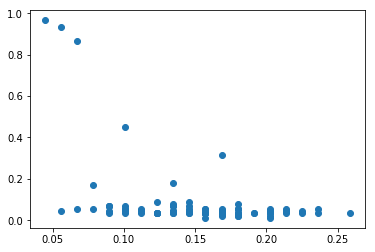

In [23]:
import os
import numpy as np
import seaborn as sns

path = "/home/emanuel/Documents/trabajo_actual/MegaScript"
verbose = False

def bajar_estructura(pdb_id):
    os.chdir(path+"/ent_files/")
    filename ="pdb"+pdb_id.lower()+".ent"
    url = "ftp://ftp.wwpdb.org/pub/pdb/data/structures/divided/pdb/"+pdb_id.lower()[1:3]+"/pdb"+pdb_id.lower()+".ent.gz"
    
    #Verifica que el archivo no exista antes de intentar bajarlo.
    if not os.path.isfile(filename):
        #os.system("wget ftp://ftp.wwpdb.org/pub/pdb/data/structures/all/pdb/pdb"+pdb_id.lower()+".ent.gz")
        wget_code = os.system("wget "+url)
        #Si el archivo no existe en el servidor, fue declarado obsoleto.
        #Da codigo de error 2048
        if wget_code == 2048:
            os.chdir(path)
            return ("OBSOLETE")
        #Uncompress
        os.system("gunzip pdb"+pdb_id.lower()+".ent.gz")
    else:
        if verbose: print ("\t","File "+filename+" already exists")
    os.chdir(path)
    return filename

#Le das un archivo y le el EXPDTA u NUMMDL
def read_expdata(path_to_pdbfile):
    with open(path_to_pdbfile,"r") as openfile:
        expdata = ""
        nummodel = 1
        for row in openfile:
            if "EXPDTA" in row:
                expdata +=  (row[9:-1].strip())
                if "X-RAY" in expdata:
                    break
                else:
                    continue
            elif "NUMMDL" in row:
                nummodel = int((row[9:-1].strip()))
                break
            elif "REMARK" in row:
                break
            elif "ATOM" in row:
                break
    return expdata,nummodel



def read_atom_full(pdb_file):
    expdata,nummodel = read_expdata(pdb_file)
    return_dict = dict()
    with open(pdb_file,"r") as openfile:
        model = 1
        return_dict[1]= list()
        for row in openfile:
            line_lst = list()
            if nummodel>1:
                if row[0:6] == "ENDMDL":
                    model +=1
                    if model > nummodel:
                        break
                    return_dict[model]= list()
            if row[0:5] == "ATOM ":
                tmp_lst = []
                tmp_lst.append(int(row[6:10+1])) #Integer serial Atom serial number.
                tmp_lst.append(row[12:15+1].strip()) #Atom name Atom name.
                tmp_lst.append(row[16+1]) #Character altLoc Alternate location indicator.
                tmp_lst.append(row[17:19+1]) #Residue name resName Residue name.
                tmp_lst.append(row[21]) #Character chainID Chain identifier.
                tmp_lst.append(int(row[22:25+1])) #Integer resSeq Residue sequence number.
                tmp_lst.append(row[26+1]) #AChar iCode Code for insertion of residues.
                tmp_lst.append(row[30:37+1]) #Real(8.3) x Orthogonal coordinates for X in Angstroms.
                tmp_lst.append(row[38:45+1]) #Real(8.3) y Orthogonal coordinates for Y in Angstroms.
                tmp_lst.append(row[46:53+1]) #Real(8.3) z Orthogonal coordinates for Z in Angstroms.
                tmp_lst.append(row[54:59+1]) #Real(6.2) occupancy Occupancy.
                tmp_lst.append(row[60:65+1]) #Real(6.2) tempFactor Temperature factor.
                tmp_lst.append(row[76:77+1]) #LString(2) element Element symbol, right-justified.
                tmp_lst.append(row[78:89+1].replace("\n","")) #LString(2) charge Charge on the atom.
                return_dict[model].append(tmp_lst)
            
    return expdata,nummodel,return_dict

def print_fixed(query_str,fix=100):
    for index,char in enumerate(query_str):
        print (char,end="")
        if (index+1)%fix ==0:
            print ("")
    print ("")
    return

def calc_median(query_list):
    if len(query_list)>1:
        if len(query_list)%2 == 0:
            pos = (len(query_list)//2)-1
            median_value = (query_list[pos]+query_list[pos+1])/2
        else:
            pos = (len(query_list)//2)-1
            median_value = query_list[pos]
    else:
        median_value = query_list[0]
    return int(median_value)

def read_and_parse_pdb_file(pdb_id,chain):
    ensemblito = dict()
    expdata,nummodel,raw =  read_atom_full("ent_files/"+bajar_estructura(pdb_id))
    for model in raw:
        seq_stru = dict()
        for atom in raw[model]:
            if (atom[1] == "CA") and (atom[4] == chain):
                x = float(atom[7])
                y = float(atom[8])
                z = float(atom[9])
                cord = (x,y,z)
                seq_stru[int(atom[5])]=[atom[3],cord]
        ensemblito[model] = seq_stru    
    return expdata,nummodel,ensemblito



d = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 'TER':'*',
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M','XAA':'X'}        



expdata,nummodel,ensemblito = read_and_parse_pdb_file("2MWY","A")

            

conjunto = dict()
for model in ensemblito:
    #esto crea la matris de distancias.
    sequ = ""
    vector =dict()
    seq_str = ensemblito[model]
    for i in seq_str:
        if check_is_None(vector.get(i)):
            vector[i] = dict()
        sequ += d[seq_str[i][0]]
        for j in seq_str:
            cord1 = seq_str[i][1]
            cord2 = seq_str[j][1]

            dist=( (cord2[0]-cord1[0])**2 + (cord2[1]-cord1[1])**2 + (cord2[2]-cord1[2])**2) ** 0.5
            vector [i][j] = dist 


    ij_map = list()
    for i in vector:
        show = ""
        for j in vector[i]:
            if vector[i][j] < 10:
                show+=str(int(vector[i][j]))
            else: 
                show+="-"
        ij_map.append(show)
    conjunto[model] = {"sequence":sequ,"vector":vector,"ij_map":ij_map}
    
    
    aver_map = dict()


for model in range(1,model+1):
    for fixed in list(conjunto[model]["vector"].keys()):
        if check_is_None(aver_map.get(fixed)):
            aver_map[fixed] = dict()
        for r in (conjunto[model]["vector"][i]):
            if check_is_None(aver_map[fixed].get(r)):
                aver_map[fixed][r] = list()
            dist = conjunto[model]["vector"][fixed][r]
            aver_map[fixed][r].append(dist)


contact_map_full =  []
std_map_full = []



for fixed in aver_map:
    # print (fixed)
    contact_map =[]
    std_map =[]
    
    for pos in aver_map[fixed]:
        mean = np.mean(aver_map[fixed][pos])
        median  = calc_median(aver_map[fixed][pos])
        std = np.std(aver_map[fixed][pos])
        #print ("\t",pos,mean,std)
        
        if (pos > fixed+1 )or (pos <fixed-1):
            #10 amstrom
            if median<10:            
                contact_map.append(1)
            else:
                contact_map.append(0)

            #1 de std
            if std>0.7:
                std_map.append(1)
            else:
                std_map.append(0)
        else:
            contact_map.append(0)
            std_map.append(0)
                


    contact_map_full.append (contact_map)
    std_map_full.append(std_map)

x_list = []
y_list = []

print (sequ)
for n in range(0,len(aver_map)):
    x = sum(contact_map_full[n])
    x_list.append(x)
    
for n in range(0,len(aver_map)):
    y = sum(std_map_full[n])
    y_list.append(y)
    
x_list = [(x/len(x_list)) for x in x_list]
y_list = [(y/len(y_list)) for y in y_list]
    
for x in x_list:
    print(int(x*10),end="")
print ("")

for y in y_list:
    print(int(y*10),end="")
print ("")


plt.plot(x_list, y_list,"o")
plt.show()


    

In [283]:
with open("archivos_importantes/pdb_para_descargar_191204.txt","w") as openfile:
    for pdb_id in pdb_para_descargar:
        openfile.write(pdb_id+"\n")

## Bloque de Codigo M01

* definir  crear_modelo_restringido(modelo,archivo_pdb,+)

In [ ]:
def crear_modelo_restringido(model,pdb)
   	if model == "SCPE_standard"
   	   	run_scpe_standar()
   	   	pass
   	elif model == "ugowt"
   	   	pass
   	elif model == "ugowf"
   	   	pass
   	return

def run_scpe_standard():
    #crear archivo de configuracion
    x_pdbfile = conf_id[0:4]+"-1_"+conf_id[-1]+".pdb"
    y_chain = conf_id[-1]
    outfilename = "inputfile_"+conf_id+".in"

    with open(outfilename,"w")  as openfile:
        for index,row in enumerate(inputfilemodel):
        if index == 2:
            openfile.write(row.replace("XXXXX",x_pdbfile))
        elif index == 3:
            openfile.write(row.replace("YYYYY",y_chain))
        elif index == 29:
            openfile.write(row.replace("WWWWW",conf_id))
                elif index == 34:
                    openfile.write(row.replace("ZZZZZ",conf_id))
                else:
                    openfile.write(row)
                openfile.write("\n")

    #corer scpe
    inputfile = "inputfile_"+conf_id+".in"
    if os.path.isfile(inputfile):
    cmd = "./scpe.exe "+inputfile+ " > "+conf_id+".out"
    err_code = os.system(cmd)
    if err_code == 0:
        print (conf_id,"OK")
        else:
    print (conf_id,err_code)
        if os.path.isfile("Contact-information.dat"):
        cmd = "mv Contact-information.dat results/Contact-information_"+conf_id+".dat"
            os.system(cmd)
        cmd = "mv "+inputfile +" done/"
        os.system(cmd)
    else:
        print ("inputfile not found for "+conf_id)
        print ("running next->")
            
    return


## Bloque de Codigo M2

### Objetivos
* Recopilar a informacion de las estructuras del ensemble_data
* Parsear los pdb, separarlos en cadenas
* Establecer la lista de archivos diferentes sobre los cuales se deben correr los modelos estructurales a cada uniprot-id.


In [142]:
uniprot_id = "P00760"
pdb_to_download = ensemble_data[uniprot_id]["PDB_in_df_work"]
print (pdb_to_download)


['3PLK', '5GXP', '3VEQ', '1F0U', '1O38', '1TNG', '5MNP', '3A87', '1C1P', '4ABA', '1TPA', '1O2W', '1V2W', '3OTJ', '2BY5', '3RXS', '3NK8', '2ZDM', '1QA0', '3PWC', '2FI3', '2ZFS', '1SBW', '3T26', '1O2M', '2BTC', '3RDZ', '3VPK', '3A84', '5MNF', '4J2Y', '2D8W', '1P2J', '1C5S', '6FID', '4AB9', '3T27', '1C2G', '1TGT', '3BTT', '3ATL', '1MTS', '1K1O', '1TX8', '3LJO', '3MFJ', '2BY8', '1K1N', '3ATM', '1XUG', '3UPE', '3GY8', '1RXP', '4GUX', '1SFI', '3ATK', '1V2R', '5MNA', '1C5T', '2ZFT', '1O33', '2AGI', '5FXL', '1GJ6', '4TPY', '3AAU', '1QCP', '1OX1', '3A8B', '1QBN', '1TX7', '1O2T', '3A80', '4NIX', '4Y11', '1O2J', '1V2N', '1Y3U', '2PTC', '1K1M', '3A7T', '4NIV', '2BLW', '3RXI', '2XTT', '1O2O', '1Y3V', '2ILN', '3RXC', '1XUI', '1V2O', '1O2V', '5MOR', '1EB2', '1O3K', '1O2I', '6B6P', '1V2S', '3NKK', '3BTQ', '1N6Y', '1O2L', '1O2R', '1UTP', '3GY4', '1PPC', '1PPE', '1O3J', '1TNH', '1NC6', '3D65', '1GI3', '4B2C', '3RXR', '2TGP', '2QYI', '2A7H', '3PLB', '2TIO', '3Q00', '4I8G', '3QK1', '3M7Q', '1Y3W', '4B2B',

## Bloque de Codigo X4

Verifica cuantos uniprot_id en la lista caped25 estan en la lista disprot que me paso gus

In [156]:
disprot_list = list()
with open("../disprot/disprot.fasta","r") as openfile:
    for line in openfile:
        if line[0] == ">":
            x = (line.replace("\n","").split("=")[1])
            disprot_list.append(x)
disprot_list.sort()
print ()


joint_set = (set(caped25) & set (disprot_list))             
print ("CAPED",len(set(caped25)))
print ("DISPROT",len(set(disprot_list)))
print ("JOINT:",len(set(joint_set)))
print (joint_set)


CAPED 1140
DISPROT 1388
JOINT: 31
{'Q9RY65', 'P0A7L8', 'P0A7U3', 'P38919', 'P02699', 'Q15418', 'P04908', 'P00760', 'P0A6H5', 'P0A877', 'P0CE48', 'Q88QP8', 'P60472', 'P60723', 'P04818', 'P41208', 'P11021', 'P01112', 'P62152', 'P04695', 'P0A7K2', 'P00441', 'P13551', 'P68363', 'P0A7S3', 'P56210', 'P00004', 'P06968', 'O67086', 'P84051', 'P0AG63'}


In [159]:
for uniprot_id in joint_set:
    pdb_chains = ensemble_data[uniprot_id]["pdb_chain_count"]
    print (uniprot_id,pdb_chains)

Q9RY65 29
P0A7L8 104
P0A7U3 101
P38919 15
P02699 63
Q15418 20
P04908 110
P00760 515
P0A6H5 54
P0A877 6
P0CE48 35
Q88QP8 7
P60472 39
P60723 105
P04818 123
P41208 8
P11021 33
P01112 184
P62152 14
P04695 22
P0A7K2 22
P00441 410
P13551 17
P68363 9
P0A7S3 108
P56210 11
P00004 59
P06968 10
O67086 5
P84051 12
P0AG63 99


# Apartado para chuspear el dataframe de Virus

In [133]:
df_virus.loc[ (df_virus["Organism"].str.contains("immunodeficiency")) ].head()


,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,PDB_CHAIN_LIST,pdb_chain_count
3018,P04608,TAT_HV1H2,reviewed,Protein Tat (Transactivating regulatory protein),tat,Human immunodeficiency virus type 1 group M su...,86,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,11706,"[3MI9_C, 3MIA_C, 4OR5_C, 4OR5_H, 5V61_I]",5
3039,P35963,POL_HV1Y2,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSAGELDKWEKIRLRPGGKKQYRLKHIVWASRELERFAV...,362651,"[1K6C_A, 1K6C_B, 1K6P_A, 1K6P_B, 1K6T_A, 1K6T_...",44
3415,P12520,VPR_HV1N5,reviewed,Protein Vpr (R ORF protein) (Viral protein R),vpr,Human immunodeficiency virus type 1 group M su...,96,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEQAPEDQGPQREPYNEWTLELLEELKSEAVRHFPRIWLHNLGQHI...,11698,"[1BDE_A, 1DSJ_A, 1DSK_A, 1KZS_A, 1KZT_A, 1KZV_...",8
4197,P04586,POL_HV1Z6,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,148,"Viruses, Ortervirales, Retroviridae, Orthoretr...",IPYNPQSQGVVESMNKELKKIIGQVRDQAEHLKTAVQMAVFIHNFK...,11708,"[1IHV_A, 1IHV_B, 1IHW_A, 1IHW_B, 1K6Y_C, 1K6Y_D]",6
4895,P03366,POL_HV1B1,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11678,"[1A9M_A, 1A9M_B, 1AJV_A, 1AJV_B, 1AJX_A, 1AJX_...",571


In [29]:
# guardar df en un archivo
df_virus.to_csv("archivos_importantes/df_virus_"+str(datetime.date.today())+".tsv",sep="\t")

In [337]:
len(df_virus)


567

In [31]:
timestamp = str(datetime.datetime.now()).replace("-","").replace(":","").replace(" ","")[0:12]
ed_filename = "archivos_importantes/ensemble_data_" + timestamp +".csv"

printd ("Guardando  "+ed_filename)
df_new = pd.DataFrame.from_dict(ensemble_data,orient="index")
df_new.head()
df_new.to_csv(ed_filename,header=True,index=False)
del df_new

Guardando  archivos_importantes/ensemble_data_201912121148.csv